# VGG16 Pre-defined Model Approach

In [93]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
import random
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Function to load and preprocess images
def load_and_preprocess_images(image_paths):
    images = []
    for path in tqdm(image_paths, desc="Loading and preprocessing images"):
        img = image.load_img(path, target_size=(256,256))
        img = image.img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
    return np.array(images)

# Function to extract features using a pre-trained VGG16 model
def extract_features(images):
    base_model = VGG16(weights='imagenet', include_top=False)
    model = tf.keras.Model(inputs=base_model.input, outputs=base_model.layers[-1].output)
    features = []
    for img in tqdm(images, desc="Extracting features using VGG16"):
        feature = model.predict(np.expand_dims(img, axis=0))
        features.append(feature.flatten())
    return np.array(features)

# Function to perform Isomap dimensionality reduction
def perform_isomap(features):
    isomap = Isomap(n_components=2)
    embeddings = isomap.fit_transform(features)
    return embeddings

def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.015, alpha = 1)
    
# Function to plot the embeddings
def plot_embeddings(embeddings, image_paths, title='Isomap Clustering', thumbnail_size=(64,64), num_samples=10, w=100):
    fig, ax = plt.subplots(figsize=(10,10), dpi=200)
    selected_indices = random.sample(range(len(image_paths)), num_samples)
    ax.scatter(embeddings[:, 0], embeddings[:, 1], s=3, color='lightgrey')
    for i in selected_indices:
        ab = AnnotationBbox(getImage(image_paths[i]), (embeddings[i,0], embeddings[i,1]), frameon=False)
        ax.add_artist(ab)
        # img = Image.open(image_paths[i])
        # img.thumbnail(thumbnail_size)
        # plt.imshow(img, extent=(embeddings[i, 0] - w/2, embeddings[i, 0] + w/2, embeddings[i, 1]-w/2, embeddings[i, 1] + w/2), aspect='auto')
    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    plt.savefig('isomap.png', bbox_inches='tight')
    plt.show()

In [4]:
image_dir = '../data/sodankyla_cam/pine_ground_cam/'

image_paths_curated = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith('.jpg') and filename.split('_')[-1][:2] in ['10', '11', '12', '13', '14']]
image_paths_curated.sort()

# Load and preprocess images
images_curated = load_and_preprocess_images(image_paths_curated)

Loading and preprocessing images: 100%|████████████████████████████████████████████| 3640/3640 [02:05<00:00, 28.95it/s]


In [5]:
# Extract features using VGG16
features = extract_features(images_curated)

Extracting features using VGG16:   0%|                                                        | 0/3640 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step


Extracting features using VGG16:   0%|                                                | 1/3640 [00:00<48:09,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Extracting features using VGG16:   0%|                                                | 2/3640 [00:01<38:11,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Extracting features using VGG16:   0%|                                                | 3/3640 [00:01<32:50,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:   0%|                                                | 4/3640 [00:02<30:42,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:   0%|                                                | 5/3640 [00:02<29:22,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using VGG16:   0%|                                                | 6/3640 [00:03<28:22,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:   0%|                                                | 7/3640 [00:03<27:50,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Extracting features using VGG16:   0%|                                                | 8/3640 [00:03<27:15,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:   0%|                                                | 9/3640 [00:04<27:09,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:   0%|▏                                              | 10/3640 [00:04<26:57,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:   0%|▏                                              | 11/3640 [00:05<26:52,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using VGG16:   0%|▏                                              | 12/3640 [00:05<26:44,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using VGG16:   0%|▏                                              | 13/3640 [00:06<26:39,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:   0%|▏                                              | 14/3640 [00:06<26:36,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:   0%|▏                                              | 15/3640 [00:07<26:37,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:   0%|▏                                              | 16/3640 [00:07<26:39,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:   0%|▏                                              | 17/3640 [00:07<26:44,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Extracting features using VGG16:   0%|▏                                              | 18/3640 [00:08<29:19,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step


Extracting features using VGG16:   1%|▏                                              | 19/3640 [00:09<36:09,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


Extracting features using VGG16:   1%|▎                                              | 20/3640 [00:10<41:26,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


Extracting features using VGG16:   1%|▎                                              | 21/3640 [00:11<44:12,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


Extracting features using VGG16:   1%|▎                                              | 22/3640 [00:11<46:08,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


Extracting features using VGG16:   1%|▎                                              | 23/3640 [00:12<47:52,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step


Extracting features using VGG16:   1%|▎                                              | 24/3640 [00:13<48:39,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


Extracting features using VGG16:   1%|▎                                              | 25/3640 [00:14<49:17,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step


Extracting features using VGG16:   1%|▎                                              | 26/3640 [00:15<50:13,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step


Extracting features using VGG16:   1%|▎                                              | 27/3640 [00:16<50:19,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Extracting features using VGG16:   1%|▎                                              | 28/3640 [00:16<44:57,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:   1%|▎                                              | 29/3640 [00:17<39:23,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:   1%|▍                                              | 30/3640 [00:17<35:35,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using VGG16:   1%|▍                                              | 31/3640 [00:18<32:43,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


Extracting features using VGG16:   1%|▍                                              | 32/3640 [00:18<30:44,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:   1%|▍                                              | 33/3640 [00:18<29:35,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:   1%|▍                                              | 34/3640 [00:19<28:50,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


Extracting features using VGG16:   1%|▍                                              | 35/3640 [00:20<35:28,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step


Extracting features using VGG16:   1%|▍                                              | 36/3640 [00:21<40:18,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


Extracting features using VGG16:   1%|▍                                              | 37/3640 [00:21<44:06,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Extracting features using VGG16:   1%|▍                                              | 38/3640 [00:22<43:02,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:   1%|▌                                              | 39/3640 [00:23<38:04,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using VGG16:   1%|▌                                              | 40/3640 [00:23<34:29,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using VGG16:   1%|▌                                              | 41/3640 [00:23<31:57,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:   1%|▌                                              | 42/3640 [00:24<30:21,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:   1%|▌                                              | 43/3640 [00:24<29:13,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Extracting features using VGG16:   1%|▌                                              | 44/3640 [00:25<28:15,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


Extracting features using VGG16:   1%|▌                                              | 45/3640 [00:26<32:48,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step


Extracting features using VGG16:   1%|▌                                              | 46/3640 [00:26<39:01,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step


Extracting features using VGG16:   1%|▌                                              | 47/3640 [00:27<43:19,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Extracting features using VGG16:   1%|▌                                              | 48/3640 [00:28<46:13,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step


Extracting features using VGG16:   1%|▋                                              | 49/3640 [00:29<47:45,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


Extracting features using VGG16:   1%|▋                                              | 50/3640 [00:30<48:30,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Extracting features using VGG16:   1%|▋                                              | 51/3640 [00:30<43:24,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using VGG16:   1%|▋                                              | 52/3640 [00:31<38:07,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:   1%|▋                                              | 53/3640 [00:31<34:30,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:   1%|▋                                              | 54/3640 [00:32<31:58,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:   2%|▋                                              | 55/3640 [00:32<30:17,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:   2%|▋                                              | 56/3640 [00:33<29:07,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:   2%|▋                                              | 57/3640 [00:33<28:20,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step


Extracting features using VGG16:   2%|▋                                              | 58/3640 [00:34<34:24,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


Extracting features using VGG16:   2%|▊                                              | 59/3640 [00:35<39:57,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step


Extracting features using VGG16:   2%|▊                                              | 60/3640 [00:36<44:44,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Extracting features using VGG16:   2%|▊                                              | 61/3640 [00:36<42:49,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:   2%|▊                                              | 62/3640 [00:37<38:09,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:   2%|▊                                              | 63/3640 [00:37<34:34,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:   2%|▊                                              | 64/3640 [00:38<32:10,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:   2%|▊                                              | 65/3640 [00:38<30:24,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:   2%|▊                                              | 66/3640 [00:39<29:07,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:   2%|▊                                              | 67/3640 [00:39<28:15,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


Extracting features using VGG16:   2%|▉                                              | 68/3640 [00:40<33:31,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


Extracting features using VGG16:   2%|▉                                              | 69/3640 [00:41<38:39,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step


Extracting features using VGG16:   2%|▉                                              | 70/3640 [00:42<43:21,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


Extracting features using VGG16:   2%|▉                                              | 71/3640 [00:42<45:43,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


Extracting features using VGG16:   2%|▉                                              | 72/3640 [00:43<47:32,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Extracting features using VGG16:   2%|▉                                              | 73/3640 [00:44<49:01,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:   2%|▉                                              | 74/3640 [00:45<43:07,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:   2%|▉                                              | 75/3640 [00:45<38:02,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Extracting features using VGG16:   2%|▉                                              | 76/3640 [00:46<34:24,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using VGG16:   2%|▉                                              | 77/3640 [00:46<31:55,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using VGG16:   2%|█                                              | 78/3640 [00:46<30:04,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:   2%|█                                              | 79/3640 [00:47<28:50,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


Extracting features using VGG16:   2%|█                                              | 80/3640 [00:47<28:51,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Extracting features using VGG16:   2%|█                                              | 81/3640 [00:48<35:41,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Extracting features using VGG16:   2%|█                                              | 82/3640 [00:49<40:27,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


Extracting features using VGG16:   2%|█                                              | 83/3640 [00:50<44:02,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


Extracting features using VGG16:   2%|█                                              | 84/3640 [00:51<46:00,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Extracting features using VGG16:   2%|█                                              | 85/3640 [00:51<44:20,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:   2%|█                                              | 86/3640 [00:52<38:48,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


Extracting features using VGG16:   2%|█                                              | 87/3640 [00:52<34:45,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:   2%|█▏                                             | 88/3640 [00:53<32:10,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:   2%|█▏                                             | 89/3640 [00:53<30:21,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:   2%|█▏                                             | 90/3640 [00:54<29:08,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:   2%|█▏                                             | 91/3640 [00:54<28:17,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step


Extracting features using VGG16:   3%|█▏                                             | 92/3640 [00:55<32:06,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step


Extracting features using VGG16:   3%|█▏                                             | 93/3640 [00:56<37:22,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step


Extracting features using VGG16:   3%|█▏                                             | 94/3640 [00:57<41:24,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step


Extracting features using VGG16:   3%|█▏                                             | 95/3640 [00:57<45:05,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:   3%|█▏                                             | 96/3640 [00:58<47:06,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:   3%|█▎                                             | 97/3640 [00:59<41:26,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using VGG16:   3%|█▎                                             | 98/3640 [00:59<36:43,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:   3%|█▎                                             | 99/3640 [01:00<33:50,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:   3%|█▎                                            | 100/3640 [01:00<31:31,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:   3%|█▎                                            | 101/3640 [01:01<29:48,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using VGG16:   3%|█▎                                            | 102/3640 [01:01<28:32,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Extracting features using VGG16:   3%|█▎                                            | 103/3640 [01:01<28:37,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


Extracting features using VGG16:   3%|█▎                                            | 104/3640 [01:02<35:46,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step


Extracting features using VGG16:   3%|█▎                                            | 105/3640 [01:03<40:57,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


Extracting features using VGG16:   3%|█▎                                            | 106/3640 [01:04<44:03,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:   3%|█▎                                            | 107/3640 [01:05<46:21,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


Extracting features using VGG16:   3%|█▎                                            | 108/3640 [01:06<43:55,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:   3%|█▍                                            | 109/3640 [01:06<38:42,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:   3%|█▍                                            | 110/3640 [01:07<34:46,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:   3%|█▍                                            | 111/3640 [01:07<32:11,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:   3%|█▍                                            | 112/3640 [01:07<30:18,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step


Extracting features using VGG16:   3%|█▍                                            | 113/3640 [01:08<36:33,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step


Extracting features using VGG16:   3%|█▍                                            | 114/3640 [01:09<40:27,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


Extracting features using VGG16:   3%|█▍                                            | 115/3640 [01:10<43:20,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


Extracting features using VGG16:   3%|█▍                                            | 116/3640 [01:11<44:57,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


Extracting features using VGG16:   3%|█▍                                            | 117/3640 [01:12<46:49,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


Extracting features using VGG16:   3%|█▍                                            | 118/3640 [01:13<47:25,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using VGG16:   3%|█▌                                            | 119/3640 [01:13<40:58,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Extracting features using VGG16:   3%|█▌                                            | 120/3640 [01:13<36:16,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:   3%|█▌                                            | 121/3640 [01:14<33:09,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:   3%|█▌                                            | 122/3640 [01:14<31:02,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:   3%|█▌                                            | 123/3640 [01:15<29:32,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:   3%|█▌                                            | 124/3640 [01:15<28:33,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Extracting features using VGG16:   3%|█▌                                            | 125/3640 [01:16<29:03,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


Extracting features using VGG16:   3%|█▌                                            | 126/3640 [01:17<35:11,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


Extracting features using VGG16:   3%|█▌                                            | 127/3640 [01:17<39:19,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step


Extracting features using VGG16:   4%|█▌                                            | 128/3640 [01:18<42:17,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step


Extracting features using VGG16:   4%|█▋                                            | 129/3640 [01:19<44:38,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


Extracting features using VGG16:   4%|█▋                                            | 130/3640 [01:20<43:37,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Extracting features using VGG16:   4%|█▋                                            | 131/3640 [01:20<38:08,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Extracting features using VGG16:   4%|█▋                                            | 132/3640 [01:21<34:21,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using VGG16:   4%|█▋                                            | 133/3640 [01:21<31:44,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


Extracting features using VGG16:   4%|█▋                                            | 134/3640 [01:22<29:47,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:   4%|█▋                                            | 135/3640 [01:22<28:30,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:   4%|█▋                                            | 136/3640 [01:22<27:40,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Extracting features using VGG16:   4%|█▋                                            | 137/3640 [01:23<30:14,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step


Extracting features using VGG16:   4%|█▋                                            | 138/3640 [01:24<35:28,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step


Extracting features using VGG16:   4%|█▊                                            | 139/3640 [01:25<39:21,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


Extracting features using VGG16:   4%|█▊                                            | 140/3640 [01:26<42:14,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


Extracting features using VGG16:   4%|█▊                                            | 141/3640 [01:26<44:12,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Extracting features using VGG16:   4%|█▊                                            | 142/3640 [01:27<41:36,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:   4%|█▊                                            | 143/3640 [01:27<36:49,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Extracting features using VGG16:   4%|█▊                                            | 144/3640 [01:28<33:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:   4%|█▊                                            | 145/3640 [01:28<31:10,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:   4%|█▊                                            | 146/3640 [01:29<29:41,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:   4%|█▊                                            | 147/3640 [01:29<28:37,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Extracting features using VGG16:   4%|█▊                                            | 148/3640 [01:30<27:39,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step


Extracting features using VGG16:   4%|█▉                                            | 149/3640 [01:30<32:35,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step


Extracting features using VGG16:   4%|█▉                                            | 150/3640 [01:31<37:27,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


Extracting features using VGG16:   4%|█▉                                            | 151/3640 [01:32<40:47,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


Extracting features using VGG16:   4%|█▉                                            | 152/3640 [01:33<43:00,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step


Extracting features using VGG16:   4%|█▉                                            | 153/3640 [01:34<44:51,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using VGG16:   4%|█▉                                            | 154/3640 [01:34<40:07,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:   4%|█▉                                            | 155/3640 [01:35<35:44,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:   4%|█▉                                            | 156/3640 [01:35<32:37,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:   4%|█▉                                            | 157/3640 [01:36<30:32,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:   4%|█▉                                            | 158/3640 [01:36<29:00,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:   4%|██                                            | 159/3640 [01:36<27:58,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


Extracting features using VGG16:   4%|██                                            | 160/3640 [01:37<27:50,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


Extracting features using VGG16:   4%|██                                            | 161/3640 [01:38<34:07,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


Extracting features using VGG16:   4%|██                                            | 162/3640 [01:39<39:20,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step


Extracting features using VGG16:   4%|██                                            | 163/3640 [01:40<42:21,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step


Extracting features using VGG16:   5%|██                                            | 164/3640 [01:40<44:35,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


Extracting features using VGG16:   5%|██                                            | 165/3640 [01:41<43:19,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Extracting features using VGG16:   5%|██                                            | 166/3640 [01:42<37:55,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using VGG16:   5%|██                                            | 167/3640 [01:42<34:07,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using VGG16:   5%|██                                            | 168/3640 [01:42<31:27,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:   5%|██▏                                           | 169/3640 [01:43<29:46,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using VGG16:   5%|██▏                                           | 170/3640 [01:43<28:23,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Extracting features using VGG16:   5%|██▏                                           | 171/3640 [01:44<27:22,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Extracting features using VGG16:   5%|██▏                                           | 172/3640 [01:44<29:54,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


Extracting features using VGG16:   5%|██▏                                           | 173/3640 [01:45<35:21,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


Extracting features using VGG16:   5%|██▏                                           | 174/3640 [01:46<39:30,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step


Extracting features using VGG16:   5%|██▏                                           | 175/3640 [01:47<42:30,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


Extracting features using VGG16:   5%|██▏                                           | 176/3640 [01:48<44:42,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using VGG16:   5%|██▏                                           | 177/3640 [01:48<41:13,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


Extracting features using VGG16:   5%|██▏                                           | 178/3640 [01:49<36:16,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:   5%|██▎                                           | 179/3640 [01:49<33:00,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Extracting features using VGG16:   5%|██▎                                           | 180/3640 [01:50<30:38,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:   5%|██▎                                           | 181/3640 [01:50<29:08,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Extracting features using VGG16:   5%|██▎                                           | 182/3640 [01:50<27:49,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


Extracting features using VGG16:   5%|██▎                                           | 183/3640 [01:51<26:51,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


Extracting features using VGG16:   5%|██▎                                           | 184/3640 [01:52<31:37,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


Extracting features using VGG16:   5%|██▎                                           | 185/3640 [01:52<36:44,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step


Extracting features using VGG16:   5%|██▎                                           | 186/3640 [01:53<40:10,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step


Extracting features using VGG16:   5%|██▎                                           | 187/3640 [01:54<42:30,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


Extracting features using VGG16:   5%|██▍                                           | 188/3640 [01:55<43:51,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using VGG16:   5%|██▍                                           | 189/3640 [01:55<39:16,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Extracting features using VGG16:   5%|██▍                                           | 190/3640 [01:56<34:54,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using VGG16:   5%|██▍                                           | 191/3640 [01:56<31:57,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Extracting features using VGG16:   5%|██▍                                           | 192/3640 [01:57<29:50,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Extracting features using VGG16:   5%|██▍                                           | 193/3640 [01:57<28:20,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Extracting features using VGG16:   5%|██▍                                           | 194/3640 [01:58<27:20,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Extracting features using VGG16:   5%|██▍                                           | 195/3640 [01:58<26:38,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


Extracting features using VGG16:   5%|██▍                                           | 196/3640 [01:59<33:18,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


Extracting features using VGG16:   5%|██▍                                           | 197/3640 [02:00<37:38,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


Extracting features using VGG16:   5%|██▌                                           | 198/3640 [02:01<40:49,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step


Extracting features using VGG16:   5%|██▌                                           | 199/3640 [02:01<43:10,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step


Extracting features using VGG16:   5%|██▌                                           | 200/3640 [02:02<43:47,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Extracting features using VGG16:   6%|██▌                                           | 201/3640 [02:03<38:24,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:   6%|██▌                                           | 202/3640 [02:03<34:22,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:   6%|██▌                                           | 203/3640 [02:04<31:39,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:   6%|██▌                                           | 204/3640 [02:04<29:47,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:   6%|██▌                                           | 205/3640 [02:04<28:32,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using VGG16:   6%|██▌                                           | 206/3640 [02:05<27:25,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Extracting features using VGG16:   6%|██▌                                           | 207/3640 [02:05<29:07,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


Extracting features using VGG16:   6%|██▋                                           | 208/3640 [02:06<34:40,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step


Extracting features using VGG16:   6%|██▋                                           | 209/3640 [02:07<38:27,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


Extracting features using VGG16:   6%|██▋                                           | 210/3640 [02:08<41:21,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


Extracting features using VGG16:   6%|██▋                                           | 211/3640 [02:09<43:07,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Extracting features using VGG16:   6%|██▋                                           | 212/3640 [02:09<41:12,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Extracting features using VGG16:   6%|██▋                                           | 213/3640 [02:10<36:18,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:   6%|██▋                                           | 214/3640 [02:10<32:57,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:   6%|██▋                                           | 215/3640 [02:11<30:40,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Extracting features using VGG16:   6%|██▋                                           | 216/3640 [02:11<28:52,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


Extracting features using VGG16:   6%|██▋                                           | 217/3640 [02:12<27:32,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:   6%|██▊                                           | 218/3640 [02:12<26:45,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Extracting features using VGG16:   6%|██▊                                           | 219/3640 [02:13<29:52,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step


Extracting features using VGG16:   6%|██▊                                           | 220/3640 [02:14<35:46,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step


Extracting features using VGG16:   6%|██▊                                           | 221/3640 [02:14<39:05,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step


Extracting features using VGG16:   6%|██▊                                           | 222/3640 [02:15<41:41,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step


Extracting features using VGG16:   6%|██▊                                           | 223/3640 [02:16<43:46,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Extracting features using VGG16:   6%|██▊                                           | 224/3640 [02:17<39:51,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:   6%|██▊                                           | 225/3640 [02:17<35:23,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:   6%|██▊                                           | 226/3640 [02:18<32:15,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:   6%|██▊                                           | 227/3640 [02:18<30:17,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Extracting features using VGG16:   6%|██▉                                           | 228/3640 [02:18<28:34,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:   6%|██▉                                           | 229/3640 [02:19<27:30,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:   6%|██▉                                           | 230/3640 [02:19<26:43,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step


Extracting features using VGG16:   6%|██▉                                           | 231/3640 [02:20<32:34,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step


Extracting features using VGG16:   6%|██▉                                           | 232/3640 [02:21<37:04,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:   6%|██▉                                           | 233/3640 [02:22<40:48,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step


Extracting features using VGG16:   6%|██▉                                           | 234/3640 [02:23<43:05,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step


Extracting features using VGG16:   6%|██▉                                           | 235/3640 [02:23<43:43,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Extracting features using VGG16:   6%|██▉                                           | 236/3640 [02:24<38:01,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using VGG16:   7%|██▉                                           | 237/3640 [02:24<33:59,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:   7%|███                                           | 238/3640 [02:25<31:18,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using VGG16:   7%|███                                           | 239/3640 [02:25<29:19,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:   7%|███                                           | 240/3640 [02:26<28:12,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:   7%|███                                           | 241/3640 [02:26<27:21,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Extracting features using VGG16:   7%|███                                           | 242/3640 [02:27<28:42,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step


Extracting features using VGG16:   7%|███                                           | 243/3640 [02:28<34:24,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


Extracting features using VGG16:   7%|███                                           | 244/3640 [02:28<38:16,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step


Extracting features using VGG16:   7%|███                                           | 245/3640 [02:29<40:55,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step


Extracting features using VGG16:   7%|███                                           | 246/3640 [02:30<43:28,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Extracting features using VGG16:   7%|███                                           | 247/3640 [02:31<41:16,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Extracting features using VGG16:   7%|███▏                                          | 248/3640 [02:31<36:21,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:   7%|███▏                                          | 249/3640 [02:32<32:58,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:   7%|███▏                                          | 250/3640 [02:32<30:39,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:   7%|███▏                                          | 251/3640 [02:32<28:55,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Extracting features using VGG16:   7%|███▏                                          | 252/3640 [02:33<27:36,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using VGG16:   7%|███▏                                          | 253/3640 [02:33<26:42,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


Extracting features using VGG16:   7%|███▏                                          | 254/3640 [02:34<30:22,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step


Extracting features using VGG16:   7%|███▏                                          | 255/3640 [02:35<35:36,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step


Extracting features using VGG16:   7%|███▏                                          | 256/3640 [02:36<39:04,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


Extracting features using VGG16:   7%|███▏                                          | 257/3640 [02:37<41:35,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step


Extracting features using VGG16:   7%|███▎                                          | 258/3640 [02:37<43:21,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Extracting features using VGG16:   7%|███▎                                          | 259/3640 [02:38<39:05,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:   7%|███▎                                          | 260/3640 [02:38<34:49,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Extracting features using VGG16:   7%|███▎                                          | 261/3640 [02:39<31:45,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:   7%|███▎                                          | 262/3640 [02:39<29:39,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:   7%|███▎                                          | 263/3640 [02:40<28:17,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


Extracting features using VGG16:   7%|███▎                                          | 264/3640 [02:40<27:00,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using VGG16:   7%|███▎                                          | 265/3640 [02:41<26:15,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step


Extracting features using VGG16:   7%|███▎                                          | 266/3640 [02:41<31:25,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


Extracting features using VGG16:   7%|███▎                                          | 267/3640 [02:42<36:09,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step


Extracting features using VGG16:   7%|███▍                                          | 268/3640 [02:43<39:28,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step


Extracting features using VGG16:   7%|███▍                                          | 269/3640 [02:44<41:54,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


Extracting features using VGG16:   7%|███▍                                          | 270/3640 [02:45<43:16,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


Extracting features using VGG16:   7%|███▍                                          | 271/3640 [02:45<37:39,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Extracting features using VGG16:   7%|███▍                                          | 272/3640 [02:46<33:40,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using VGG16:   8%|███▍                                          | 273/3640 [02:46<30:52,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using VGG16:   8%|███▍                                          | 274/3640 [02:46<28:55,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Extracting features using VGG16:   8%|███▍                                          | 275/3640 [02:47<27:30,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using VGG16:   8%|███▍                                          | 276/3640 [02:47<26:32,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Extracting features using VGG16:   8%|███▌                                          | 277/3640 [02:48<26:25,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


Extracting features using VGG16:   8%|███▌                                          | 278/3640 [02:49<32:37,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


Extracting features using VGG16:   8%|███▌                                          | 279/3640 [02:49<37:23,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step


Extracting features using VGG16:   8%|███▌                                          | 280/3640 [02:50<40:37,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step


Extracting features using VGG16:   8%|███▌                                          | 281/3640 [02:51<42:34,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


Extracting features using VGG16:   8%|███▌                                          | 282/3640 [02:52<41:58,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:   8%|███▌                                          | 283/3640 [02:52<36:53,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:   8%|███▌                                          | 284/3640 [02:53<33:11,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


Extracting features using VGG16:   8%|███▌                                          | 285/3640 [02:53<30:28,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:   8%|███▌                                          | 286/3640 [02:54<28:45,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Extracting features using VGG16:   8%|███▋                                          | 287/3640 [02:54<27:19,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:   8%|███▋                                          | 288/3640 [02:55<26:30,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Extracting features using VGG16:   8%|███▋                                          | 289/3640 [02:55<28:37,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:   8%|███▋                                          | 290/3640 [02:56<34:28,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step


Extracting features using VGG16:   8%|███▋                                          | 291/3640 [02:57<38:17,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step


Extracting features using VGG16:   8%|███▋                                          | 292/3640 [02:58<40:49,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


Extracting features using VGG16:   8%|███▋                                          | 293/3640 [02:58<37:22,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Extracting features using VGG16:   8%|███▋                                          | 294/3640 [02:59<33:25,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


Extracting features using VGG16:   8%|███▋                                          | 295/3640 [02:59<34:53,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


Extracting features using VGG16:   8%|███▋                                          | 296/3640 [03:00<36:25,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


Extracting features using VGG16:   8%|███▊                                          | 297/3640 [03:00<32:37,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:   8%|███▊                                          | 298/3640 [03:01<30:17,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:   8%|███▊                                          | 299/3640 [03:01<28:44,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Extracting features using VGG16:   8%|███▊                                          | 300/3640 [03:02<27:47,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step


Extracting features using VGG16:   8%|███▊                                          | 301/3640 [03:03<32:32,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step


Extracting features using VGG16:   8%|███▊                                          | 302/3640 [03:03<36:46,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


Extracting features using VGG16:   8%|███▊                                          | 303/3640 [03:04<36:49,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:   8%|███▊                                          | 304/3640 [03:05<33:05,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Extracting features using VGG16:   8%|███▊                                          | 305/3640 [03:05<31:52,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step


Extracting features using VGG16:   8%|███▊                                          | 306/3640 [03:06<36:20,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step


Extracting features using VGG16:   8%|███▉                                          | 307/3640 [03:07<40:07,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Extracting features using VGG16:   8%|███▉                                          | 308/3640 [03:07<36:24,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:   8%|███▉                                          | 309/3640 [03:08<32:46,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Extracting features using VGG16:   9%|███▉                                          | 310/3640 [03:08<30:10,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Extracting features using VGG16:   9%|███▉                                          | 311/3640 [03:09<28:45,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Extracting features using VGG16:   9%|███▉                                          | 312/3640 [03:09<29:28,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step


Extracting features using VGG16:   9%|███▉                                          | 313/3640 [03:10<36:07,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


Extracting features using VGG16:   9%|███▉                                          | 314/3640 [03:11<40:09,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


Extracting features using VGG16:   9%|███▉                                          | 315/3640 [03:12<42:18,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Extracting features using VGG16:   9%|███▉                                          | 316/3640 [03:12<37:50,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Extracting features using VGG16:   9%|████                                          | 317/3640 [03:13<33:43,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


Extracting features using VGG16:   9%|████                                          | 318/3640 [03:13<34:40,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


Extracting features using VGG16:   9%|████                                          | 319/3640 [03:14<36:15,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


Extracting features using VGG16:   9%|████                                          | 320/3640 [03:15<32:32,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


Extracting features using VGG16:   9%|████                                          | 321/3640 [03:15<29:57,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Extracting features using VGG16:   9%|████                                          | 322/3640 [03:15<28:04,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:   9%|████                                          | 323/3640 [03:16<26:56,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


Extracting features using VGG16:   9%|████                                          | 324/3640 [03:17<31:08,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step


Extracting features using VGG16:   9%|████                                          | 325/3640 [03:18<37:05,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Extracting features using VGG16:   9%|████                                          | 326/3640 [03:18<37:27,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:   9%|████▏                                         | 327/3640 [03:19<33:42,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Extracting features using VGG16:   9%|████▏                                         | 328/3640 [03:19<32:30,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


Extracting features using VGG16:   9%|████▏                                         | 329/3640 [03:20<37:19,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


Extracting features using VGG16:   9%|████▏                                         | 330/3640 [03:21<40:37,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:   9%|████▏                                         | 331/3640 [03:22<36:13,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Extracting features using VGG16:   9%|████▏                                         | 332/3640 [03:22<32:28,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


Extracting features using VGG16:   9%|████▏                                         | 333/3640 [03:23<33:43,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step


Extracting features using VGG16:   9%|████▏                                         | 334/3640 [03:23<37:12,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


Extracting features using VGG16:   9%|████▏                                         | 335/3640 [03:24<40:24,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step


Extracting features using VGG16:   9%|████▏                                         | 336/3640 [03:25<42:11,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step


Extracting features using VGG16:   9%|████▎                                         | 337/3640 [03:26<43:35,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


Extracting features using VGG16:   9%|████▎                                         | 338/3640 [03:27<43:55,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


Extracting features using VGG16:   9%|████▎                                         | 339/3640 [03:28<44:17,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


Extracting features using VGG16:   9%|████▎                                         | 340/3640 [03:28<42:41,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:   9%|████▎                                         | 341/3640 [03:29<37:06,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:   9%|████▎                                         | 342/3640 [03:29<33:11,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using VGG16:   9%|████▎                                         | 343/3640 [03:30<30:24,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Extracting features using VGG16:   9%|████▎                                         | 344/3640 [03:30<28:39,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step


Extracting features using VGG16:   9%|████▎                                         | 345/3640 [03:31<32:52,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step


Extracting features using VGG16:  10%|████▎                                         | 346/3640 [03:32<36:53,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Extracting features using VGG16:  10%|████▍                                         | 347/3640 [03:32<37:47,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Extracting features using VGG16:  10%|████▍                                         | 348/3640 [03:33<33:50,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Extracting features using VGG16:  10%|████▍                                         | 349/3640 [03:33<32:28,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step


Extracting features using VGG16:  10%|████▍                                         | 350/3640 [03:34<36:32,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step


Extracting features using VGG16:  10%|████▍                                         | 351/3640 [03:35<39:31,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Extracting features using VGG16:  10%|████▍                                         | 352/3640 [03:36<36:09,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:  10%|████▍                                         | 353/3640 [03:36<32:39,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Extracting features using VGG16:  10%|████▍                                         | 354/3640 [03:37<30:24,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  10%|████▍                                         | 355/3640 [03:37<28:36,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step


Extracting features using VGG16:  10%|████▍                                         | 356/3640 [03:38<31:43,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step


Extracting features using VGG16:  10%|████▌                                         | 357/3640 [03:39<36:49,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step


Extracting features using VGG16:  10%|████▌                                         | 358/3640 [03:39<37:40,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


Extracting features using VGG16:  10%|████▌                                         | 359/3640 [03:40<33:17,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


Extracting features using VGG16:  10%|████▌                                         | 360/3640 [03:40<30:06,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step


Extracting features using VGG16:  10%|████▌                                         | 361/3640 [03:41<33:56,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


Extracting features using VGG16:  10%|████▌                                         | 362/3640 [03:42<37:21,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Extracting features using VGG16:  10%|████▌                                         | 363/3640 [03:42<36:38,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


Extracting features using VGG16:  10%|████▌                                         | 364/3640 [03:43<32:21,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  10%|████▌                                         | 365/3640 [03:43<29:50,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step


Extracting features using VGG16:  10%|████▋                                         | 366/3640 [03:44<34:46,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


Extracting features using VGG16:  10%|████▋                                         | 367/3640 [03:45<38:11,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step


Extracting features using VGG16:  10%|████▋                                         | 368/3640 [03:46<40:41,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step


Extracting features using VGG16:  10%|████▋                                         | 369/3640 [03:47<42:18,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step


Extracting features using VGG16:  10%|████▋                                         | 370/3640 [03:47<43:27,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Extracting features using VGG16:  10%|████▋                                         | 371/3640 [03:48<44:34,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Extracting features using VGG16:  10%|████▋                                         | 372/3640 [03:49<41:34,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Extracting features using VGG16:  10%|████▋                                         | 373/3640 [03:50<37:25,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


Extracting features using VGG16:  10%|████▋                                         | 374/3640 [03:50<40:25,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:  10%|████▋                                         | 375/3640 [03:51<42:33,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step


Extracting features using VGG16:  10%|████▊                                         | 376/3640 [03:52<43:35,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step


Extracting features using VGG16:  10%|████▊                                         | 377/3640 [03:53<44:25,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


Extracting features using VGG16:  10%|████▊                                         | 378/3640 [03:54<42:16,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:  10%|████▊                                         | 379/3640 [03:54<36:48,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Extracting features using VGG16:  10%|████▊                                         | 380/3640 [03:55<34:28,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step


Extracting features using VGG16:  10%|████▊                                         | 381/3640 [03:55<38:19,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:  10%|████▊                                         | 382/3640 [03:56<41:08,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Extracting features using VGG16:  11%|████▊                                         | 383/3640 [03:57<37:07,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  11%|████▊                                         | 384/3640 [03:57<33:15,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Extracting features using VGG16:  11%|████▊                                         | 385/3640 [03:58<30:50,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  11%|████▉                                         | 386/3640 [03:58<28:59,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Extracting features using VGG16:  11%|████▉                                         | 387/3640 [03:59<28:04,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


Extracting features using VGG16:  11%|████▉                                         | 388/3640 [03:59<26:09,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Extracting features using VGG16:  11%|████▉                                         | 389/3640 [04:00<26:10,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step


Extracting features using VGG16:  11%|████▉                                         | 390/3640 [04:00<32:13,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step


Extracting features using VGG16:  11%|████▉                                         | 391/3640 [04:01<37:09,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


Extracting features using VGG16:  11%|████▉                                         | 392/3640 [04:02<40:39,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step


Extracting features using VGG16:  11%|████▉                                         | 393/3640 [04:03<43:05,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step


Extracting features using VGG16:  11%|████▉                                         | 394/3640 [04:04<44:53,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Extracting features using VGG16:  11%|████▉                                         | 395/3640 [04:05<42:56,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:  11%|█████                                         | 396/3640 [04:05<37:29,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  11%|█████                                         | 397/3640 [04:06<35:19,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step


Extracting features using VGG16:  11%|█████                                         | 398/3640 [04:07<40:13,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step


Extracting features using VGG16:  11%|█████                                         | 399/3640 [04:08<43:15,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  11%|█████                                         | 400/3640 [04:08<37:30,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Extracting features using VGG16:  11%|█████                                         | 401/3640 [04:09<34:08,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  11%|█████                                         | 402/3640 [04:09<31:18,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:  11%|█████                                         | 403/3640 [04:10<29:13,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Extracting features using VGG16:  11%|█████                                         | 404/3640 [04:10<28:31,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Extracting features using VGG16:  11%|█████                                         | 405/3640 [04:11<29:36,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


Extracting features using VGG16:  11%|█████▏                                        | 406/3640 [04:11<34:29,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step


Extracting features using VGG16:  11%|█████▏                                        | 407/3640 [04:12<38:34,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


Extracting features using VGG16:  11%|█████▏                                        | 408/3640 [04:13<40:56,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:  11%|█████▏                                        | 409/3640 [04:14<42:51,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step


Extracting features using VGG16:  11%|█████▏                                        | 410/3640 [04:15<44:10,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step


Extracting features using VGG16:  11%|█████▏                                        | 411/3640 [04:16<45:01,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step


Extracting features using VGG16:  11%|█████▏                                        | 412/3640 [04:17<46:09,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step


Extracting features using VGG16:  11%|█████▏                                        | 413/3640 [04:18<47:09,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Extracting features using VGG16:  11%|█████▏                                        | 414/3640 [04:18<42:21,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


Extracting features using VGG16:  11%|█████▏                                        | 415/3640 [04:19<36:04,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step


Extracting features using VGG16:  11%|█████▎                                        | 416/3640 [04:19<36:18,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


Extracting features using VGG16:  11%|█████▎                                        | 417/3640 [04:20<39:24,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step


Extracting features using VGG16:  11%|█████▎                                        | 418/3640 [04:21<42:18,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step


Extracting features using VGG16:  12%|█████▎                                        | 419/3640 [04:22<44:16,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


Extracting features using VGG16:  12%|█████▎                                        | 420/3640 [04:23<43:55,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Extracting features using VGG16:  12%|█████▎                                        | 421/3640 [04:23<38:20,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  12%|█████▎                                        | 422/3640 [04:24<34:06,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  12%|█████▎                                        | 423/3640 [04:24<31:13,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Extracting features using VGG16:  12%|█████▎                                        | 424/3640 [04:25<29:09,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  12%|█████▎                                        | 425/3640 [04:25<27:31,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  12%|█████▍                                        | 426/3640 [04:26<26:23,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step


Extracting features using VGG16:  12%|█████▍                                        | 427/3640 [04:26<30:42,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step


Extracting features using VGG16:  12%|█████▍                                        | 428/3640 [04:27<36:10,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step


Extracting features using VGG16:  12%|█████▍                                        | 429/3640 [04:28<39:17,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


Extracting features using VGG16:  12%|█████▍                                        | 430/3640 [04:29<34:23,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


Extracting features using VGG16:  12%|█████▍                                        | 431/3640 [04:29<30:45,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step


Extracting features using VGG16:  12%|█████▍                                        | 432/3640 [04:30<34:04,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step


Extracting features using VGG16:  12%|█████▍                                        | 433/3640 [04:31<38:28,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


Extracting features using VGG16:  12%|█████▍                                        | 434/3640 [04:32<41:02,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step


Extracting features using VGG16:  12%|█████▍                                        | 435/3640 [04:32<43:35,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


Extracting features using VGG16:  12%|█████▌                                        | 436/3640 [04:33<44:44,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


Extracting features using VGG16:  12%|█████▌                                        | 437/3640 [04:34<45:21,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step


Extracting features using VGG16:  12%|█████▌                                        | 438/3640 [04:35<46:36,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step


Extracting features using VGG16:  12%|█████▌                                        | 439/3640 [04:36<46:34,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step


Extracting features using VGG16:  12%|█████▌                                        | 440/3640 [04:37<45:59,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Extracting features using VGG16:  12%|█████▌                                        | 441/3640 [04:37<39:23,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Extracting features using VGG16:  12%|█████▌                                        | 442/3640 [04:38<34:53,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:  12%|█████▌                                        | 443/3640 [04:38<31:23,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


Extracting features using VGG16:  12%|█████▌                                        | 444/3640 [04:39<29:32,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using VGG16:  12%|█████▌                                        | 445/3640 [04:39<27:39,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:  12%|█████▋                                        | 446/3640 [04:40<26:38,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Extracting features using VGG16:  12%|█████▋                                        | 447/3640 [04:40<28:57,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step


Extracting features using VGG16:  12%|█████▋                                        | 448/3640 [04:41<34:44,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:  12%|█████▋                                        | 449/3640 [04:42<38:09,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


Extracting features using VGG16:  12%|█████▋                                        | 450/3640 [04:43<40:28,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  12%|█████▋                                        | 451/3640 [04:43<35:45,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  12%|█████▋                                        | 452/3640 [04:44<32:07,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  12%|█████▋                                        | 453/3640 [04:44<29:34,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:  12%|█████▋                                        | 454/3640 [04:45<27:48,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


Extracting features using VGG16:  12%|█████▊                                        | 455/3640 [04:45<30:41,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step


Extracting features using VGG16:  13%|█████▊                                        | 456/3640 [04:46<35:47,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step


Extracting features using VGG16:  13%|█████▊                                        | 457/3640 [04:47<40:02,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step


Extracting features using VGG16:  13%|█████▊                                        | 458/3640 [04:48<42:43,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step


Extracting features using VGG16:  13%|█████▊                                        | 459/3640 [04:49<44:19,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


Extracting features using VGG16:  13%|█████▊                                        | 460/3640 [04:50<45:00,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using VGG16:  13%|█████▊                                        | 461/3640 [04:50<38:25,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:  13%|█████▊                                        | 462/3640 [04:51<33:54,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


Extracting features using VGG16:  13%|█████▊                                        | 463/3640 [04:52<35:51,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


Extracting features using VGG16:  13%|█████▊                                        | 464/3640 [04:52<35:16,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  13%|█████▉                                        | 465/3640 [04:53<31:54,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  13%|█████▉                                        | 466/3640 [04:53<29:21,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  13%|█████▉                                        | 467/3640 [04:54<27:34,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Extracting features using VGG16:  13%|█████▉                                        | 468/3640 [04:54<27:28,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


Extracting features using VGG16:  13%|█████▉                                        | 469/3640 [04:55<33:23,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


Extracting features using VGG16:  13%|█████▉                                        | 470/3640 [04:56<37:24,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step


Extracting features using VGG16:  13%|█████▉                                        | 471/3640 [04:57<40:43,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Extracting features using VGG16:  13%|█████▉                                        | 472/3640 [04:57<37:52,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Extracting features using VGG16:  13%|█████▉                                        | 473/3640 [04:58<33:39,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  13%|█████▉                                        | 474/3640 [04:58<30:36,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  13%|██████                                        | 475/3640 [04:59<28:23,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Extracting features using VGG16:  13%|██████                                        | 476/3640 [04:59<26:58,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  13%|██████                                        | 477/3640 [05:00<25:54,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Extracting features using VGG16:  13%|██████                                        | 478/3640 [05:00<25:56,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Extracting features using VGG16:  13%|██████                                        | 479/3640 [05:01<32:01,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step


Extracting features using VGG16:  13%|██████                                        | 480/3640 [05:02<36:51,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step


Extracting features using VGG16:  13%|██████                                        | 481/3640 [05:03<40:17,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


Extracting features using VGG16:  13%|██████                                        | 482/3640 [05:04<42:06,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Extracting features using VGG16:  13%|██████                                        | 483/3640 [05:04<39:30,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  13%|██████                                        | 484/3640 [05:05<34:36,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Extracting features using VGG16:  13%|██████▏                                       | 485/3640 [05:05<33:48,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step


Extracting features using VGG16:  13%|██████▏                                       | 486/3640 [05:06<38:32,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


Extracting features using VGG16:  13%|██████▏                                       | 487/3640 [05:07<40:15,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Extracting features using VGG16:  13%|██████▏                                       | 488/3640 [05:08<35:35,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Extracting features using VGG16:  13%|██████▏                                       | 489/3640 [05:08<32:20,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step


Extracting features using VGG16:  13%|██████▏                                       | 490/3640 [05:09<36:55,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 847ms/step


Extracting features using VGG16:  13%|██████▏                                       | 491/3640 [05:10<40:38,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step


Extracting features using VGG16:  14%|██████▏                                       | 492/3640 [05:11<43:25,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Extracting features using VGG16:  14%|██████▏                                       | 493/3640 [05:11<39:42,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  14%|██████▏                                       | 494/3640 [05:12<34:41,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  14%|██████▎                                       | 495/3640 [05:12<31:12,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:  14%|██████▎                                       | 496/3640 [05:13<28:45,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:  14%|██████▎                                       | 497/3640 [05:13<27:16,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Extracting features using VGG16:  14%|██████▎                                       | 498/3640 [05:14<26:21,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Extracting features using VGG16:  14%|██████▎                                       | 499/3640 [05:14<26:31,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step


Extracting features using VGG16:  14%|██████▎                                       | 500/3640 [05:15<32:31,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


Extracting features using VGG16:  14%|██████▎                                       | 501/3640 [05:16<36:37,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


Extracting features using VGG16:  14%|██████▎                                       | 502/3640 [05:17<39:22,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step


Extracting features using VGG16:  14%|██████▎                                       | 503/3640 [05:18<41:39,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Extracting features using VGG16:  14%|██████▎                                       | 504/3640 [05:18<39:01,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:  14%|██████▍                                       | 505/3640 [05:19<34:12,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Extracting features using VGG16:  14%|██████▍                                       | 506/3640 [05:19<33:16,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step


Extracting features using VGG16:  14%|██████▍                                       | 507/3640 [05:20<37:31,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step


Extracting features using VGG16:  14%|██████▍                                       | 508/3640 [05:21<39:54,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  14%|██████▍                                       | 509/3640 [05:22<34:53,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  14%|██████▍                                       | 510/3640 [05:22<31:21,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step


Extracting features using VGG16:  14%|██████▍                                       | 511/3640 [05:23<35:33,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


Extracting features using VGG16:  14%|██████▍                                       | 512/3640 [05:24<38:43,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Extracting features using VGG16:  14%|██████▍                                       | 513/3640 [05:25<36:52,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  14%|██████▍                                       | 514/3640 [05:25<32:46,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


Extracting features using VGG16:  14%|██████▌                                       | 515/3640 [05:26<33:28,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


Extracting features using VGG16:  14%|██████▌                                       | 516/3640 [05:26<35:22,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:  14%|██████▌                                       | 517/3640 [05:27<31:40,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Extracting features using VGG16:  14%|██████▌                                       | 518/3640 [05:27<29:10,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Extracting features using VGG16:  14%|██████▌                                       | 519/3640 [05:28<27:56,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  14%|██████▌                                       | 520/3640 [05:28<26:29,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step


Extracting features using VGG16:  14%|██████▌                                       | 521/3640 [05:29<32:36,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step


Extracting features using VGG16:  14%|██████▌                                       | 522/3640 [05:30<36:40,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Extracting features using VGG16:  14%|██████▌                                       | 523/3640 [05:31<39:24,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


Extracting features using VGG16:  14%|██████▌                                       | 524/3640 [05:32<41:26,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


Extracting features using VGG16:  14%|██████▋                                       | 525/3640 [05:32<39:55,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  14%|██████▋                                       | 526/3640 [05:33<34:52,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:  14%|██████▋                                       | 527/3640 [05:33<31:21,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:  15%|██████▋                                       | 528/3640 [05:34<29:02,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  15%|██████▋                                       | 529/3640 [05:34<27:13,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


Extracting features using VGG16:  15%|██████▋                                       | 530/3640 [05:35<32:51,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


Extracting features using VGG16:  15%|██████▋                                       | 531/3640 [05:36<36:46,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Extracting features using VGG16:  15%|██████▋                                       | 532/3640 [05:37<39:25,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step


Extracting features using VGG16:  15%|██████▋                                       | 533/3640 [05:38<41:50,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


Extracting features using VGG16:  15%|██████▋                                       | 534/3640 [05:39<40:02,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Extracting features using VGG16:  15%|██████▊                                       | 535/3640 [05:39<34:47,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  15%|██████▊                                       | 536/3640 [05:39<31:13,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Extracting features using VGG16:  15%|██████▊                                       | 537/3640 [05:40<29:05,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Extracting features using VGG16:  15%|██████▊                                       | 538/3640 [05:40<27:24,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step


Extracting features using VGG16:  15%|██████▊                                       | 539/3640 [05:41<33:02,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


Extracting features using VGG16:  15%|██████▊                                       | 540/3640 [05:42<31:15,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Extracting features using VGG16:  15%|██████▊                                       | 541/3640 [05:42<28:57,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


Extracting features using VGG16:  15%|██████▊                                       | 542/3640 [05:43<31:47,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step


Extracting features using VGG16:  15%|██████▊                                       | 543/3640 [05:44<35:45,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


Extracting features using VGG16:  15%|██████▊                                       | 544/3640 [05:45<36:32,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  15%|██████▉                                       | 545/3640 [05:45<32:32,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Extracting features using VGG16:  15%|██████▉                                       | 546/3640 [05:46<31:16,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step


Extracting features using VGG16:  15%|██████▉                                       | 547/3640 [05:46<36:05,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step


Extracting features using VGG16:  15%|██████▉                                       | 548/3640 [05:47<39:27,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Extracting features using VGG16:  15%|██████▉                                       | 549/3640 [05:48<34:38,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Extracting features using VGG16:  15%|██████▉                                       | 550/3640 [05:48<31:22,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:  15%|██████▉                                       | 551/3640 [05:49<28:44,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  15%|██████▉                                       | 552/3640 [05:49<27:05,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


Extracting features using VGG16:  15%|██████▉                                       | 553/3640 [05:50<30:07,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


Extracting features using VGG16:  15%|███████                                       | 554/3640 [05:51<34:49,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


Extracting features using VGG16:  15%|███████                                       | 555/3640 [05:52<38:04,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step


Extracting features using VGG16:  15%|███████                                       | 556/3640 [05:53<40:35,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


Extracting features using VGG16:  15%|███████                                       | 557/3640 [05:53<41:40,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Extracting features using VGG16:  15%|███████                                       | 558/3640 [05:54<35:52,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Extracting features using VGG16:  15%|███████                                       | 559/3640 [05:54<32:06,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  15%|███████                                       | 560/3640 [05:55<29:30,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  15%|███████                                       | 561/3640 [05:55<27:39,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step


Extracting features using VGG16:  15%|███████                                       | 562/3640 [05:56<30:38,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step


Extracting features using VGG16:  15%|███████                                       | 563/3640 [05:57<35:43,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Extracting features using VGG16:  15%|███████▏                                      | 564/3640 [05:58<38:30,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step


Extracting features using VGG16:  16%|███████▏                                      | 565/3640 [05:59<39:05,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  16%|███████▏                                      | 566/3640 [05:59<34:12,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Extracting features using VGG16:  16%|███████▏                                      | 567/3640 [06:00<31:11,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step


Extracting features using VGG16:  16%|███████▏                                      | 568/3640 [06:00<34:57,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step


Extracting features using VGG16:  16%|███████▏                                      | 569/3640 [06:01<38:13,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Extracting features using VGG16:  16%|███████▏                                      | 570/3640 [06:02<35:52,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:  16%|███████▏                                      | 571/3640 [06:02<31:59,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:  16%|███████▏                                      | 572/3640 [06:03<29:23,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  16%|███████▏                                      | 573/3640 [06:03<27:25,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Extracting features using VGG16:  16%|███████▎                                      | 574/3640 [06:04<28:57,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step


Extracting features using VGG16:  16%|███████▎                                      | 575/3640 [06:05<34:43,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step


Extracting features using VGG16:  16%|███████▎                                      | 576/3640 [06:06<38:24,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step


Extracting features using VGG16:  16%|███████▎                                      | 577/3640 [06:07<41:39,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step


Extracting features using VGG16:  16%|███████▎                                      | 578/3640 [06:08<42:57,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  16%|███████▎                                      | 579/3640 [06:08<37:04,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Extracting features using VGG16:  16%|███████▎                                      | 580/3640 [06:09<33:06,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:  16%|███████▎                                      | 581/3640 [06:09<29:57,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Extracting features using VGG16:  16%|███████▎                                      | 582/3640 [06:09<27:57,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step


Extracting features using VGG16:  16%|███████▎                                      | 583/3640 [06:10<30:46,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


Extracting features using VGG16:  16%|███████▍                                      | 584/3640 [06:11<34:47,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step


Extracting features using VGG16:  16%|███████▍                                      | 585/3640 [06:12<38:02,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step


Extracting features using VGG16:  16%|███████▍                                      | 586/3640 [06:13<39:00,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  16%|███████▍                                      | 587/3640 [06:13<34:05,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Extracting features using VGG16:  16%|███████▍                                      | 588/3640 [06:14<31:01,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


Extracting features using VGG16:  16%|███████▍                                      | 589/3640 [06:15<35:23,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step


Extracting features using VGG16:  16%|███████▍                                      | 590/3640 [06:15<38:20,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Extracting features using VGG16:  16%|███████▍                                      | 591/3640 [06:16<35:41,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Extracting features using VGG16:  16%|███████▍                                      | 592/3640 [06:16<31:48,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  16%|███████▍                                      | 593/3640 [06:17<29:08,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:  16%|███████▌                                      | 594/3640 [06:17<27:21,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


Extracting features using VGG16:  16%|███████▌                                      | 595/3640 [06:18<29:00,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step


Extracting features using VGG16:  16%|███████▌                                      | 596/3640 [06:19<33:54,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step


Extracting features using VGG16:  16%|███████▌                                      | 597/3640 [06:20<37:41,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step


Extracting features using VGG16:  16%|███████▌                                      | 598/3640 [06:21<40:15,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step


Extracting features using VGG16:  16%|███████▌                                      | 599/3640 [06:22<42:04,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Extracting features using VGG16:  16%|███████▌                                      | 600/3640 [06:22<37:00,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Extracting features using VGG16:  17%|███████▌                                      | 601/3640 [06:23<32:49,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Extracting features using VGG16:  17%|███████▌                                      | 602/3640 [06:23<30:03,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:  17%|███████▌                                      | 603/3640 [06:24<27:48,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Extracting features using VGG16:  17%|███████▋                                      | 604/3640 [06:24<26:29,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  17%|███████▋                                      | 605/3640 [06:24<25:12,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Extracting features using VGG16:  17%|███████▋                                      | 606/3640 [06:25<26:56,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


Extracting features using VGG16:  17%|███████▋                                      | 607/3640 [06:26<32:38,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


Extracting features using VGG16:  17%|███████▋                                      | 608/3640 [06:27<36:28,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


Extracting features using VGG16:  17%|███████▋                                      | 609/3640 [06:28<39:02,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step


Extracting features using VGG16:  17%|███████▋                                      | 610/3640 [06:29<41:14,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 843ms/step


Extracting features using VGG16:  17%|███████▋                                      | 611/3640 [06:30<42:57,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Extracting features using VGG16:  17%|███████▋                                      | 612/3640 [06:30<38:22,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  17%|███████▋                                      | 613/3640 [06:31<33:42,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:  17%|███████▊                                      | 614/3640 [06:31<30:13,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:  17%|███████▊                                      | 615/3640 [06:31<27:47,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Extracting features using VGG16:  17%|███████▊                                      | 616/3640 [06:32<28:20,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step


Extracting features using VGG16:  17%|███████▊                                      | 617/3640 [06:33<33:31,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step


Extracting features using VGG16:  17%|███████▊                                      | 618/3640 [06:34<36:57,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step


Extracting features using VGG16:  17%|███████▊                                      | 619/3640 [06:35<39:26,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step


Extracting features using VGG16:  17%|███████▊                                      | 620/3640 [06:36<41:22,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Extracting features using VGG16:  17%|███████▊                                      | 621/3640 [06:36<37:11,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Extracting features using VGG16:  17%|███████▊                                      | 622/3640 [06:37<32:49,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Extracting features using VGG16:  17%|███████▊                                      | 623/3640 [06:37<29:47,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:  17%|███████▉                                      | 624/3640 [06:38<27:28,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  17%|███████▉                                      | 625/3640 [06:38<26:07,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  17%|███████▉                                      | 626/3640 [06:38<24:56,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Extracting features using VGG16:  17%|███████▉                                      | 627/3640 [06:39<25:05,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step


Extracting features using VGG16:  17%|███████▉                                      | 628/3640 [06:40<31:07,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step


Extracting features using VGG16:  17%|███████▉                                      | 629/3640 [06:41<35:22,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step


Extracting features using VGG16:  17%|███████▉                                      | 630/3640 [06:42<38:33,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step


Extracting features using VGG16:  17%|███████▉                                      | 631/3640 [06:43<40:34,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


Extracting features using VGG16:  17%|███████▉                                      | 632/3640 [06:43<41:36,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Extracting features using VGG16:  17%|███████▉                                      | 633/3640 [06:44<39:15,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  17%|████████                                      | 634/3640 [06:45<34:07,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:  17%|████████                                      | 635/3640 [06:45<30:27,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:  17%|████████                                      | 636/3640 [06:45<27:54,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Extracting features using VGG16:  18%|████████                                      | 637/3640 [06:46<26:08,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


Extracting features using VGG16:  18%|████████                                      | 638/3640 [06:47<32:01,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step


Extracting features using VGG16:  18%|████████                                      | 639/3640 [06:48<35:48,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step


Extracting features using VGG16:  18%|████████                                      | 640/3640 [06:49<38:45,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step


Extracting features using VGG16:  18%|████████                                      | 641/3640 [06:50<40:53,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Extracting features using VGG16:  18%|████████                                      | 642/3640 [06:50<38:42,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  18%|████████▏                                     | 643/3640 [06:51<33:40,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:  18%|████████▏                                     | 644/3640 [06:51<30:09,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


Extracting features using VGG16:  18%|████████▏                                     | 645/3640 [06:52<28:02,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:  18%|████████▏                                     | 646/3640 [06:52<26:10,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  18%|████████▏                                     | 647/3640 [06:52<25:01,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  18%|████████▏                                     | 648/3640 [06:53<24:05,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


Extracting features using VGG16:  18%|████████▏                                     | 649/3640 [06:54<29:13,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step


Extracting features using VGG16:  18%|████████▏                                     | 650/3640 [06:55<34:04,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step


Extracting features using VGG16:  18%|████████▏                                     | 651/3640 [06:56<37:41,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step


Extracting features using VGG16:  18%|████████▏                                     | 652/3640 [06:56<39:46,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step


Extracting features using VGG16:  18%|████████▎                                     | 653/3640 [06:57<41:21,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step


Extracting features using VGG16:  18%|████████▎                                     | 654/3640 [06:58<40:49,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Extracting features using VGG16:  18%|████████▎                                     | 655/3640 [06:59<35:20,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Extracting features using VGG16:  18%|████████▎                                     | 656/3640 [06:59<31:30,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  18%|████████▎                                     | 657/3640 [07:00<28:42,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


Extracting features using VGG16:  18%|████████▎                                     | 658/3640 [07:00<27:00,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step


Extracting features using VGG16:  18%|████████▎                                     | 659/3640 [07:01<30:37,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step


Extracting features using VGG16:  18%|████████▎                                     | 660/3640 [07:02<34:46,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Extracting features using VGG16:  18%|████████▎                                     | 661/3640 [07:03<37:20,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step


Extracting features using VGG16:  18%|████████▎                                     | 662/3640 [07:03<39:30,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


Extracting features using VGG16:  18%|████████▍                                     | 663/3640 [07:04<39:52,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  18%|████████▍                                     | 664/3640 [07:05<34:41,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  18%|████████▍                                     | 665/3640 [07:05<31:04,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  18%|████████▍                                     | 666/3640 [07:06<28:27,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Extracting features using VGG16:  18%|████████▍                                     | 667/3640 [07:06<26:51,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


Extracting features using VGG16:  18%|████████▍                                     | 668/3640 [07:07<31:12,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step


Extracting features using VGG16:  18%|████████▍                                     | 669/3640 [07:08<35:19,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step


Extracting features using VGG16:  18%|████████▍                                     | 670/3640 [07:09<37:44,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step


Extracting features using VGG16:  18%|████████▍                                     | 671/3640 [07:10<40:30,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 852ms/step


Extracting features using VGG16:  18%|████████▍                                     | 672/3640 [07:11<42:12,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step


Extracting features using VGG16:  18%|████████▌                                     | 673/3640 [07:12<43:10,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step


Extracting features using VGG16:  19%|████████▌                                     | 674/3640 [07:12<42:16,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  19%|████████▌                                     | 675/3640 [07:13<36:20,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Extracting features using VGG16:  19%|████████▌                                     | 676/3640 [07:13<32:17,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Extracting features using VGG16:  19%|████████▌                                     | 677/3640 [07:14<29:24,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  19%|████████▌                                     | 678/3640 [07:14<27:08,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


Extracting features using VGG16:  19%|████████▌                                     | 679/3640 [07:15<31:06,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:  19%|████████▌                                     | 680/3640 [07:16<34:52,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step


Extracting features using VGG16:  19%|████████▌                                     | 681/3640 [07:17<38:03,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step


Extracting features using VGG16:  19%|████████▌                                     | 682/3640 [07:18<40:15,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


Extracting features using VGG16:  19%|████████▋                                     | 683/3640 [07:18<39:14,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Extracting features using VGG16:  19%|████████▋                                     | 684/3640 [07:19<34:21,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Extracting features using VGG16:  19%|████████▋                                     | 685/3640 [07:19<31:00,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Extracting features using VGG16:  19%|████████▋                                     | 686/3640 [07:20<28:37,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


Extracting features using VGG16:  19%|████████▋                                     | 687/3640 [07:21<29:54,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Extracting features using VGG16:  19%|████████▋                                     | 688/3640 [07:21<33:54,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step


Extracting features using VGG16:  19%|████████▋                                     | 689/3640 [07:22<37:30,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step


Extracting features using VGG16:  19%|████████▋                                     | 690/3640 [07:23<39:50,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step


Extracting features using VGG16:  19%|████████▋                                     | 691/3640 [07:24<41:18,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


Extracting features using VGG16:  19%|████████▋                                     | 692/3640 [07:25<42:03,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Extracting features using VGG16:  19%|████████▊                                     | 693/3640 [07:26<38:28,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Extracting features using VGG16:  19%|████████▊                                     | 694/3640 [07:26<33:35,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step


Extracting features using VGG16:  19%|████████▊                                     | 695/3640 [07:27<34:23,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Extracting features using VGG16:  19%|████████▊                                     | 696/3640 [07:28<34:16,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  19%|████████▊                                     | 697/3640 [07:28<30:36,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


Extracting features using VGG16:  19%|████████▊                                     | 698/3640 [07:29<34:24,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step


Extracting features using VGG16:  19%|████████▊                                     | 699/3640 [07:30<37:26,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step


Extracting features using VGG16:  19%|████████▊                                     | 700/3640 [07:31<39:44,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step


Extracting features using VGG16:  19%|████████▊                                     | 701/3640 [07:32<41:09,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


Extracting features using VGG16:  19%|████████▊                                     | 702/3640 [07:32<41:00,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:  19%|████████▉                                     | 703/3640 [07:33<35:08,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:  19%|████████▉                                     | 704/3640 [07:33<31:11,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Extracting features using VGG16:  19%|████████▉                                     | 705/3640 [07:34<29:15,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step


Extracting features using VGG16:  19%|████████▉                                     | 706/3640 [07:35<32:05,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


Extracting features using VGG16:  19%|████████▉                                     | 707/3640 [07:36<35:34,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


Extracting features using VGG16:  19%|████████▉                                     | 708/3640 [07:36<38:02,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step


Extracting features using VGG16:  19%|████████▉                                     | 709/3640 [07:37<39:47,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


Extracting features using VGG16:  20%|████████▉                                     | 710/3640 [07:38<40:29,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


Extracting features using VGG16:  20%|████████▉                                     | 711/3640 [07:39<41:06,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Extracting features using VGG16:  20%|████████▉                                     | 712/3640 [07:40<37:50,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:  20%|█████████                                     | 713/3640 [07:40<32:55,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Extracting features using VGG16:  20%|█████████                                     | 714/3640 [07:41<29:39,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  20%|█████████                                     | 715/3640 [07:41<27:17,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  20%|█████████                                     | 716/3640 [07:41<25:40,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Extracting features using VGG16:  20%|█████████                                     | 717/3640 [07:42<24:54,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Extracting features using VGG16:  20%|█████████                                     | 718/3640 [07:43<26:07,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step


Extracting features using VGG16:  20%|█████████                                     | 719/3640 [07:43<31:37,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


Extracting features using VGG16:  20%|█████████                                     | 720/3640 [07:44<35:16,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Extracting features using VGG16:  20%|█████████                                     | 721/3640 [07:45<37:41,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step


Extracting features using VGG16:  20%|█████████                                     | 722/3640 [07:46<39:37,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Extracting features using VGG16:  20%|█████████▏                                    | 723/3640 [07:47<36:49,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Extracting features using VGG16:  20%|█████████▏                                    | 724/3640 [07:47<32:21,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  20%|█████████▏                                    | 725/3640 [07:48<29:16,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Extracting features using VGG16:  20%|█████████▏                                    | 726/3640 [07:48<27:06,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Extracting features using VGG16:  20%|█████████▏                                    | 727/3640 [07:49<27:01,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step


Extracting features using VGG16:  20%|█████████▏                                    | 728/3640 [07:50<32:13,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step


Extracting features using VGG16:  20%|█████████▏                                    | 729/3640 [07:51<35:55,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Extracting features using VGG16:  20%|█████████▏                                    | 730/3640 [07:51<38:04,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step


Extracting features using VGG16:  20%|█████████▏                                    | 731/3640 [07:52<39:40,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step


Extracting features using VGG16:  20%|█████████▎                                    | 732/3640 [07:53<40:50,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Extracting features using VGG16:  20%|█████████▎                                    | 733/3640 [07:54<37:30,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  20%|█████████▎                                    | 734/3640 [07:54<32:45,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  20%|█████████▎                                    | 735/3640 [07:55<29:31,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:  20%|█████████▎                                    | 736/3640 [07:55<27:04,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  20%|█████████▎                                    | 737/3640 [07:56<25:18,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


Extracting features using VGG16:  20%|█████████▎                                    | 738/3640 [07:56<24:37,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Extracting features using VGG16:  20%|█████████▎                                    | 739/3640 [07:57<25:58,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step


Extracting features using VGG16:  20%|█████████▎                                    | 740/3640 [07:58<31:49,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step


Extracting features using VGG16:  20%|█████████▎                                    | 741/3640 [07:59<35:35,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step


Extracting features using VGG16:  20%|█████████▍                                    | 742/3640 [07:59<37:52,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step


Extracting features using VGG16:  20%|█████████▍                                    | 743/3640 [08:00<40:00,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Extracting features using VGG16:  20%|█████████▍                                    | 744/3640 [08:01<36:47,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Extracting features using VGG16:  20%|█████████▍                                    | 745/3640 [08:01<32:24,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  20%|█████████▍                                    | 746/3640 [08:02<29:15,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:  21%|█████████▍                                    | 747/3640 [08:02<26:56,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


Extracting features using VGG16:  21%|█████████▍                                    | 748/3640 [08:03<28:30,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step


Extracting features using VGG16:  21%|█████████▍                                    | 749/3640 [08:04<33:02,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


Extracting features using VGG16:  21%|█████████▍                                    | 750/3640 [08:05<36:06,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


Extracting features using VGG16:  21%|█████████▍                                    | 751/3640 [08:06<38:30,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step


Extracting features using VGG16:  21%|█████████▌                                    | 752/3640 [08:07<40:17,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step


Extracting features using VGG16:  21%|█████████▌                                    | 753/3640 [08:08<41:54,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Extracting features using VGG16:  21%|█████████▌                                    | 754/3640 [08:08<36:27,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


Extracting features using VGG16:  21%|█████████▌                                    | 755/3640 [08:09<32:12,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:  21%|█████████▌                                    | 756/3640 [08:09<28:59,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  21%|█████████▌                                    | 757/3640 [08:09<26:43,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Extracting features using VGG16:  21%|█████████▌                                    | 758/3640 [08:10<25:28,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Extracting features using VGG16:  21%|█████████▌                                    | 759/3640 [08:10<25:46,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


Extracting features using VGG16:  21%|█████████▌                                    | 760/3640 [08:11<30:00,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


Extracting features using VGG16:  21%|█████████▌                                    | 761/3640 [08:12<33:49,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step


Extracting features using VGG16:  21%|█████████▋                                    | 762/3640 [08:13<37:01,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Extracting features using VGG16:  21%|█████████▋                                    | 763/3640 [08:14<38:34,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step


Extracting features using VGG16:  21%|█████████▋                                    | 764/3640 [08:15<38:50,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  21%|█████████▋                                    | 765/3640 [08:15<33:44,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:  21%|█████████▋                                    | 766/3640 [08:16<29:57,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Extracting features using VGG16:  21%|█████████▋                                    | 767/3640 [08:16<27:28,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Extracting features using VGG16:  21%|█████████▋                                    | 768/3640 [08:17<26:16,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step


Extracting features using VGG16:  21%|█████████▋                                    | 769/3640 [08:18<30:50,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step


Extracting features using VGG16:  21%|█████████▋                                    | 770/3640 [08:18<34:25,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step


Extracting features using VGG16:  21%|█████████▋                                    | 771/3640 [08:19<34:47,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step


Extracting features using VGG16:  21%|█████████▊                                    | 772/3640 [08:20<34:28,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


Extracting features using VGG16:  21%|█████████▊                                    | 773/3640 [08:21<34:03,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


Extracting features using VGG16:  21%|█████████▊                                    | 774/3640 [08:21<34:24,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step


Extracting features using VGG16:  21%|█████████▊                                    | 775/3640 [08:22<36:54,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step


Extracting features using VGG16:  21%|█████████▊                                    | 776/3640 [08:23<36:26,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Extracting features using VGG16:  21%|█████████▊                                    | 777/3640 [08:23<32:04,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Extracting features using VGG16:  21%|█████████▊                                    | 778/3640 [08:24<31:09,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


Extracting features using VGG16:  21%|█████████▊                                    | 779/3640 [08:25<34:09,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  21%|█████████▊                                    | 780/3640 [08:25<31:23,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


Extracting features using VGG16:  21%|█████████▊                                    | 781/3640 [08:26<33:12,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step


Extracting features using VGG16:  21%|█████████▉                                    | 782/3640 [08:27<37:33,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step


Extracting features using VGG16:  22%|█████████▉                                    | 783/3640 [08:28<39:15,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step


Extracting features using VGG16:  22%|█████████▉                                    | 784/3640 [08:29<41:05,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 998ms/step


Extracting features using VGG16:  22%|█████████▉                                    | 785/3640 [08:30<44:39,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step


Extracting features using VGG16:  22%|█████████▉                                    | 786/3640 [08:31<44:41,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step


Extracting features using VGG16:  22%|█████████▉                                    | 787/3640 [08:32<46:07,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step


Extracting features using VGG16:  22%|█████████▉                                    | 788/3640 [08:33<46:43,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


Extracting features using VGG16:  22%|█████████▉                                    | 789/3640 [08:34<48:35,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step


Extracting features using VGG16:  22%|█████████▉                                    | 790/3640 [08:35<46:15,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step


Extracting features using VGG16:  22%|█████████▉                                    | 791/3640 [08:36<45:32,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step


Extracting features using VGG16:  22%|██████████                                    | 792/3640 [08:37<44:40,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step


Extracting features using VGG16:  22%|██████████                                    | 793/3640 [08:38<43:14,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step


Extracting features using VGG16:  22%|██████████                                    | 794/3640 [08:39<40:39,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


Extracting features using VGG16:  22%|██████████                                    | 795/3640 [08:39<38:38,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Extracting features using VGG16:  22%|██████████                                    | 796/3640 [08:40<36:15,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Extracting features using VGG16:  22%|██████████                                    | 797/3640 [08:41<34:45,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step


Extracting features using VGG16:  22%|██████████                                    | 798/3640 [08:41<36:40,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


Extracting features using VGG16:  22%|██████████                                    | 799/3640 [08:42<38:16,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Extracting features using VGG16:  22%|██████████                                    | 800/3640 [08:43<36:31,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Extracting features using VGG16:  22%|██████████                                    | 801/3640 [08:44<34:41,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step


Extracting features using VGG16:  22%|██████████▏                                   | 802/3640 [08:45<37:05,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step


Extracting features using VGG16:  22%|██████████▏                                   | 803/3640 [08:45<38:57,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Extracting features using VGG16:  22%|██████████▏                                   | 804/3640 [08:46<35:34,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Extracting features using VGG16:  22%|██████████▏                                   | 805/3640 [08:47<33:47,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


Extracting features using VGG16:  22%|██████████▏                                   | 806/3640 [08:47<32:06,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step


Extracting features using VGG16:  22%|██████████▏                                   | 807/3640 [08:48<32:36,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step


Extracting features using VGG16:  22%|██████████▏                                   | 808/3640 [08:49<33:25,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step


Extracting features using VGG16:  22%|██████████▏                                   | 809/3640 [08:49<33:33,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


Extracting features using VGG16:  22%|██████████▏                                   | 810/3640 [08:50<33:18,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Extracting features using VGG16:  22%|██████████▏                                   | 811/3640 [08:51<31:54,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step


Extracting features using VGG16:  22%|██████████▎                                   | 812/3640 [08:52<33:09,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


Extracting features using VGG16:  22%|██████████▎                                   | 813/3640 [08:52<32:45,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


Extracting features using VGG16:  22%|██████████▎                                   | 814/3640 [08:53<33:11,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Extracting features using VGG16:  22%|██████████▎                                   | 815/3640 [08:54<31:17,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


Extracting features using VGG16:  22%|██████████▎                                   | 816/3640 [08:54<32:13,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Extracting features using VGG16:  22%|██████████▎                                   | 817/3640 [08:55<34:57,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:  22%|██████████▎                                   | 818/3640 [08:56<36:55,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


Extracting features using VGG16:  22%|██████████▎                                   | 819/3640 [08:57<33:05,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Extracting features using VGG16:  23%|██████████▎                                   | 820/3640 [08:57<29:32,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  23%|██████████▍                                   | 821/3640 [08:57<26:53,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Extracting features using VGG16:  23%|██████████▍                                   | 822/3640 [08:58<25:54,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


Extracting features using VGG16:  23%|██████████▍                                   | 823/3640 [08:59<29:06,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Extracting features using VGG16:  23%|██████████▍                                   | 824/3640 [09:00<32:47,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step


Extracting features using VGG16:  23%|██████████▍                                   | 825/3640 [09:00<33:24,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  23%|██████████▍                                   | 826/3640 [09:01<29:37,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Extracting features using VGG16:  23%|██████████▍                                   | 827/3640 [09:01<28:32,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


Extracting features using VGG16:  23%|██████████▍                                   | 828/3640 [09:02<32:27,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Extracting features using VGG16:  23%|██████████▍                                   | 829/3640 [09:03<29:05,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Extracting features using VGG16:  23%|██████████▍                                   | 830/3640 [09:03<27:18,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


Extracting features using VGG16:  23%|██████████▌                                   | 831/3640 [09:04<31:29,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


Extracting features using VGG16:  23%|██████████▌                                   | 832/3640 [09:05<29:42,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Extracting features using VGG16:  23%|██████████▌                                   | 833/3640 [09:05<28:04,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


Extracting features using VGG16:  23%|██████████▌                                   | 834/3640 [09:06<31:25,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Extracting features using VGG16:  23%|██████████▌                                   | 835/3640 [09:07<30:13,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Extracting features using VGG16:  23%|██████████▌                                   | 836/3640 [09:07<28:33,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


Extracting features using VGG16:  23%|██████████▌                                   | 837/3640 [09:08<31:17,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


Extracting features using VGG16:  23%|██████████▌                                   | 838/3640 [09:09<34:19,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


Extracting features using VGG16:  23%|██████████▌                                   | 839/3640 [09:10<36:22,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


Extracting features using VGG16:  23%|██████████▌                                   | 840/3640 [09:10<36:00,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  23%|██████████▋                                   | 841/3640 [09:11<31:36,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  23%|██████████▋                                   | 842/3640 [09:11<28:26,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  23%|██████████▋                                   | 843/3640 [09:12<26:15,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  23%|██████████▋                                   | 844/3640 [09:12<26:03,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step


Extracting features using VGG16:  23%|██████████▋                                   | 845/3640 [09:13<31:02,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step


Extracting features using VGG16:  23%|██████████▋                                   | 846/3640 [09:14<34:13,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Extracting features using VGG16:  23%|██████████▋                                   | 847/3640 [09:15<31:53,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


Extracting features using VGG16:  23%|██████████▋                                   | 848/3640 [09:15<29:04,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


Extracting features using VGG16:  23%|██████████▋                                   | 849/3640 [09:16<31:48,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Extracting features using VGG16:  23%|██████████▋                                   | 850/3640 [09:17<31:25,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Extracting features using VGG16:  23%|██████████▊                                   | 851/3640 [09:17<29:58,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step


Extracting features using VGG16:  23%|██████████▊                                   | 852/3640 [09:18<33:23,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Extracting features using VGG16:  23%|██████████▊                                   | 853/3640 [09:19<31:42,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Extracting features using VGG16:  23%|██████████▊                                   | 854/3640 [09:19<29:50,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step


Extracting features using VGG16:  23%|██████████▊                                   | 855/3640 [09:20<34:22,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Extracting features using VGG16:  24%|██████████▊                                   | 856/3640 [09:21<31:13,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Extracting features using VGG16:  24%|██████████▊                                   | 857/3640 [09:21<30:22,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step


Extracting features using VGG16:  24%|██████████▊                                   | 858/3640 [09:22<34:12,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


Extracting features using VGG16:  24%|██████████▊                                   | 859/3640 [09:23<36:07,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step


Extracting features using VGG16:  24%|██████████▊                                   | 860/3640 [09:24<37:33,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Extracting features using VGG16:  24%|██████████▉                                   | 861/3640 [09:25<34:53,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  24%|██████████▉                                   | 862/3640 [09:25<30:44,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  24%|██████████▉                                   | 863/3640 [09:26<27:40,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Extracting features using VGG16:  24%|██████████▉                                   | 864/3640 [09:26<25:40,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Extracting features using VGG16:  24%|██████████▉                                   | 865/3640 [09:27<26:56,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step


Extracting features using VGG16:  24%|██████████▉                                   | 866/3640 [09:28<31:18,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Extracting features using VGG16:  24%|██████████▉                                   | 867/3640 [09:28<34:03,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  24%|██████████▉                                   | 868/3640 [09:29<30:10,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Extracting features using VGG16:  24%|██████████▉                                   | 869/3640 [09:29<27:37,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step


Extracting features using VGG16:  24%|██████████▉                                   | 870/3640 [09:30<31:56,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Extracting features using VGG16:  24%|███████████                                   | 871/3640 [09:31<30:26,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


Extracting features using VGG16:  24%|███████████                                   | 872/3640 [09:32<30:34,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


Extracting features using VGG16:  24%|███████████                                   | 873/3640 [09:32<31:13,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Extracting features using VGG16:  24%|███████████                                   | 874/3640 [09:33<31:15,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step


Extracting features using VGG16:  24%|███████████                                   | 875/3640 [09:34<31:38,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step


Extracting features using VGG16:  24%|███████████                                   | 876/3640 [09:35<35:24,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step


Extracting features using VGG16:  24%|███████████                                   | 877/3640 [09:36<37:31,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step


Extracting features using VGG16:  24%|███████████                                   | 878/3640 [09:36<39:16,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Extracting features using VGG16:  24%|███████████                                   | 879/3640 [09:37<34:05,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Extracting features using VGG16:  24%|███████████                                   | 880/3640 [09:37<30:35,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step


Extracting features using VGG16:  24%|███████████▏                                  | 881/3640 [09:38<33:48,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step


Extracting features using VGG16:  24%|███████████▏                                  | 882/3640 [09:39<36:21,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Extracting features using VGG16:  24%|███████████▏                                  | 883/3640 [09:40<33:36,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Extracting features using VGG16:  24%|███████████▏                                  | 884/3640 [09:40<29:51,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step


Extracting features using VGG16:  24%|███████████▏                                  | 885/3640 [09:41<31:54,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step


Extracting features using VGG16:  24%|███████████▏                                  | 886/3640 [09:42<35:07,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


Extracting features using VGG16:  24%|███████████▏                                  | 887/3640 [09:43<34:18,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:  24%|███████████▏                                  | 888/3640 [09:43<30:13,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


Extracting features using VGG16:  24%|███████████▏                                  | 889/3640 [09:44<30:25,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


Extracting features using VGG16:  24%|███████████▏                                  | 890/3640 [09:45<32:23,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Extracting features using VGG16:  24%|███████████▎                                  | 891/3640 [09:45<29:27,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Extracting features using VGG16:  25%|███████████▎                                  | 892/3640 [09:46<28:46,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Extracting features using VGG16:  25%|███████████▎                                  | 893/3640 [09:46<28:24,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step


Extracting features using VGG16:  25%|███████████▎                                  | 894/3640 [09:47<30:37,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Extracting features using VGG16:  25%|███████████▎                                  | 895/3640 [09:48<34:02,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


Extracting features using VGG16:  25%|███████████▎                                  | 896/3640 [09:49<33:25,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  25%|███████████▎                                  | 897/3640 [09:49<29:40,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


Extracting features using VGG16:  25%|███████████▎                                  | 898/3640 [09:50<30:00,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


Extracting features using VGG16:  25%|███████████▎                                  | 899/3640 [09:51<32:00,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Extracting features using VGG16:  25%|███████████▎                                  | 900/3640 [09:51<30:17,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


Extracting features using VGG16:  25%|███████████▍                                  | 901/3640 [09:52<31:57,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


Extracting features using VGG16:  25%|███████████▍                                  | 902/3640 [09:53<34:31,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


Extracting features using VGG16:  25%|███████████▍                                  | 903/3640 [09:54<34:46,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  25%|███████████▍                                  | 904/3640 [09:54<30:29,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Extracting features using VGG16:  25%|███████████▍                                  | 905/3640 [09:55<29:36,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


Extracting features using VGG16:  25%|███████████▍                                  | 906/3640 [09:56<32:36,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step


Extracting features using VGG16:  25%|███████████▍                                  | 907/3640 [09:57<35:12,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Extracting features using VGG16:  25%|███████████▍                                  | 908/3640 [09:57<31:21,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Extracting features using VGG16:  25%|███████████▍                                  | 909/3640 [09:58<28:26,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


Extracting features using VGG16:  25%|███████████▌                                  | 910/3640 [09:58<31:15,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Extracting features using VGG16:  25%|███████████▌                                  | 911/3640 [09:59<30:01,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Extracting features using VGG16:  25%|███████████▌                                  | 912/3640 [09:59<27:53,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Extracting features using VGG16:  25%|███████████▌                                  | 913/3640 [10:00<27:35,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Extracting features using VGG16:  25%|███████████▌                                  | 914/3640 [10:01<27:02,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step


Extracting features using VGG16:  25%|███████████▌                                  | 915/3640 [10:02<31:20,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step


Extracting features using VGG16:  25%|███████████▌                                  | 916/3640 [10:02<34:38,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Extracting features using VGG16:  25%|███████████▌                                  | 917/3640 [10:03<32:09,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Extracting features using VGG16:  25%|███████████▌                                  | 918/3640 [10:04<28:40,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step


Extracting features using VGG16:  25%|███████████▌                                  | 919/3640 [10:04<30:00,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


Extracting features using VGG16:  25%|███████████▋                                  | 920/3640 [10:05<30:24,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  25%|███████████▋                                  | 921/3640 [10:05<27:21,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Extracting features using VGG16:  25%|███████████▋                                  | 922/3640 [10:06<27:09,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step


Extracting features using VGG16:  25%|███████████▋                                  | 923/3640 [10:07<30:56,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Extracting features using VGG16:  25%|███████████▋                                  | 924/3640 [10:08<33:43,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:  25%|███████████▋                                  | 925/3640 [10:08<29:50,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Extracting features using VGG16:  25%|███████████▋                                  | 926/3640 [10:09<27:10,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step


Extracting features using VGG16:  25%|███████████▋                                  | 927/3640 [10:09<30:02,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step


Extracting features using VGG16:  25%|███████████▋                                  | 928/3640 [10:10<32:36,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Extracting features using VGG16:  26%|███████████▋                                  | 929/3640 [10:11<31:53,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  26%|███████████▊                                  | 930/3640 [10:11<28:16,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Extracting features using VGG16:  26%|███████████▊                                  | 931/3640 [10:12<27:55,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step


Extracting features using VGG16:  26%|███████████▊                                  | 932/3640 [10:13<30:33,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  26%|███████████▊                                  | 933/3640 [10:13<27:23,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Extracting features using VGG16:  26%|███████████▊                                  | 934/3640 [10:14<26:08,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Extracting features using VGG16:  26%|███████████▊                                  | 935/3640 [10:14<26:09,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Extracting features using VGG16:  26%|███████████▊                                  | 936/3640 [10:15<27:26,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


Extracting features using VGG16:  26%|███████████▊                                  | 937/3640 [10:16<30:48,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step


Extracting features using VGG16:  26%|███████████▊                                  | 938/3640 [10:17<34:02,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  26%|███████████▊                                  | 939/3640 [10:17<29:49,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  26%|███████████▉                                  | 940/3640 [10:18<26:53,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step


Extracting features using VGG16:  26%|███████████▉                                  | 941/3640 [10:19<29:18,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


Extracting features using VGG16:  26%|███████████▉                                  | 942/3640 [10:19<28:44,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


Extracting features using VGG16:  26%|███████████▉                                  | 943/3640 [10:20<26:50,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


Extracting features using VGG16:  26%|███████████▉                                  | 944/3640 [10:20<28:40,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


Extracting features using VGG16:  26%|███████████▉                                  | 945/3640 [10:21<31:46,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


Extracting features using VGG16:  26%|███████████▉                                  | 946/3640 [10:22<32:36,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


Extracting features using VGG16:  26%|███████████▉                                  | 947/3640 [10:22<29:13,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Extracting features using VGG16:  26%|███████████▉                                  | 948/3640 [10:23<27:37,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


Extracting features using VGG16:  26%|███████████▉                                  | 949/3640 [10:24<31:10,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


Extracting features using VGG16:  26%|████████████                                  | 950/3640 [10:25<33:25,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Extracting features using VGG16:  26%|████████████                                  | 951/3640 [10:25<30:20,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  26%|████████████                                  | 952/3640 [10:26<27:19,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


Extracting features using VGG16:  26%|████████████                                  | 953/3640 [10:26<29:10,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Extracting features using VGG16:  26%|████████████                                  | 954/3640 [10:27<29:31,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


Extracting features using VGG16:  26%|████████████                                  | 955/3640 [10:28<27:08,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Extracting features using VGG16:  26%|████████████                                  | 956/3640 [10:28<26:37,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


Extracting features using VGG16:  26%|████████████                                  | 957/3640 [10:29<26:26,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step


Extracting features using VGG16:  26%|████████████                                  | 958/3640 [10:30<29:18,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Extracting features using VGG16:  26%|████████████                                  | 959/3640 [10:30<32:12,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Extracting features using VGG16:  26%|████████████▏                                 | 960/3640 [10:31<31:51,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Extracting features using VGG16:  26%|████████████▏                                 | 961/3640 [10:32<28:08,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Extracting features using VGG16:  26%|████████████▏                                 | 962/3640 [10:32<27:24,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


Extracting features using VGG16:  26%|████████████▏                                 | 963/3640 [10:33<30:41,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  26%|████████████▏                                 | 964/3640 [10:33<27:26,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Extracting features using VGG16:  27%|████████████▏                                 | 965/3640 [10:34<26:38,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step


Extracting features using VGG16:  27%|████████████▏                                 | 966/3640 [10:35<31:15,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


Extracting features using VGG16:  27%|████████████▏                                 | 967/3640 [10:36<33:30,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Extracting features using VGG16:  27%|████████████▏                                 | 968/3640 [10:36<30:38,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  27%|████████████▏                                 | 969/3640 [10:37<27:35,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


Extracting features using VGG16:  27%|████████████▎                                 | 970/3640 [10:38<29:34,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:  27%|████████████▎                                 | 971/3640 [10:38<32:17,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


Extracting features using VGG16:  27%|████████████▎                                 | 972/3640 [10:39<32:16,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Extracting features using VGG16:  27%|████████████▎                                 | 973/3640 [10:40<28:48,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Extracting features using VGG16:  27%|████████████▎                                 | 974/3640 [10:40<28:01,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


Extracting features using VGG16:  27%|████████████▎                                 | 975/3640 [10:41<31:02,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  27%|████████████▎                                 | 976/3640 [10:42<27:45,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Extracting features using VGG16:  27%|████████████▎                                 | 977/3640 [10:42<25:54,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step


Extracting features using VGG16:  27%|████████████▎                                 | 978/3640 [10:43<30:09,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  27%|████████████▎                                 | 979/3640 [10:43<27:38,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Extracting features using VGG16:  27%|████████████▍                                 | 980/3640 [10:44<26:17,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


Extracting features using VGG16:  27%|████████████▍                                 | 981/3640 [10:45<29:23,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Extracting features using VGG16:  27%|████████████▍                                 | 982/3640 [10:45<28:17,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Extracting features using VGG16:  27%|████████████▍                                 | 983/3640 [10:46<26:48,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step


Extracting features using VGG16:  27%|████████████▍                                 | 984/3640 [10:47<30:03,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Extracting features using VGG16:  27%|████████████▍                                 | 985/3640 [10:47<29:03,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Extracting features using VGG16:  27%|████████████▍                                 | 986/3640 [10:48<27:05,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step


Extracting features using VGG16:  27%|████████████▍                                 | 987/3640 [10:49<29:12,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


Extracting features using VGG16:  27%|████████████▍                                 | 988/3640 [10:50<32:21,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


Extracting features using VGG16:  27%|████████████▍                                 | 989/3640 [10:50<32:21,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Extracting features using VGG16:  27%|████████████▌                                 | 990/3640 [10:51<28:28,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Extracting features using VGG16:  27%|████████████▌                                 | 991/3640 [10:51<26:52,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


Extracting features using VGG16:  27%|████████████▌                                 | 992/3640 [10:52<30:30,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


Extracting features using VGG16:  27%|████████████▌                                 | 993/3640 [10:53<33:12,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  27%|████████████▌                                 | 994/3640 [10:54<29:41,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  27%|████████████▌                                 | 995/3640 [10:54<26:41,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


Extracting features using VGG16:  27%|████████████▌                                 | 996/3640 [10:55<28:14,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


Extracting features using VGG16:  27%|████████████▌                                 | 997/3640 [10:55<29:06,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Extracting features using VGG16:  27%|████████████▌                                 | 998/3640 [10:56<26:22,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


Extracting features using VGG16:  27%|████████████▌                                 | 999/3640 [10:57<27:10,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


Extracting features using VGG16:  27%|████████████▎                                | 1000/3640 [10:57<29:13,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


Extracting features using VGG16:  28%|████████████▍                                | 1001/3640 [10:58<26:44,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


Extracting features using VGG16:  28%|████████████▍                                | 1002/3640 [10:58<27:44,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step


Extracting features using VGG16:  28%|████████████▍                                | 1003/3640 [10:59<30:11,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Extracting features using VGG16:  28%|████████████▍                                | 1004/3640 [11:00<27:18,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


Extracting features using VGG16:  28%|████████████▍                                | 1005/3640 [11:00<27:25,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


Extracting features using VGG16:  28%|████████████▍                                | 1006/3640 [11:01<30:40,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Extracting features using VGG16:  28%|████████████▍                                | 1007/3640 [11:02<27:40,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Extracting features using VGG16:  28%|████████████▍                                | 1008/3640 [11:02<27:07,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step


Extracting features using VGG16:  28%|████████████▍                                | 1009/3640 [11:03<30:28,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step


Extracting features using VGG16:  28%|████████████▍                                | 1010/3640 [11:04<32:48,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


Extracting features using VGG16:  28%|████████████▍                                | 1011/3640 [11:05<30:11,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Extracting features using VGG16:  28%|████████████▌                                | 1012/3640 [11:05<26:53,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


Extracting features using VGG16:  28%|████████████▌                                | 1013/3640 [11:06<28:09,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step


Extracting features using VGG16:  28%|████████████▌                                | 1014/3640 [11:07<31:07,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step


Extracting features using VGG16:  28%|████████████▌                                | 1015/3640 [11:07<31:50,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:  28%|████████████▌                                | 1016/3640 [11:08<28:04,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Extracting features using VGG16:  28%|████████████▌                                | 1017/3640 [11:08<26:02,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


Extracting features using VGG16:  28%|████████████▌                                | 1018/3640 [11:09<29:51,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:  28%|████████████▌                                | 1019/3640 [11:10<27:25,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Extracting features using VGG16:  28%|████████████▌                                | 1020/3640 [11:10<26:17,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


Extracting features using VGG16:  28%|████████████▌                                | 1021/3640 [11:11<30:10,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Extracting features using VGG16:  28%|████████████▋                                | 1022/3640 [11:12<27:57,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Extracting features using VGG16:  28%|████████████▋                                | 1023/3640 [11:12<26:25,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Extracting features using VGG16:  28%|████████████▋                                | 1024/3640 [11:13<29:39,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Extracting features using VGG16:  28%|████████████▋                                | 1025/3640 [11:14<28:23,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


Extracting features using VGG16:  28%|████████████▋                                | 1026/3640 [11:14<26:22,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step


Extracting features using VGG16:  28%|████████████▋                                | 1027/3640 [11:15<28:26,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Extracting features using VGG16:  28%|████████████▋                                | 1028/3640 [11:16<28:19,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Extracting features using VGG16:  28%|████████████▋                                | 1029/3640 [11:16<26:17,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step


Extracting features using VGG16:  28%|████████████▋                                | 1030/3640 [11:17<27:45,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


Extracting features using VGG16:  28%|████████████▋                                | 1031/3640 [11:18<30:58,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step


Extracting features using VGG16:  28%|████████████▊                                | 1032/3640 [11:18<32:05,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  28%|████████████▊                                | 1033/3640 [11:19<28:15,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using VGG16:  28%|████████████▊                                | 1034/3640 [11:19<25:29,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step


Extracting features using VGG16:  28%|████████████▊                                | 1035/3640 [11:20<29:33,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step


Extracting features using VGG16:  28%|████████████▊                                | 1036/3640 [11:21<32:23,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  28%|████████████▊                                | 1037/3640 [11:22<30:27,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  29%|████████████▊                                | 1038/3640 [11:22<27:04,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step


Extracting features using VGG16:  29%|████████████▊                                | 1039/3640 [11:23<28:05,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


Extracting features using VGG16:  29%|████████████▊                                | 1040/3640 [11:24<28:43,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Extracting features using VGG16:  29%|████████████▊                                | 1041/3640 [11:24<26:15,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Extracting features using VGG16:  29%|████████████▉                                | 1042/3640 [11:25<25:41,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Extracting features using VGG16:  29%|████████████▉                                | 1043/3640 [11:25<29:21,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Extracting features using VGG16:  29%|████████████▉                                | 1044/3640 [11:26<26:47,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Extracting features using VGG16:  29%|████████████▉                                | 1045/3640 [11:27<26:17,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step


Extracting features using VGG16:  29%|████████████▉                                | 1046/3640 [11:27<30:08,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Extracting features using VGG16:  29%|████████████▉                                | 1047/3640 [11:28<26:59,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  29%|████████████▉                                | 1048/3640 [11:28<26:01,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step


Extracting features using VGG16:  29%|████████████▉                                | 1049/3640 [11:29<29:53,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Extracting features using VGG16:  29%|████████████▉                                | 1050/3640 [11:30<27:32,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Extracting features using VGG16:  29%|████████████▉                                | 1051/3640 [11:30<26:09,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step


Extracting features using VGG16:  29%|█████████████                                | 1052/3640 [11:31<29:49,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


Extracting features using VGG16:  29%|█████████████                                | 1053/3640 [11:32<32:06,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Extracting features using VGG16:  29%|█████████████                                | 1054/3640 [11:33<30:15,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  29%|█████████████                                | 1055/3640 [11:33<27:12,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


Extracting features using VGG16:  29%|█████████████                                | 1056/3640 [11:34<27:42,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step


Extracting features using VGG16:  29%|█████████████                                | 1057/3640 [11:35<30:42,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step


Extracting features using VGG16:  29%|█████████████                                | 1058/3640 [11:36<32:03,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  29%|█████████████                                | 1059/3640 [11:36<28:09,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:  29%|█████████████                                | 1060/3640 [11:36<25:25,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step


Extracting features using VGG16:  29%|█████████████                                | 1061/3640 [11:37<29:04,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Extracting features using VGG16:  29%|█████████████▏                               | 1062/3640 [11:38<27:17,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Extracting features using VGG16:  29%|█████████████▏                               | 1063/3640 [11:38<25:16,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


Extracting features using VGG16:  29%|█████████████▏                               | 1064/3640 [11:39<27:57,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Extracting features using VGG16:  29%|█████████████▏                               | 1065/3640 [11:40<27:37,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Extracting features using VGG16:  29%|█████████████▏                               | 1066/3640 [11:40<25:54,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


Extracting features using VGG16:  29%|█████████████▏                               | 1067/3640 [11:41<27:49,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Extracting features using VGG16:  29%|█████████████▏                               | 1068/3640 [11:42<28:27,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Extracting features using VGG16:  29%|█████████████▏                               | 1069/3640 [11:42<26:21,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


Extracting features using VGG16:  29%|█████████████▏                               | 1070/3640 [11:43<27:25,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


Extracting features using VGG16:  29%|█████████████▏                               | 1071/3640 [11:44<29:04,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Extracting features using VGG16:  29%|█████████████▎                               | 1072/3640 [11:44<26:24,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


Extracting features using VGG16:  29%|█████████████▎                               | 1073/3640 [11:45<27:19,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step


Extracting features using VGG16:  30%|█████████████▎                               | 1074/3640 [11:46<30:34,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step


Extracting features using VGG16:  30%|█████████████▎                               | 1075/3640 [11:47<32:11,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:  30%|█████████████▎                               | 1076/3640 [11:47<28:11,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:  30%|█████████████▎                               | 1077/3640 [11:48<25:22,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step


Extracting features using VGG16:  30%|█████████████▎                               | 1078/3640 [11:48<28:05,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step


Extracting features using VGG16:  30%|█████████████▎                               | 1079/3640 [11:49<30:37,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


Extracting features using VGG16:  30%|█████████████▎                               | 1080/3640 [11:50<30:06,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  30%|█████████████▎                               | 1081/3640 [11:50<26:51,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


Extracting features using VGG16:  30%|█████████████▍                               | 1082/3640 [11:51<26:30,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step


Extracting features using VGG16:  30%|█████████████▍                               | 1083/3640 [11:52<29:02,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Extracting features using VGG16:  30%|█████████████▍                               | 1084/3640 [11:52<26:17,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


Extracting features using VGG16:  30%|█████████████▍                               | 1085/3640 [11:53<26:08,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


Extracting features using VGG16:  30%|█████████████▍                               | 1086/3640 [11:54<29:27,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Extracting features using VGG16:  30%|█████████████▍                               | 1087/3640 [11:54<26:53,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Extracting features using VGG16:  30%|█████████████▍                               | 1088/3640 [11:55<27:09,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step


Extracting features using VGG16:  30%|█████████████▍                               | 1089/3640 [11:56<30:04,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Extracting features using VGG16:  30%|█████████████▍                               | 1090/3640 [11:56<26:56,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Extracting features using VGG16:  30%|█████████████▍                               | 1091/3640 [11:57<26:20,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step


Extracting features using VGG16:  30%|█████████████▌                               | 1092/3640 [11:58<29:26,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Extracting features using VGG16:  30%|█████████████▌                               | 1093/3640 [11:58<27:43,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


Extracting features using VGG16:  30%|█████████████▌                               | 1094/3640 [11:59<30:08,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


Extracting features using VGG16:  30%|█████████████▌                               | 1095/3640 [12:00<32:11,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


Extracting features using VGG16:  30%|█████████████▌                               | 1096/3640 [12:01<33:31,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:  30%|█████████████▌                               | 1097/3640 [12:01<29:11,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Extracting features using VGG16:  30%|█████████████▌                               | 1098/3640 [12:02<26:36,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


Extracting features using VGG16:  30%|█████████████▌                               | 1099/3640 [12:03<29:27,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step


Extracting features using VGG16:  30%|█████████████▌                               | 1100/3640 [12:03<32:04,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Extracting features using VGG16:  30%|█████████████▌                               | 1101/3640 [12:04<30:19,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


Extracting features using VGG16:  30%|█████████████▌                               | 1102/3640 [12:05<27:13,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


Extracting features using VGG16:  30%|█████████████▋                               | 1103/3640 [12:05<28:57,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


Extracting features using VGG16:  30%|█████████████▋                               | 1104/3640 [12:06<29:00,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using VGG16:  30%|█████████████▋                               | 1105/3640 [12:07<27:04,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step


Extracting features using VGG16:  30%|█████████████▋                               | 1106/3640 [12:07<28:45,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Extracting features using VGG16:  30%|█████████████▋                               | 1107/3640 [12:08<28:47,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Extracting features using VGG16:  30%|█████████████▋                               | 1108/3640 [12:09<26:29,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step


Extracting features using VGG16:  30%|█████████████▋                               | 1109/3640 [12:09<27:41,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step


Extracting features using VGG16:  30%|█████████████▋                               | 1110/3640 [12:10<29:00,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Extracting features using VGG16:  31%|█████████████▋                               | 1111/3640 [12:11<27:28,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step


Extracting features using VGG16:  31%|█████████████▋                               | 1112/3640 [12:11<29:04,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


Extracting features using VGG16:  31%|█████████████▊                               | 1113/3640 [12:12<29:08,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Extracting features using VGG16:  31%|█████████████▊                               | 1114/3640 [12:13<26:57,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


Extracting features using VGG16:  31%|█████████████▊                               | 1115/3640 [12:13<28:32,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


Extracting features using VGG16:  31%|█████████████▊                               | 1116/3640 [12:14<31:06,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step


Extracting features using VGG16:  31%|█████████████▊                               | 1117/3640 [12:15<31:24,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Extracting features using VGG16:  31%|█████████████▊                               | 1118/3640 [12:15<27:50,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


Extracting features using VGG16:  31%|█████████████▊                               | 1119/3640 [12:16<26:49,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


Extracting features using VGG16:  31%|█████████████▊                               | 1120/3640 [12:17<29:56,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


Extracting features using VGG16:  31%|█████████████▊                               | 1121/3640 [12:18<31:47,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  31%|█████████████▊                               | 1122/3640 [12:18<28:31,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Extracting features using VGG16:  31%|█████████████▉                               | 1123/3640 [12:19<26:33,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step


Extracting features using VGG16:  31%|█████████████▉                               | 1124/3640 [12:20<30:05,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


Extracting features using VGG16:  31%|█████████████▉                               | 1125/3640 [12:20<29:02,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Extracting features using VGG16:  31%|█████████████▉                               | 1126/3640 [12:21<28:51,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Extracting features using VGG16:  31%|█████████████▉                               | 1127/3640 [12:22<27:47,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step


Extracting features using VGG16:  31%|█████████████▉                               | 1128/3640 [12:22<29:12,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step


Extracting features using VGG16:  31%|█████████████▉                               | 1129/3640 [12:23<31:18,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step


Extracting features using VGG16:  31%|█████████████▉                               | 1130/3640 [12:24<31:37,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Extracting features using VGG16:  31%|█████████████▉                               | 1131/3640 [12:24<27:56,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  31%|█████████████▉                               | 1132/3640 [12:25<26:27,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


Extracting features using VGG16:  31%|██████████████                               | 1133/3640 [12:26<29:34,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Extracting features using VGG16:  31%|██████████████                               | 1134/3640 [12:26<26:31,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Extracting features using VGG16:  31%|██████████████                               | 1135/3640 [12:27<24:24,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


Extracting features using VGG16:  31%|██████████████                               | 1136/3640 [12:28<27:53,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step


Extracting features using VGG16:  31%|██████████████                               | 1137/3640 [12:29<30:52,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Extracting features using VGG16:  31%|██████████████                               | 1138/3640 [12:29<29:21,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  31%|██████████████                               | 1139/3640 [12:30<26:12,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


Extracting features using VGG16:  31%|██████████████                               | 1140/3640 [12:30<26:53,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


Extracting features using VGG16:  31%|██████████████                               | 1141/3640 [12:31<29:48,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


Extracting features using VGG16:  31%|██████████████                               | 1142/3640 [12:32<30:42,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Extracting features using VGG16:  31%|██████████████▏                              | 1143/3640 [12:33<27:23,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Extracting features using VGG16:  31%|██████████████▏                              | 1144/3640 [12:33<25:11,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step


Extracting features using VGG16:  31%|██████████████▏                              | 1145/3640 [12:34<29:08,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  31%|██████████████▏                              | 1146/3640 [12:34<26:33,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Extracting features using VGG16:  32%|██████████████▏                              | 1147/3640 [12:35<24:24,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step


Extracting features using VGG16:  32%|██████████████▏                              | 1148/3640 [12:36<27:01,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step


Extracting features using VGG16:  32%|██████████████▏                              | 1149/3640 [12:37<29:35,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


Extracting features using VGG16:  32%|██████████████▏                              | 1150/3640 [12:37<31:25,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


Extracting features using VGG16:  32%|██████████████▏                              | 1151/3640 [12:38<31:18,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Extracting features using VGG16:  32%|██████████████▏                              | 1152/3640 [12:39<27:31,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Extracting features using VGG16:  32%|██████████████▎                              | 1153/3640 [12:39<25:19,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step


Extracting features using VGG16:  32%|██████████████▎                              | 1154/3640 [12:40<28:58,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  32%|██████████████▎                              | 1155/3640 [12:40<26:12,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:  32%|██████████████▎                              | 1156/3640 [12:41<23:50,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step


Extracting features using VGG16:  32%|██████████████▎                              | 1157/3640 [12:42<26:10,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


Extracting features using VGG16:  32%|██████████████▎                              | 1158/3640 [12:43<29:00,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


Extracting features using VGG16:  32%|██████████████▎                              | 1159/3640 [12:43<29:11,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  32%|██████████████▎                              | 1160/3640 [12:44<25:58,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Extracting features using VGG16:  32%|██████████████▎                              | 1161/3640 [12:44<24:54,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step


Extracting features using VGG16:  32%|██████████████▎                              | 1162/3640 [12:45<29:00,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


Extracting features using VGG16:  32%|██████████████▍                              | 1163/3640 [12:46<31:03,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  32%|██████████████▍                              | 1164/3640 [12:47<27:39,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  32%|██████████████▍                              | 1165/3640 [12:47<24:59,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


Extracting features using VGG16:  32%|██████████████▍                              | 1166/3640 [12:48<27:15,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Extracting features using VGG16:  32%|██████████████▍                              | 1167/3640 [12:48<26:45,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  32%|██████████████▍                              | 1168/3640 [12:49<24:13,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


Extracting features using VGG16:  32%|██████████████▍                              | 1169/3640 [12:50<25:44,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Extracting features using VGG16:  32%|██████████████▍                              | 1170/3640 [12:50<28:47,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step


Extracting features using VGG16:  32%|██████████████▍                              | 1171/3640 [12:51<31:08,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


Extracting features using VGG16:  32%|██████████████▍                              | 1172/3640 [12:52<32:24,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:  32%|██████████████▌                              | 1173/3640 [12:53<28:13,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Extracting features using VGG16:  32%|██████████████▌                              | 1174/3640 [12:53<25:24,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step


Extracting features using VGG16:  32%|██████████████▌                              | 1175/3640 [12:54<27:37,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Extracting features using VGG16:  32%|██████████████▌                              | 1176/3640 [12:55<26:48,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Extracting features using VGG16:  32%|██████████████▌                              | 1177/3640 [12:55<24:18,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


Extracting features using VGG16:  32%|██████████████▌                              | 1178/3640 [12:56<25:11,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step


Extracting features using VGG16:  32%|██████████████▌                              | 1179/3640 [12:57<28:34,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step


Extracting features using VGG16:  32%|██████████████▌                              | 1180/3640 [12:57<29:44,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:  32%|██████████████▌                              | 1181/3640 [12:58<26:11,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Extracting features using VGG16:  32%|██████████████▌                              | 1182/3640 [12:58<24:03,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step


Extracting features using VGG16:  32%|██████████████▋                              | 1183/3640 [12:59<27:24,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


Extracting features using VGG16:  33%|██████████████▋                              | 1184/3640 [13:00<29:41,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Extracting features using VGG16:  33%|██████████████▋                              | 1185/3640 [13:01<28:24,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  33%|██████████████▋                              | 1186/3640 [13:01<25:23,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


Extracting features using VGG16:  33%|██████████████▋                              | 1187/3640 [13:02<25:32,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


Extracting features using VGG16:  33%|██████████████▋                              | 1188/3640 [13:02<27:30,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  33%|██████████████▋                              | 1189/3640 [13:03<24:44,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Extracting features using VGG16:  33%|██████████████▋                              | 1190/3640 [13:03<24:25,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step


Extracting features using VGG16:  33%|██████████████▋                              | 1191/3640 [13:04<28:16,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


Extracting features using VGG16:  33%|██████████████▋                              | 1192/3640 [13:05<30:17,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


Extracting features using VGG16:  33%|██████████████▋                              | 1193/3640 [13:06<32:07,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Extracting features using VGG16:  33%|██████████████▊                              | 1194/3640 [13:07<29:17,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Extracting features using VGG16:  33%|██████████████▊                              | 1195/3640 [13:07<26:03,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step


Extracting features using VGG16:  33%|██████████████▊                              | 1196/3640 [13:08<27:20,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Extracting features using VGG16:  33%|██████████████▊                              | 1197/3640 [13:09<27:39,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:  33%|██████████████▊                              | 1198/3640 [13:09<24:57,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


Extracting features using VGG16:  33%|██████████████▊                              | 1199/3640 [13:10<25:26,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step


Extracting features using VGG16:  33%|██████████████▊                              | 1200/3640 [13:11<28:44,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


Extracting features using VGG16:  33%|██████████████▊                              | 1201/3640 [13:11<30:33,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  33%|██████████████▊                              | 1202/3640 [13:12<26:57,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Extracting features using VGG16:  33%|██████████████▊                              | 1203/3640 [13:12<26:03,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


Extracting features using VGG16:  33%|██████████████▉                              | 1204/3640 [13:13<28:41,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


Extracting features using VGG16:  33%|██████████████▉                              | 1205/3640 [13:14<30:36,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Extracting features using VGG16:  33%|██████████████▉                              | 1206/3640 [13:15<28:17,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  33%|██████████████▉                              | 1207/3640 [13:15<25:08,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step


Extracting features using VGG16:  33%|██████████████▉                              | 1208/3640 [13:16<26:29,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Extracting features using VGG16:  33%|██████████████▉                              | 1209/3640 [13:17<26:45,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


Extracting features using VGG16:  33%|██████████████▉                              | 1210/3640 [13:17<24:57,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


Extracting features using VGG16:  33%|██████████████▉                              | 1211/3640 [13:18<26:26,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step


Extracting features using VGG16:  33%|██████████████▉                              | 1212/3640 [13:19<29:28,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


Extracting features using VGG16:  33%|██████████████▉                              | 1213/3640 [13:20<31:11,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step


Extracting features using VGG16:  33%|███████████████                              | 1214/3640 [13:20<31:59,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  33%|███████████████                              | 1215/3640 [13:21<27:47,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  33%|███████████████                              | 1216/3640 [13:21<24:54,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step


Extracting features using VGG16:  33%|███████████████                              | 1217/3640 [13:22<27:20,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using VGG16:  33%|███████████████                              | 1218/3640 [13:23<26:03,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Extracting features using VGG16:  33%|███████████████                              | 1219/3640 [13:23<25:01,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step


Extracting features using VGG16:  34%|███████████████                              | 1220/3640 [13:24<28:29,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step


Extracting features using VGG16:  34%|███████████████                              | 1221/3640 [13:25<30:18,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step


Extracting features using VGG16:  34%|███████████████                              | 1222/3640 [13:26<31:34,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


Extracting features using VGG16:  34%|███████████████                              | 1223/3640 [13:27<32:21,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


Extracting features using VGG16:  34%|███████████████▏                             | 1224/3640 [13:28<33:06,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


Extracting features using VGG16:  34%|███████████████▏                             | 1225/3640 [13:29<33:16,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  34%|███████████████▏                             | 1226/3640 [13:29<28:43,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Extracting features using VGG16:  34%|███████████████▏                             | 1227/3640 [13:29<25:52,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step


Extracting features using VGG16:  34%|███████████████▏                             | 1228/3640 [13:30<28:30,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Extracting features using VGG16:  34%|███████████████▏                             | 1229/3640 [13:31<26:37,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Extracting features using VGG16:  34%|███████████████▏                             | 1230/3640 [13:31<24:40,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step


Extracting features using VGG16:  34%|███████████████▏                             | 1231/3640 [13:32<26:50,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step


Extracting features using VGG16:  34%|███████████████▏                             | 1232/3640 [13:33<29:08,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


Extracting features using VGG16:  34%|███████████████▏                             | 1233/3640 [13:34<30:45,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step


Extracting features using VGG16:  34%|███████████████▎                             | 1234/3640 [13:35<30:55,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Extracting features using VGG16:  34%|███████████████▎                             | 1235/3640 [13:35<27:12,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Extracting features using VGG16:  34%|███████████████▎                             | 1236/3640 [13:36<24:31,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Extracting features using VGG16:  34%|███████████████▎                             | 1237/3640 [13:36<22:35,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Extracting features using VGG16:  34%|███████████████▎                             | 1238/3640 [13:37<22:09,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Extracting features using VGG16:  34%|███████████████▎                             | 1239/3640 [13:37<22:41,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


Extracting features using VGG16:  34%|███████████████▎                             | 1240/3640 [13:38<24:09,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


Extracting features using VGG16:  34%|███████████████▎                             | 1241/3640 [13:39<27:06,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


Extracting features using VGG16:  34%|███████████████▎                             | 1242/3640 [13:40<29:45,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


Extracting features using VGG16:  34%|███████████████▎                             | 1243/3640 [13:40<31:25,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  34%|███████████████▍                             | 1244/3640 [13:41<28:14,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  34%|███████████████▍                             | 1245/3640 [13:41<25:10,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step


Extracting features using VGG16:  34%|███████████████▍                             | 1246/3640 [13:42<26:35,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Extracting features using VGG16:  34%|███████████████▍                             | 1247/3640 [13:43<26:09,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  34%|███████████████▍                             | 1248/3640 [13:43<23:35,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Extracting features using VGG16:  34%|███████████████▍                             | 1249/3640 [13:44<23:27,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step


Extracting features using VGG16:  34%|███████████████▍                             | 1250/3640 [13:45<26:12,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Extracting features using VGG16:  34%|███████████████▍                             | 1251/3640 [13:45<23:46,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Extracting features using VGG16:  34%|███████████████▍                             | 1252/3640 [13:46<23:34,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


Extracting features using VGG16:  34%|███████████████▍                             | 1253/3640 [13:47<26:47,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step


Extracting features using VGG16:  34%|███████████████▌                             | 1254/3640 [13:47<28:47,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


Extracting features using VGG16:  34%|███████████████▌                             | 1255/3640 [13:48<30:30,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Extracting features using VGG16:  35%|███████████████▌                             | 1256/3640 [13:49<28:55,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:  35%|███████████████▌                             | 1257/3640 [13:49<25:36,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


Extracting features using VGG16:  35%|███████████████▌                             | 1258/3640 [13:50<23:27,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  35%|███████████████▌                             | 1259/3640 [13:50<21:47,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Extracting features using VGG16:  35%|███████████████▌                             | 1260/3640 [13:51<21:48,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Extracting features using VGG16:  35%|███████████████▌                             | 1261/3640 [13:51<22:12,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step


Extracting features using VGG16:  35%|███████████████▌                             | 1262/3640 [13:52<24:50,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


Extracting features using VGG16:  35%|███████████████▌                             | 1263/3640 [13:53<27:35,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step


Extracting features using VGG16:  35%|███████████████▋                             | 1264/3640 [13:54<29:26,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


Extracting features using VGG16:  35%|███████████████▋                             | 1265/3640 [13:55<30:38,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  35%|███████████████▋                             | 1266/3640 [13:55<26:45,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Extracting features using VGG16:  35%|███████████████▋                             | 1267/3640 [13:56<24:07,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


Extracting features using VGG16:  35%|███████████████▋                             | 1268/3640 [13:57<27:18,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Extracting features using VGG16:  35%|███████████████▋                             | 1269/3640 [13:57<25:37,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:  35%|███████████████▋                             | 1270/3640 [13:58<23:15,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step


Extracting features using VGG16:  35%|███████████████▋                             | 1271/3640 [13:58<25:27,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Extracting features using VGG16:  35%|███████████████▋                             | 1272/3640 [13:59<25:28,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  35%|███████████████▋                             | 1273/3640 [13:59<23:08,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


Extracting features using VGG16:  35%|███████████████▋                             | 1274/3640 [14:00<25:39,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step


Extracting features using VGG16:  35%|███████████████▊                             | 1275/3640 [14:01<28:59,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


Extracting features using VGG16:  35%|███████████████▊                             | 1276/3640 [14:02<30:50,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


Extracting features using VGG16:  35%|███████████████▊                             | 1277/3640 [14:03<31:03,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  35%|███████████████▊                             | 1278/3640 [14:03<27:00,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


Extracting features using VGG16:  35%|███████████████▊                             | 1279/3640 [14:04<24:32,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:  35%|███████████████▊                             | 1280/3640 [14:04<22:24,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Extracting features using VGG16:  35%|███████████████▊                             | 1281/3640 [14:05<22:03,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Extracting features using VGG16:  35%|███████████████▊                             | 1282/3640 [14:05<22:14,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Extracting features using VGG16:  35%|███████████████▊                             | 1283/3640 [14:06<23:19,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step


Extracting features using VGG16:  35%|███████████████▊                             | 1284/3640 [14:07<26:26,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step


Extracting features using VGG16:  35%|███████████████▉                             | 1285/3640 [14:08<28:37,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step


Extracting features using VGG16:  35%|███████████████▉                             | 1286/3640 [14:09<30:22,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Extracting features using VGG16:  35%|███████████████▉                             | 1287/3640 [14:09<27:52,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  35%|███████████████▉                             | 1288/3640 [14:10<24:44,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step


Extracting features using VGG16:  35%|███████████████▉                             | 1289/3640 [14:10<25:15,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


Extracting features using VGG16:  35%|███████████████▉                             | 1290/3640 [14:11<26:16,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  35%|███████████████▉                             | 1291/3640 [14:11<23:45,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Extracting features using VGG16:  35%|███████████████▉                             | 1292/3640 [14:12<23:16,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step


Extracting features using VGG16:  36%|███████████████▉                             | 1293/3640 [14:13<26:16,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Extracting features using VGG16:  36%|███████████████▉                             | 1294/3640 [14:13<23:44,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Extracting features using VGG16:  36%|████████████████                             | 1295/3640 [14:14<23:01,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


Extracting features using VGG16:  36%|████████████████                             | 1296/3640 [14:15<26:22,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Extracting features using VGG16:  36%|████████████████                             | 1297/3640 [14:16<28:48,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


Extracting features using VGG16:  36%|████████████████                             | 1298/3640 [14:17<30:41,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Extracting features using VGG16:  36%|████████████████                             | 1299/3640 [14:17<28:52,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  36%|████████████████                             | 1300/3640 [14:18<25:23,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Extracting features using VGG16:  36%|████████████████                             | 1301/3640 [14:18<23:05,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Extracting features using VGG16:  36%|████████████████                             | 1302/3640 [14:19<22:01,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Extracting features using VGG16:  36%|████████████████                             | 1303/3640 [14:19<22:17,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Extracting features using VGG16:  36%|████████████████                             | 1304/3640 [14:20<22:10,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


Extracting features using VGG16:  36%|████████████████▏                            | 1305/3640 [14:21<24:35,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step


Extracting features using VGG16:  36%|████████████████▏                            | 1306/3640 [14:21<28:16,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step


Extracting features using VGG16:  36%|████████████████▏                            | 1307/3640 [14:22<29:52,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


Extracting features using VGG16:  36%|████████████████▏                            | 1308/3640 [14:23<29:45,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  36%|████████████████▏                            | 1309/3640 [14:24<26:01,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Extracting features using VGG16:  36%|████████████████▏                            | 1310/3640 [14:24<23:40,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


Extracting features using VGG16:  36%|████████████████▏                            | 1311/3640 [14:25<26:39,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


Extracting features using VGG16:  36%|████████████████▏                            | 1312/3640 [14:25<24:35,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:  36%|████████████████▏                            | 1313/3640 [14:26<22:19,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step


Extracting features using VGG16:  36%|████████████████▏                            | 1314/3640 [14:27<24:06,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Extracting features using VGG16:  36%|████████████████▎                            | 1315/3640 [14:27<24:54,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Extracting features using VGG16:  36%|████████████████▎                            | 1316/3640 [14:28<22:58,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step


Extracting features using VGG16:  36%|████████████████▎                            | 1317/3640 [14:28<24:23,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


Extracting features using VGG16:  36%|████████████████▎                            | 1318/3640 [14:29<27:07,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


Extracting features using VGG16:  36%|████████████████▎                            | 1319/3640 [14:30<29:21,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


Extracting features using VGG16:  36%|████████████████▎                            | 1320/3640 [14:31<30:40,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  36%|████████████████▎                            | 1321/3640 [14:32<26:41,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  36%|████████████████▎                            | 1322/3640 [14:32<24:00,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  36%|████████████████▎                            | 1323/3640 [14:32<21:57,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


Extracting features using VGG16:  36%|████████████████▎                            | 1324/3640 [14:33<21:01,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Extracting features using VGG16:  36%|████████████████▍                            | 1325/3640 [14:34<21:53,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Extracting features using VGG16:  36%|████████████████▍                            | 1326/3640 [14:34<22:07,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


Extracting features using VGG16:  36%|████████████████▍                            | 1327/3640 [14:35<25:35,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step


Extracting features using VGG16:  36%|████████████████▍                            | 1328/3640 [14:36<28:02,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


Extracting features using VGG16:  37%|████████████████▍                            | 1329/3640 [14:37<29:57,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Extracting features using VGG16:  37%|████████████████▍                            | 1330/3640 [14:37<28:18,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Extracting features using VGG16:  37%|████████████████▍                            | 1331/3640 [14:38<24:52,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Extracting features using VGG16:  37%|████████████████▍                            | 1332/3640 [14:38<24:27,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step


Extracting features using VGG16:  37%|████████████████▍                            | 1333/3640 [14:39<26:14,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  37%|████████████████▍                            | 1334/3640 [14:40<23:30,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  37%|████████████████▌                            | 1335/3640 [14:40<21:37,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step


Extracting features using VGG16:  37%|████████████████▌                            | 1336/3640 [14:41<25:04,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using VGG16:  37%|████████████████▌                            | 1337/3640 [14:42<24:08,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Extracting features using VGG16:  37%|████████████████▌                            | 1338/3640 [14:42<22:15,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step


Extracting features using VGG16:  37%|████████████████▌                            | 1339/3640 [14:43<24:25,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


Extracting features using VGG16:  37%|████████████████▌                            | 1340/3640 [14:44<27:16,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:  37%|████████████████▌                            | 1341/3640 [14:45<29:03,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step


Extracting features using VGG16:  37%|████████████████▌                            | 1342/3640 [14:45<29:27,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Extracting features using VGG16:  37%|████████████████▌                            | 1343/3640 [14:46<25:50,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  37%|████████████████▌                            | 1344/3640 [14:46<23:18,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  37%|████████████████▋                            | 1345/3640 [14:47<21:33,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Extracting features using VGG16:  37%|████████████████▋                            | 1346/3640 [14:47<21:21,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Extracting features using VGG16:  37%|████████████████▋                            | 1347/3640 [14:48<21:33,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


Extracting features using VGG16:  37%|████████████████▋                            | 1348/3640 [14:49<22:52,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step


Extracting features using VGG16:  37%|████████████████▋                            | 1349/3640 [14:49<26:17,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step


Extracting features using VGG16:  37%|████████████████▋                            | 1350/3640 [14:50<28:20,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


Extracting features using VGG16:  37%|████████████████▋                            | 1351/3640 [14:51<29:56,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  37%|████████████████▋                            | 1352/3640 [14:52<26:47,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:  37%|████████████████▋                            | 1353/3640 [14:52<23:48,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step


Extracting features using VGG16:  37%|████████████████▋                            | 1354/3640 [14:53<25:12,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Extracting features using VGG16:  37%|████████████████▊                            | 1355/3640 [14:54<25:09,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Extracting features using VGG16:  37%|████████████████▊                            | 1356/3640 [14:54<22:48,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Extracting features using VGG16:  37%|████████████████▊                            | 1357/3640 [14:55<22:34,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step


Extracting features using VGG16:  37%|████████████████▊                            | 1358/3640 [14:55<25:18,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:  37%|████████████████▊                            | 1359/3640 [14:56<22:43,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


Extracting features using VGG16:  37%|████████████████▊                            | 1360/3640 [14:56<22:09,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


Extracting features using VGG16:  37%|████████████████▊                            | 1361/3640 [14:57<25:24,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


Extracting features using VGG16:  37%|████████████████▊                            | 1362/3640 [14:58<27:40,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step


Extracting features using VGG16:  37%|████████████████▊                            | 1363/3640 [14:59<29:41,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


Extracting features using VGG16:  37%|████████████████▊                            | 1364/3640 [15:00<27:51,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  38%|████████████████▉                            | 1365/3640 [15:00<24:37,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Extracting features using VGG16:  38%|████████████████▉                            | 1366/3640 [15:01<22:24,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Extracting features using VGG16:  38%|████████████████▉                            | 1367/3640 [15:01<20:56,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Extracting features using VGG16:  38%|████████████████▉                            | 1368/3640 [15:02<20:50,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Extracting features using VGG16:  38%|████████████████▉                            | 1369/3640 [15:02<21:09,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


Extracting features using VGG16:  38%|████████████████▉                            | 1370/3640 [15:03<23:24,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


Extracting features using VGG16:  38%|████████████████▉                            | 1371/3640 [15:04<26:30,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:  38%|████████████████▉                            | 1372/3640 [15:05<28:35,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step


Extracting features using VGG16:  38%|████████████████▉                            | 1373/3640 [15:06<29:11,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Extracting features using VGG16:  38%|████████████████▉                            | 1374/3640 [15:06<25:38,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  38%|████████████████▉                            | 1375/3640 [15:06<22:58,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step


Extracting features using VGG16:  38%|█████████████████                            | 1376/3640 [15:07<26:00,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Extracting features using VGG16:  38%|█████████████████                            | 1377/3640 [15:08<24:21,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  38%|█████████████████                            | 1378/3640 [15:08<22:02,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


Extracting features using VGG16:  38%|█████████████████                            | 1379/3640 [15:09<23:50,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Extracting features using VGG16:  38%|█████████████████                            | 1380/3640 [15:10<24:28,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Extracting features using VGG16:  38%|█████████████████                            | 1381/3640 [15:10<22:22,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


Extracting features using VGG16:  38%|█████████████████                            | 1382/3640 [15:11<23:07,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


Extracting features using VGG16:  38%|█████████████████                            | 1383/3640 [15:12<25:45,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step


Extracting features using VGG16:  38%|█████████████████                            | 1384/3640 [15:13<28:00,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step


Extracting features using VGG16:  38%|█████████████████                            | 1385/3640 [15:13<29:15,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  38%|█████████████████▏                           | 1386/3640 [15:14<26:01,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Extracting features using VGG16:  38%|█████████████████▏                           | 1387/3640 [15:14<23:19,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  38%|█████████████████▏                           | 1388/3640 [15:15<21:17,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Extracting features using VGG16:  38%|█████████████████▏                           | 1389/3640 [15:15<20:53,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Extracting features using VGG16:  38%|█████████████████▏                           | 1390/3640 [15:16<20:59,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Extracting features using VGG16:  38%|█████████████████▏                           | 1391/3640 [15:17<21:17,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step


Extracting features using VGG16:  38%|█████████████████▏                           | 1392/3640 [15:17<24:47,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:  38%|█████████████████▏                           | 1393/3640 [15:18<27:08,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


Extracting features using VGG16:  38%|█████████████████▏                           | 1394/3640 [15:19<28:50,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


Extracting features using VGG16:  38%|█████████████████▏                           | 1395/3640 [15:20<28:01,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  38%|█████████████████▎                           | 1396/3640 [15:20<24:33,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


Extracting features using VGG16:  38%|█████████████████▎                           | 1397/3640 [15:21<24:05,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step


Extracting features using VGG16:  38%|█████████████████▎                           | 1398/3640 [15:22<26:02,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Extracting features using VGG16:  38%|█████████████████▎                           | 1399/3640 [15:22<23:23,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  38%|█████████████████▎                           | 1400/3640 [15:23<21:30,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Extracting features using VGG16:  38%|█████████████████▎                           | 1401/3640 [15:24<24:50,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Extracting features using VGG16:  39%|█████████████████▎                           | 1402/3640 [15:24<23:20,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Extracting features using VGG16:  39%|█████████████████▎                           | 1403/3640 [15:24<21:29,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step


Extracting features using VGG16:  39%|█████████████████▎                           | 1404/3640 [15:25<23:34,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


Extracting features using VGG16:  39%|█████████████████▎                           | 1405/3640 [15:26<26:17,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step


Extracting features using VGG16:  39%|█████████████████▍                           | 1406/3640 [15:27<28:04,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


Extracting features using VGG16:  39%|█████████████████▍                           | 1407/3640 [15:28<28:25,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  39%|█████████████████▍                           | 1408/3640 [15:28<24:53,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  39%|█████████████████▍                           | 1409/3640 [15:29<22:21,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  39%|█████████████████▍                           | 1410/3640 [15:29<20:46,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Extracting features using VGG16:  39%|█████████████████▍                           | 1411/3640 [15:30<20:45,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Extracting features using VGG16:  39%|█████████████████▍                           | 1412/3640 [15:30<20:45,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Extracting features using VGG16:  39%|█████████████████▍                           | 1413/3640 [15:31<21:57,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step


Extracting features using VGG16:  39%|█████████████████▍                           | 1414/3640 [15:32<25:20,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step


Extracting features using VGG16:  39%|█████████████████▍                           | 1415/3640 [15:33<27:29,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step


Extracting features using VGG16:  39%|█████████████████▌                           | 1416/3640 [15:34<28:59,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


Extracting features using VGG16:  39%|█████████████████▌                           | 1417/3640 [15:34<26:14,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Extracting features using VGG16:  39%|█████████████████▌                           | 1418/3640 [15:35<23:36,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


Extracting features using VGG16:  39%|█████████████████▌                           | 1419/3640 [15:35<25:13,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Extracting features using VGG16:  39%|█████████████████▌                           | 1420/3640 [15:36<24:49,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:  39%|█████████████████▌                           | 1421/3640 [15:36<22:26,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Extracting features using VGG16:  39%|█████████████████▌                           | 1422/3640 [15:37<22:18,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


Extracting features using VGG16:  39%|█████████████████▌                           | 1423/3640 [15:38<24:46,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  39%|█████████████████▌                           | 1424/3640 [15:38<22:13,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  39%|█████████████████▌                           | 1425/3640 [15:39<21:40,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step


Extracting features using VGG16:  39%|█████████████████▋                           | 1426/3640 [15:40<25:22,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step


Extracting features using VGG16:  39%|█████████████████▋                           | 1427/3640 [15:41<27:35,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


Extracting features using VGG16:  39%|█████████████████▋                           | 1428/3640 [15:42<29:08,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Extracting features using VGG16:  39%|█████████████████▋                           | 1429/3640 [15:42<26:39,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:  39%|█████████████████▋                           | 1430/3640 [15:43<23:32,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  39%|█████████████████▋                           | 1431/3640 [15:43<21:28,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Extracting features using VGG16:  39%|█████████████████▋                           | 1432/3640 [15:44<20:28,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Extracting features using VGG16:  39%|█████████████████▋                           | 1433/3640 [15:44<20:41,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Extracting features using VGG16:  39%|█████████████████▋                           | 1434/3640 [15:45<20:41,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step


Extracting features using VGG16:  39%|█████████████████▋                           | 1435/3640 [15:45<23:09,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


Extracting features using VGG16:  39%|█████████████████▊                           | 1436/3640 [15:46<25:49,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


Extracting features using VGG16:  39%|█████████████████▊                           | 1437/3640 [15:47<28:10,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step


Extracting features using VGG16:  40%|█████████████████▊                           | 1438/3640 [15:48<28:14,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  40%|█████████████████▊                           | 1439/3640 [15:48<24:41,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Extracting features using VGG16:  40%|█████████████████▊                           | 1440/3640 [15:49<22:51,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


Extracting features using VGG16:  40%|█████████████████▊                           | 1441/3640 [15:50<25:22,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  40%|█████████████████▊                           | 1442/3640 [15:50<23:07,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  40%|█████████████████▊                           | 1443/3640 [15:51<21:05,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


Extracting features using VGG16:  40%|█████████████████▊                           | 1444/3640 [15:52<23:10,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Extracting features using VGG16:  40%|█████████████████▊                           | 1445/3640 [15:52<23:28,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:  40%|█████████████████▉                           | 1446/3640 [15:53<21:26,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step


Extracting features using VGG16:  40%|█████████████████▉                           | 1447/3640 [15:53<22:50,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step


Extracting features using VGG16:  40%|█████████████████▉                           | 1448/3640 [15:54<26:03,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step


Extracting features using VGG16:  40%|█████████████████▉                           | 1449/3640 [15:55<27:50,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


Extracting features using VGG16:  40%|█████████████████▉                           | 1450/3640 [15:56<28:42,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  40%|█████████████████▉                           | 1451/3640 [15:56<24:59,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  40%|█████████████████▉                           | 1452/3640 [15:57<22:22,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  40%|█████████████████▉                           | 1453/3640 [15:57<20:39,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


Extracting features using VGG16:  40%|█████████████████▉                           | 1454/3640 [15:58<20:06,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Extracting features using VGG16:  40%|█████████████████▉                           | 1455/3640 [15:58<20:20,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Extracting features using VGG16:  40%|██████████████████                           | 1456/3640 [15:59<20:54,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


Extracting features using VGG16:  40%|██████████████████                           | 1457/3640 [16:00<24:19,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step


Extracting features using VGG16:  40%|██████████████████                           | 1458/3640 [16:01<26:27,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


Extracting features using VGG16:  40%|██████████████████                           | 1459/3640 [16:02<27:59,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Extracting features using VGG16:  40%|██████████████████                           | 1460/3640 [16:02<26:13,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  40%|██████████████████                           | 1461/3640 [16:03<23:13,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


Extracting features using VGG16:  40%|██████████████████                           | 1462/3640 [16:03<23:45,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step


Extracting features using VGG16:  40%|██████████████████                           | 1463/3640 [16:04<24:40,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  40%|██████████████████                           | 1464/3640 [16:05<22:08,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Extracting features using VGG16:  40%|██████████████████                           | 1465/3640 [16:05<21:07,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step


Extracting features using VGG16:  40%|██████████████████                           | 1466/3640 [16:06<24:51,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Extracting features using VGG16:  40%|██████████████████▏                          | 1467/3640 [16:07<22:19,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Extracting features using VGG16:  40%|██████████████████▏                          | 1468/3640 [16:07<21:42,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


Extracting features using VGG16:  40%|██████████████████▏                          | 1469/3640 [16:08<24:42,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


Extracting features using VGG16:  40%|██████████████████▏                          | 1470/3640 [16:09<26:52,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


Extracting features using VGG16:  40%|██████████████████▏                          | 1471/3640 [16:10<28:30,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Extracting features using VGG16:  40%|██████████████████▏                          | 1472/3640 [16:10<26:47,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  40%|██████████████████▏                          | 1473/3640 [16:11<23:44,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Extracting features using VGG16:  40%|██████████████████▏                          | 1474/3640 [16:11<21:36,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Extracting features using VGG16:  41%|██████████████████▏                          | 1475/3640 [16:12<20:47,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Extracting features using VGG16:  41%|██████████████████▏                          | 1476/3640 [16:12<20:41,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Extracting features using VGG16:  41%|██████████████████▎                          | 1477/3640 [16:13<21:02,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step


Extracting features using VGG16:  41%|██████████████████▎                          | 1478/3640 [16:14<23:26,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step


Extracting features using VGG16:  41%|██████████████████▎                          | 1479/3640 [16:15<25:50,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step


Extracting features using VGG16:  41%|██████████████████▎                          | 1480/3640 [16:16<27:15,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


Extracting features using VGG16:  41%|██████████████████▎                          | 1481/3640 [16:16<27:16,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  41%|██████████████████▎                          | 1482/3640 [16:17<23:52,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


Extracting features using VGG16:  41%|██████████████████▎                          | 1483/3640 [16:17<21:52,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


Extracting features using VGG16:  41%|██████████████████▎                          | 1484/3640 [16:18<24:36,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Extracting features using VGG16:  41%|██████████████████▎                          | 1485/3640 [16:19<22:43,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  41%|██████████████████▎                          | 1486/3640 [16:19<20:43,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step


Extracting features using VGG16:  41%|██████████████████▍                          | 1487/3640 [16:20<22:41,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Extracting features using VGG16:  41%|██████████████████▍                          | 1488/3640 [16:20<22:48,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  41%|██████████████████▍                          | 1489/3640 [16:21<20:47,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


Extracting features using VGG16:  41%|██████████████████▍                          | 1490/3640 [16:22<21:55,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


Extracting features using VGG16:  41%|██████████████████▍                          | 1491/3640 [16:22<24:53,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


Extracting features using VGG16:  41%|██████████████████▍                          | 1492/3640 [16:23<26:59,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


Extracting features using VGG16:  41%|██████████████████▍                          | 1493/3640 [16:24<28:21,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  41%|██████████████████▍                          | 1494/3640 [16:25<24:48,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Extracting features using VGG16:  41%|██████████████████▍                          | 1495/3640 [16:25<22:17,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  41%|██████████████████▍                          | 1496/3640 [16:26<20:23,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Extracting features using VGG16:  41%|██████████████████▌                          | 1497/3640 [16:26<20:08,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Extracting features using VGG16:  41%|██████████████████▌                          | 1498/3640 [16:27<20:09,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Extracting features using VGG16:  41%|██████████████████▌                          | 1499/3640 [16:27<20:46,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


Extracting features using VGG16:  41%|██████████████████▌                          | 1500/3640 [16:28<23:51,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


Extracting features using VGG16:  41%|██████████████████▌                          | 1501/3640 [16:29<26:19,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step


Extracting features using VGG16:  41%|██████████████████▌                          | 1502/3640 [16:30<27:59,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Extracting features using VGG16:  41%|██████████████████▌                          | 1503/3640 [16:31<26:01,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  41%|██████████████████▌                          | 1504/3640 [16:31<22:56,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Extracting features using VGG16:  41%|██████████████████▌                          | 1505/3640 [16:32<22:56,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step


Extracting features using VGG16:  41%|██████████████████▌                          | 1506/3640 [16:32<24:04,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  41%|██████████████████▋                          | 1507/3640 [16:33<21:38,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Extracting features using VGG16:  41%|██████████████████▋                          | 1508/3640 [16:33<20:24,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:  41%|██████████████████▋                          | 1509/3640 [16:34<23:38,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  41%|██████████████████▋                          | 1510/3640 [16:35<21:54,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Extracting features using VGG16:  42%|██████████████████▋                          | 1511/3640 [16:35<20:37,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step


Extracting features using VGG16:  42%|██████████████████▋                          | 1512/3640 [16:36<23:35,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


Extracting features using VGG16:  42%|██████████████████▋                          | 1513/3640 [16:37<25:54,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step


Extracting features using VGG16:  42%|██████████████████▋                          | 1514/3640 [16:38<27:28,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Extracting features using VGG16:  42%|██████████████████▋                          | 1515/3640 [16:39<26:28,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  42%|██████████████████▋                          | 1516/3640 [16:39<23:19,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  42%|██████████████████▊                          | 1517/3640 [16:39<21:05,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Extracting features using VGG16:  42%|██████████████████▊                          | 1518/3640 [16:40<19:41,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Extracting features using VGG16:  42%|██████████████████▊                          | 1519/3640 [16:41<19:48,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Extracting features using VGG16:  42%|██████████████████▊                          | 1520/3640 [16:41<20:02,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step


Extracting features using VGG16:  42%|██████████████████▊                          | 1521/3640 [16:42<21:55,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


Extracting features using VGG16:  42%|██████████████████▊                          | 1522/3640 [16:43<24:31,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


Extracting features using VGG16:  42%|██████████████████▊                          | 1523/3640 [16:44<26:25,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:  42%|██████████████████▊                          | 1524/3640 [16:44<27:43,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  42%|██████████████████▊                          | 1525/3640 [16:45<24:06,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  42%|██████████████████▊                          | 1526/3640 [16:45<21:37,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step


Extracting features using VGG16:  42%|██████████████████▉                          | 1527/3640 [16:46<23:27,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Extracting features using VGG16:  42%|██████████████████▉                          | 1528/3640 [16:47<22:44,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Extracting features using VGG16:  42%|██████████████████▉                          | 1529/3640 [16:47<20:40,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


Extracting features using VGG16:  42%|██████████████████▉                          | 1530/3640 [16:48<21:35,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step


Extracting features using VGG16:  42%|██████████████████▉                          | 1531/3640 [16:49<22:55,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


Extracting features using VGG16:  42%|██████████████████▉                          | 1532/3640 [16:49<21:08,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


Extracting features using VGG16:  42%|██████████████████▉                          | 1533/3640 [16:50<22:09,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step


Extracting features using VGG16:  42%|██████████████████▉                          | 1534/3640 [16:51<24:49,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Extracting features using VGG16:  42%|██████████████████▉                          | 1535/3640 [16:52<26:42,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


Extracting features using VGG16:  42%|██████████████████▉                          | 1536/3640 [16:52<27:53,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:  42%|███████████████████                          | 1537/3640 [16:53<24:38,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  42%|███████████████████                          | 1538/3640 [16:53<21:58,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  42%|███████████████████                          | 1539/3640 [16:54<20:02,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Extracting features using VGG16:  42%|███████████████████                          | 1540/3640 [16:54<19:33,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Extracting features using VGG16:  42%|███████████████████                          | 1541/3640 [16:55<19:39,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


Extracting features using VGG16:  42%|███████████████████                          | 1542/3640 [16:56<19:50,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step


Extracting features using VGG16:  42%|███████████████████                          | 1543/3640 [16:56<23:22,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step


Extracting features using VGG16:  42%|███████████████████                          | 1544/3640 [16:57<25:36,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


Extracting features using VGG16:  42%|███████████████████                          | 1545/3640 [16:58<27:00,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Extracting features using VGG16:  42%|███████████████████                          | 1546/3640 [16:59<25:41,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Extracting features using VGG16:  42%|███████████████████▏                         | 1547/3640 [16:59<22:41,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Extracting features using VGG16:  43%|███████████████████▏                         | 1548/3640 [17:00<22:07,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step


Extracting features using VGG16:  43%|███████████████████▏                         | 1549/3640 [17:01<24:04,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  43%|███████████████████▏                         | 1550/3640 [17:01<21:32,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


Extracting features using VGG16:  43%|███████████████████▏                         | 1551/3640 [17:02<20:08,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step


Extracting features using VGG16:  43%|███████████████████▏                         | 1552/3640 [17:03<23:49,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


Extracting features using VGG16:  43%|███████████████████▏                         | 1553/3640 [17:03<22:10,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Extracting features using VGG16:  43%|███████████████████▏                         | 1554/3640 [17:04<21:18,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


Extracting features using VGG16:  43%|███████████████████▏                         | 1555/3640 [17:05<24:14,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Extracting features using VGG16:  43%|███████████████████▏                         | 1556/3640 [17:05<26:13,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step


Extracting features using VGG16:  43%|███████████████████▏                         | 1557/3640 [17:06<27:48,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Extracting features using VGG16:  43%|███████████████████▎                         | 1558/3640 [17:07<25:41,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  43%|███████████████████▎                         | 1559/3640 [17:07<22:36,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  43%|███████████████████▎                         | 1560/3640 [17:08<20:26,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


Extracting features using VGG16:  43%|███████████████████▎                         | 1561/3640 [17:08<19:19,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Extracting features using VGG16:  43%|███████████████████▎                         | 1562/3640 [17:09<19:29,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Extracting features using VGG16:  43%|███████████████████▎                         | 1563/3640 [17:09<19:41,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


Extracting features using VGG16:  43%|███████████████████▎                         | 1564/3640 [17:10<21:52,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step


Extracting features using VGG16:  43%|███████████████████▎                         | 1565/3640 [17:11<24:13,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


Extracting features using VGG16:  43%|███████████████████▎                         | 1566/3640 [17:12<26:01,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step


Extracting features using VGG16:  43%|███████████████████▎                         | 1567/3640 [17:13<26:35,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  43%|███████████████████▍                         | 1568/3640 [17:13<23:13,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  43%|███████████████████▍                         | 1569/3640 [17:14<20:50,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step


Extracting features using VGG16:  43%|███████████████████▍                         | 1570/3640 [17:15<23:59,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Extracting features using VGG16:  43%|███████████████████▍                         | 1571/3640 [17:15<21:59,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  43%|███████████████████▍                         | 1572/3640 [17:16<20:05,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


Extracting features using VGG16:  43%|███████████████████▍                         | 1573/3640 [17:16<22:27,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Extracting features using VGG16:  43%|███████████████████▍                         | 1574/3640 [17:17<22:14,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Extracting features using VGG16:  43%|███████████████████▍                         | 1575/3640 [17:18<20:54,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


Extracting features using VGG16:  43%|███████████████████▍                         | 1576/3640 [17:18<22:29,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


Extracting features using VGG16:  43%|███████████████████▍                         | 1577/3640 [17:19<24:41,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Extracting features using VGG16:  43%|███████████████████▌                         | 1578/3640 [17:20<26:15,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step


Extracting features using VGG16:  43%|███████████████████▌                         | 1579/3640 [17:21<26:44,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using VGG16:  43%|███████████████████▌                         | 1580/3640 [17:21<23:14,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  43%|███████████████████▌                         | 1581/3640 [17:22<20:51,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  43%|███████████████████▌                         | 1582/3640 [17:22<19:11,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using VGG16:  43%|███████████████████▌                         | 1583/3640 [17:23<18:53,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Extracting features using VGG16:  44%|███████████████████▌                         | 1584/3640 [17:23<19:16,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


Extracting features using VGG16:  44%|███████████████████▌                         | 1585/3640 [17:24<19:51,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Extracting features using VGG16:  44%|███████████████████▌                         | 1586/3640 [17:25<23:00,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


Extracting features using VGG16:  44%|███████████████████▌                         | 1587/3640 [17:26<24:54,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step


Extracting features using VGG16:  44%|███████████████████▋                         | 1588/3640 [17:27<26:27,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Extracting features using VGG16:  44%|███████████████████▋                         | 1589/3640 [17:27<24:33,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  44%|███████████████████▋                         | 1590/3640 [17:28<21:42,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


Extracting features using VGG16:  44%|███████████████████▋                         | 1591/3640 [17:28<22:07,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


Extracting features using VGG16:  44%|███████████████████▋                         | 1592/3640 [17:29<23:19,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:  44%|███████████████████▋                         | 1593/3640 [17:29<20:49,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Extracting features using VGG16:  44%|███████████████████▋                         | 1594/3640 [17:30<19:58,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Extracting features using VGG16:  44%|███████████████████▋                         | 1595/3640 [17:31<23:00,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  44%|███████████████████▋                         | 1596/3640 [17:31<20:53,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Extracting features using VGG16:  44%|███████████████████▋                         | 1597/3640 [17:32<20:17,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step


Extracting features using VGG16:  44%|███████████████████▊                         | 1598/3640 [17:33<23:00,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


Extracting features using VGG16:  44%|███████████████████▊                         | 1599/3640 [17:34<24:53,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


Extracting features using VGG16:  44%|███████████████████▊                         | 1600/3640 [17:34<26:23,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Extracting features using VGG16:  44%|███████████████████▊                         | 1601/3640 [17:35<25:15,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  44%|███████████████████▊                         | 1602/3640 [17:36<22:11,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:  44%|███████████████████▊                         | 1603/3640 [17:36<20:13,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


Extracting features using VGG16:  44%|███████████████████▊                         | 1604/3640 [17:37<18:57,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Extracting features using VGG16:  44%|███████████████████▊                         | 1605/3640 [17:37<19:04,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Extracting features using VGG16:  44%|███████████████████▊                         | 1606/3640 [17:38<19:25,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step


Extracting features using VGG16:  44%|███████████████████▊                         | 1607/3640 [17:38<21:30,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step


Extracting features using VGG16:  44%|███████████████████▉                         | 1608/3640 [17:39<24:27,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step


Extracting features using VGG16:  44%|███████████████████▉                         | 1609/3640 [17:40<25:51,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


Extracting features using VGG16:  44%|███████████████████▉                         | 1610/3640 [17:41<26:00,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  44%|███████████████████▉                         | 1611/3640 [17:41<22:40,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  44%|███████████████████▉                         | 1612/3640 [17:42<20:23,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


Extracting features using VGG16:  44%|███████████████████▉                         | 1613/3640 [17:43<22:57,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Extracting features using VGG16:  44%|███████████████████▉                         | 1614/3640 [17:43<21:27,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:  44%|███████████████████▉                         | 1615/3640 [17:44<19:29,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step


Extracting features using VGG16:  44%|███████████████████▉                         | 1616/3640 [17:44<21:00,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


Extracting features using VGG16:  44%|███████████████████▉                         | 1617/3640 [17:45<21:47,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Extracting features using VGG16:  44%|████████████████████                         | 1618/3640 [17:46<20:20,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


Extracting features using VGG16:  44%|████████████████████                         | 1619/3640 [17:46<21:19,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step


Extracting features using VGG16:  45%|████████████████████                         | 1620/3640 [17:47<23:37,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step


Extracting features using VGG16:  45%|████████████████████                         | 1621/3640 [17:48<25:23,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


Extracting features using VGG16:  45%|████████████████████                         | 1622/3640 [17:49<26:30,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Extracting features using VGG16:  45%|████████████████████                         | 1623/3640 [17:49<23:21,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Extracting features using VGG16:  45%|████████████████████                         | 1624/3640 [17:50<21:02,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Extracting features using VGG16:  45%|████████████████████                         | 1625/3640 [17:50<20:05,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


Extracting features using VGG16:  45%|████████████████████                         | 1626/3640 [17:51<20:19,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Extracting features using VGG16:  45%|████████████████████                         | 1627/3640 [17:52<19:58,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


Extracting features using VGG16:  45%|████████████████████▏                        | 1628/3640 [17:52<21:19,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Extracting features using VGG16:  45%|████████████████████▏                        | 1629/3640 [17:53<23:42,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


Extracting features using VGG16:  45%|████████████████████▏                        | 1630/3640 [17:54<25:13,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step


Extracting features using VGG16:  45%|████████████████████▏                        | 1631/3640 [17:55<26:14,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Extracting features using VGG16:  45%|████████████████████▏                        | 1632/3640 [17:55<23:27,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  45%|████████████████████▏                        | 1633/3640 [17:56<20:54,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step


Extracting features using VGG16:  45%|████████████████████▏                        | 1634/3640 [17:57<22:18,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Extracting features using VGG16:  45%|████████████████████▏                        | 1635/3640 [17:57<21:58,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  45%|████████████████████▏                        | 1636/3640 [17:58<19:50,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Extracting features using VGG16:  45%|████████████████████▏                        | 1637/3640 [17:58<20:12,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step


Extracting features using VGG16:  45%|████████████████████▎                        | 1638/3640 [17:59<22:03,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Extracting features using VGG16:  45%|████████████████████▎                        | 1639/3640 [18:00<19:56,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Extracting features using VGG16:  45%|████████████████████▎                        | 1640/3640 [18:00<19:45,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


Extracting features using VGG16:  45%|████████████████████▎                        | 1641/3640 [18:01<22:32,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


Extracting features using VGG16:  45%|████████████████████▎                        | 1642/3640 [18:02<24:46,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


Extracting features using VGG16:  45%|████████████████████▎                        | 1643/3640 [18:03<26:10,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Extracting features using VGG16:  45%|████████████████████▎                        | 1644/3640 [18:03<24:06,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  45%|████████████████████▎                        | 1645/3640 [18:04<21:18,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:  45%|████████████████████▎                        | 1646/3640 [18:04<19:18,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Extracting features using VGG16:  45%|████████████████████▎                        | 1647/3640 [18:05<18:55,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Extracting features using VGG16:  45%|████████████████████▎                        | 1648/3640 [18:05<19:05,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


Extracting features using VGG16:  45%|████████████████████▍                        | 1649/3640 [18:06<19:13,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step


Extracting features using VGG16:  45%|████████████████████▍                        | 1650/3640 [18:07<21:44,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step


Extracting features using VGG16:  45%|████████████████████▍                        | 1651/3640 [18:08<23:46,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


Extracting features using VGG16:  45%|████████████████████▍                        | 1652/3640 [18:09<25:04,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step


Extracting features using VGG16:  45%|████████████████████▍                        | 1653/3640 [18:09<24:53,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  45%|████████████████████▍                        | 1654/3640 [18:10<21:50,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Extracting features using VGG16:  45%|████████████████████▍                        | 1655/3640 [18:10<20:34,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Extracting features using VGG16:  45%|████████████████████▍                        | 1656/3640 [18:11<23:15,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Extracting features using VGG16:  46%|████████████████████▍                        | 1657/3640 [18:12<20:54,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Extracting features using VGG16:  46%|████████████████████▍                        | 1658/3640 [18:12<19:27,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step


Extracting features using VGG16:  46%|████████████████████▌                        | 1659/3640 [18:13<22:11,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Extracting features using VGG16:  46%|████████████████████▌                        | 1660/3640 [18:14<20:59,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Extracting features using VGG16:  46%|████████████████████▌                        | 1661/3640 [18:14<19:58,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step


Extracting features using VGG16:  46%|████████████████████▌                        | 1662/3640 [18:15<22:00,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step


Extracting features using VGG16:  46%|████████████████████▌                        | 1663/3640 [18:16<24:31,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:  46%|████████████████████▌                        | 1664/3640 [18:17<25:47,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


Extracting features using VGG16:  46%|████████████████████▌                        | 1665/3640 [18:17<25:11,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  46%|████████████████████▌                        | 1666/3640 [18:18<22:00,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Extracting features using VGG16:  46%|████████████████████▌                        | 1667/3640 [18:18<19:54,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Extracting features using VGG16:  46%|████████████████████▌                        | 1668/3640 [18:19<18:40,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Extracting features using VGG16:  46%|████████████████████▋                        | 1669/3640 [18:19<18:41,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Extracting features using VGG16:  46%|████████████████████▋                        | 1670/3640 [18:20<18:53,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


Extracting features using VGG16:  46%|████████████████████▋                        | 1671/3640 [18:21<20:39,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


Extracting features using VGG16:  46%|████████████████████▋                        | 1672/3640 [18:22<22:58,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


Extracting features using VGG16:  46%|████████████████████▋                        | 1673/3640 [18:23<24:39,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Extracting features using VGG16:  46%|████████████████████▋                        | 1674/3640 [18:23<25:56,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:  46%|████████████████████▋                        | 1675/3640 [18:24<22:40,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  46%|████████████████████▋                        | 1676/3640 [18:24<20:17,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


Extracting features using VGG16:  46%|████████████████████▋                        | 1677/3640 [18:25<22:49,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Extracting features using VGG16:  46%|████████████████████▋                        | 1678/3640 [18:26<21:19,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  46%|████████████████████▊                        | 1679/3640 [18:26<19:17,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step


Extracting features using VGG16:  46%|████████████████████▊                        | 1680/3640 [18:27<21:00,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Extracting features using VGG16:  46%|████████████████████▊                        | 1681/3640 [18:28<21:17,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Extracting features using VGG16:  46%|████████████████████▊                        | 1682/3640 [18:28<19:54,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step


Extracting features using VGG16:  46%|████████████████████▊                        | 1683/3640 [18:29<21:02,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


Extracting features using VGG16:  46%|████████████████████▊                        | 1684/3640 [18:30<23:00,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


Extracting features using VGG16:  46%|████████████████████▊                        | 1685/3640 [18:31<24:48,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step


Extracting features using VGG16:  46%|████████████████████▊                        | 1686/3640 [18:31<25:41,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:  46%|████████████████████▊                        | 1687/3640 [18:32<22:27,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  46%|████████████████████▊                        | 1688/3640 [18:32<20:10,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:  46%|████████████████████▉                        | 1689/3640 [18:33<18:35,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using VGG16:  46%|████████████████████▉                        | 1690/3640 [18:33<18:12,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


Extracting features using VGG16:  46%|████████████████████▉                        | 1691/3640 [18:34<18:24,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Extracting features using VGG16:  46%|████████████████████▉                        | 1692/3640 [18:35<19:05,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step


Extracting features using VGG16:  47%|████████████████████▉                        | 1693/3640 [18:36<22:22,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


Extracting features using VGG16:  47%|████████████████████▉                        | 1694/3640 [18:36<24:08,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step


Extracting features using VGG16:  47%|████████████████████▉                        | 1695/3640 [18:37<25:23,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Extracting features using VGG16:  47%|████████████████████▉                        | 1696/3640 [18:38<23:14,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  47%|████████████████████▉                        | 1697/3640 [18:38<20:35,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


Extracting features using VGG16:  47%|████████████████████▉                        | 1698/3640 [18:39<20:52,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step


Extracting features using VGG16:  47%|█████████████████████                        | 1699/3640 [18:40<21:44,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Extracting features using VGG16:  47%|█████████████████████                        | 1700/3640 [18:40<19:41,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


Extracting features using VGG16:  47%|█████████████████████                        | 1701/3640 [18:41<19:04,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Extracting features using VGG16:  47%|█████████████████████                        | 1702/3640 [18:42<21:52,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Extracting features using VGG16:  47%|█████████████████████                        | 1703/3640 [18:42<19:40,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Extracting features using VGG16:  47%|█████████████████████                        | 1704/3640 [18:43<19:49,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step


Extracting features using VGG16:  47%|█████████████████████                        | 1705/3640 [18:44<22:46,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step


Extracting features using VGG16:  47%|█████████████████████                        | 1706/3640 [18:44<24:28,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Extracting features using VGG16:  47%|█████████████████████                        | 1707/3640 [18:45<21:41,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Extracting features using VGG16:  47%|█████████████████████                        | 1708/3640 [18:46<21:13,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step


Extracting features using VGG16:  47%|█████████████████████▏                       | 1709/3640 [18:46<23:26,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step


Extracting features using VGG16:  47%|█████████████████████▏                       | 1710/3640 [18:47<24:55,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  47%|█████████████████████▏                       | 1711/3640 [18:48<23:03,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:  47%|█████████████████████▏                       | 1712/3640 [18:48<20:22,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


Extracting features using VGG16:  47%|█████████████████████▏                       | 1713/3640 [18:49<20:35,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step


Extracting features using VGG16:  47%|█████████████████████▏                       | 1714/3640 [18:50<23:04,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


Extracting features using VGG16:  47%|█████████████████████▏                       | 1715/3640 [18:51<24:32,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


Extracting features using VGG16:  47%|█████████████████████▏                       | 1716/3640 [18:52<25:37,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  47%|█████████████████████▏                       | 1717/3640 [18:52<22:12,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  47%|█████████████████████▏                       | 1718/3640 [18:53<19:51,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step


Extracting features using VGG16:  47%|█████████████████████▎                       | 1719/3640 [18:53<21:45,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Extracting features using VGG16:  47%|█████████████████████▎                       | 1720/3640 [18:54<21:01,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:  47%|█████████████████████▎                       | 1721/3640 [18:54<19:01,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


Extracting features using VGG16:  47%|█████████████████████▎                       | 1722/3640 [18:55<19:42,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


Extracting features using VGG16:  47%|█████████████████████▎                       | 1723/3640 [18:56<20:59,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  47%|█████████████████████▎                       | 1724/3640 [18:56<18:56,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


Extracting features using VGG16:  47%|█████████████████████▎                       | 1725/3640 [18:57<19:13,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step


Extracting features using VGG16:  47%|█████████████████████▎                       | 1726/3640 [18:58<21:36,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Extracting features using VGG16:  47%|█████████████████████▎                       | 1727/3640 [18:58<19:38,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Extracting features using VGG16:  47%|█████████████████████▎                       | 1728/3640 [18:59<19:30,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step


Extracting features using VGG16:  48%|█████████████████████▍                       | 1729/3640 [19:00<21:57,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Extracting features using VGG16:  48%|█████████████████████▍                       | 1730/3640 [19:00<19:52,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Extracting features using VGG16:  48%|█████████████████████▍                       | 1731/3640 [19:01<19:55,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:  48%|█████████████████████▍                       | 1732/3640 [19:02<22:19,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Extracting features using VGG16:  48%|█████████████████████▍                       | 1733/3640 [19:02<20:13,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Extracting features using VGG16:  48%|█████████████████████▍                       | 1734/3640 [19:03<19:16,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


Extracting features using VGG16:  48%|█████████████████████▍                       | 1735/3640 [19:04<21:57,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step


Extracting features using VGG16:  48%|█████████████████████▍                       | 1736/3640 [19:04<23:49,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Extracting features using VGG16:  48%|█████████████████████▍                       | 1737/3640 [19:05<25:08,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


Extracting features using VGG16:  48%|█████████████████████▍                       | 1738/3640 [19:06<23:39,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Extracting features using VGG16:  48%|█████████████████████▍                       | 1739/3640 [19:06<20:53,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Extracting features using VGG16:  48%|█████████████████████▌                       | 1740/3640 [19:07<20:25,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


Extracting features using VGG16:  48%|█████████████████████▌                       | 1741/3640 [19:08<21:44,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  48%|█████████████████████▌                       | 1742/3640 [19:08<19:31,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  48%|█████████████████████▌                       | 1743/3640 [19:09<17:50,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step


Extracting features using VGG16:  48%|█████████████████████▌                       | 1744/3640 [19:10<20:49,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Extracting features using VGG16:  48%|█████████████████████▌                       | 1745/3640 [19:10<19:31,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


Extracting features using VGG16:  48%|█████████████████████▌                       | 1746/3640 [19:11<18:26,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step


Extracting features using VGG16:  48%|█████████████████████▌                       | 1747/3640 [19:11<20:28,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


Extracting features using VGG16:  48%|█████████████████████▌                       | 1748/3640 [19:12<20:24,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Extracting features using VGG16:  48%|█████████████████████▌                       | 1749/3640 [19:13<19:48,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


Extracting features using VGG16:  48%|█████████████████████▋                       | 1750/3640 [19:13<21:26,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Extracting features using VGG16:  48%|█████████████████████▋                       | 1751/3640 [19:14<20:55,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Extracting features using VGG16:  48%|█████████████████████▋                       | 1752/3640 [19:15<19:53,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step


Extracting features using VGG16:  48%|█████████████████████▋                       | 1753/3640 [19:15<21:23,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Extracting features using VGG16:  48%|█████████████████████▋                       | 1754/3640 [19:16<21:08,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Extracting features using VGG16:  48%|█████████████████████▋                       | 1755/3640 [19:17<19:38,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step


Extracting features using VGG16:  48%|█████████████████████▋                       | 1756/3640 [19:17<20:42,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


Extracting features using VGG16:  48%|█████████████████████▋                       | 1757/3640 [19:18<22:36,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


Extracting features using VGG16:  48%|█████████████████████▋                       | 1758/3640 [19:19<24:09,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step


Extracting features using VGG16:  48%|█████████████████████▋                       | 1759/3640 [19:20<24:34,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:  48%|█████████████████████▊                       | 1760/3640 [19:20<21:18,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Extracting features using VGG16:  48%|█████████████████████▊                       | 1761/3640 [19:21<19:09,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step


Extracting features using VGG16:  48%|█████████████████████▊                       | 1762/3640 [19:22<20:57,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Extracting features using VGG16:  48%|█████████████████████▊                       | 1763/3640 [19:22<20:17,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Extracting features using VGG16:  48%|█████████████████████▊                       | 1764/3640 [19:23<18:36,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


Extracting features using VGG16:  48%|█████████████████████▊                       | 1765/3640 [19:23<19:27,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


Extracting features using VGG16:  49%|█████████████████████▊                       | 1766/3640 [19:24<20:20,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:  49%|█████████████████████▊                       | 1767/3640 [19:25<18:21,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Extracting features using VGG16:  49%|█████████████████████▊                       | 1768/3640 [19:25<18:24,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step


Extracting features using VGG16:  49%|█████████████████████▊                       | 1769/3640 [19:26<20:42,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Extracting features using VGG16:  49%|█████████████████████▉                       | 1770/3640 [19:26<18:53,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Extracting features using VGG16:  49%|█████████████████████▉                       | 1771/3640 [19:27<18:46,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step


Extracting features using VGG16:  49%|█████████████████████▉                       | 1772/3640 [19:28<21:44,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step


Extracting features using VGG16:  49%|█████████████████████▉                       | 1773/3640 [19:28<19:41,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Extracting features using VGG16:  49%|█████████████████████▉                       | 1774/3640 [19:29<19:12,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step


Extracting features using VGG16:  49%|█████████████████████▉                       | 1775/3640 [19:30<21:39,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Extracting features using VGG16:  49%|█████████████████████▉                       | 1776/3640 [19:30<19:44,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Extracting features using VGG16:  49%|█████████████████████▉                       | 1777/3640 [19:31<18:50,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


Extracting features using VGG16:  49%|█████████████████████▉                       | 1778/3640 [19:32<21:24,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


Extracting features using VGG16:  49%|█████████████████████▉                       | 1779/3640 [19:33<23:14,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:  49%|██████████████████████                       | 1780/3640 [19:34<24:20,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Extracting features using VGG16:  49%|██████████████████████                       | 1781/3640 [19:34<23:09,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Extracting features using VGG16:  49%|██████████████████████                       | 1782/3640 [19:35<20:34,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


Extracting features using VGG16:  49%|██████████████████████                       | 1783/3640 [19:35<20:17,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


Extracting features using VGG16:  49%|██████████████████████                       | 1784/3640 [19:36<21:31,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


Extracting features using VGG16:  49%|██████████████████████                       | 1785/3640 [19:37<19:20,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Extracting features using VGG16:  49%|██████████████████████                       | 1786/3640 [19:37<17:54,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


Extracting features using VGG16:  49%|██████████████████████                       | 1787/3640 [19:38<20:47,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  49%|██████████████████████                       | 1788/3640 [19:38<19:05,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Extracting features using VGG16:  49%|██████████████████████                       | 1789/3640 [19:39<17:43,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step


Extracting features using VGG16:  49%|██████████████████████▏                      | 1790/3640 [19:40<19:56,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Extracting features using VGG16:  49%|██████████████████████▏                      | 1791/3640 [19:40<19:32,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Extracting features using VGG16:  49%|██████████████████████▏                      | 1792/3640 [19:41<18:30,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step


Extracting features using VGG16:  49%|██████████████████████▏                      | 1793/3640 [19:42<20:08,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Extracting features using VGG16:  49%|██████████████████████▏                      | 1794/3640 [19:42<20:11,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


Extracting features using VGG16:  49%|██████████████████████▏                      | 1795/3640 [19:43<18:43,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step


Extracting features using VGG16:  49%|██████████████████████▏                      | 1796/3640 [19:44<19:41,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


Extracting features using VGG16:  49%|██████████████████████▏                      | 1797/3640 [19:44<20:36,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Extracting features using VGG16:  49%|██████████████████████▏                      | 1798/3640 [19:45<19:16,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


Extracting features using VGG16:  49%|██████████████████████▏                      | 1799/3640 [19:45<19:56,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


Extracting features using VGG16:  49%|██████████████████████▎                      | 1800/3640 [19:46<22:04,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


Extracting features using VGG16:  49%|██████████████████████▎                      | 1801/3640 [19:47<23:27,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step


Extracting features using VGG16:  50%|██████████████████████▎                      | 1802/3640 [19:48<24:34,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  50%|██████████████████████▎                      | 1803/3640 [19:49<21:29,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Extracting features using VGG16:  50%|██████████████████████▎                      | 1804/3640 [19:49<19:10,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


Extracting features using VGG16:  50%|██████████████████████▎                      | 1805/3640 [19:50<21:09,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Extracting features using VGG16:  50%|██████████████████████▎                      | 1806/3640 [19:50<20:17,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Extracting features using VGG16:  50%|██████████████████████▎                      | 1807/3640 [19:51<18:37,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


Extracting features using VGG16:  50%|██████████████████████▎                      | 1808/3640 [19:52<20:48,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Extracting features using VGG16:  50%|██████████████████████▎                      | 1809/3640 [19:52<20:20,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Extracting features using VGG16:  50%|██████████████████████▍                      | 1810/3640 [19:53<19:00,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step


Extracting features using VGG16:  50%|██████████████████████▍                      | 1811/3640 [19:54<20:15,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Extracting features using VGG16:  50%|██████████████████████▍                      | 1812/3640 [19:54<20:23,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Extracting features using VGG16:  50%|██████████████████████▍                      | 1813/3640 [19:55<18:51,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


Extracting features using VGG16:  50%|██████████████████████▍                      | 1814/3640 [19:56<20:03,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step


Extracting features using VGG16:  50%|██████████████████████▍                      | 1815/3640 [19:56<20:36,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Extracting features using VGG16:  50%|██████████████████████▍                      | 1816/3640 [19:57<18:52,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


Extracting features using VGG16:  50%|██████████████████████▍                      | 1817/3640 [19:58<19:54,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step


Extracting features using VGG16:  50%|██████████████████████▍                      | 1818/3640 [19:58<20:52,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Extracting features using VGG16:  50%|██████████████████████▍                      | 1819/3640 [19:59<19:03,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


Extracting features using VGG16:  50%|██████████████████████▌                      | 1820/3640 [20:00<19:21,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step


Extracting features using VGG16:  50%|██████████████████████▌                      | 1821/3640 [20:00<21:42,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


Extracting features using VGG16:  50%|██████████████████████▌                      | 1822/3640 [20:01<23:00,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:  50%|██████████████████████▌                      | 1823/3640 [20:02<24:05,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Extracting features using VGG16:  50%|██████████████████████▌                      | 1824/3640 [20:03<21:18,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Extracting features using VGG16:  50%|██████████████████████▌                      | 1825/3640 [20:03<18:59,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step


Extracting features using VGG16:  50%|██████████████████████▌                      | 1826/3640 [20:04<20:21,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Extracting features using VGG16:  50%|██████████████████████▌                      | 1827/3640 [20:05<20:07,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  50%|██████████████████████▌                      | 1828/3640 [20:05<18:07,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Extracting features using VGG16:  50%|██████████████████████▌                      | 1829/3640 [20:06<18:16,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step


Extracting features using VGG16:  50%|██████████████████████▌                      | 1830/3640 [20:06<20:02,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  50%|██████████████████████▋                      | 1831/3640 [20:07<18:03,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Extracting features using VGG16:  50%|██████████████████████▋                      | 1832/3640 [20:07<17:43,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step


Extracting features using VGG16:  50%|██████████████████████▋                      | 1833/3640 [20:08<20:28,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


Extracting features using VGG16:  50%|██████████████████████▋                      | 1834/3640 [20:09<18:50,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Extracting features using VGG16:  50%|██████████████████████▋                      | 1835/3640 [20:09<18:24,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


Extracting features using VGG16:  50%|██████████████████████▋                      | 1836/3640 [20:10<20:45,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Extracting features using VGG16:  50%|██████████████████████▋                      | 1837/3640 [20:11<19:08,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Extracting features using VGG16:  50%|██████████████████████▋                      | 1838/3640 [20:11<18:14,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:  51%|██████████████████████▋                      | 1839/3640 [20:12<20:24,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Extracting features using VGG16:  51%|██████████████████████▋                      | 1840/3640 [20:13<19:40,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Extracting features using VGG16:  51%|██████████████████████▊                      | 1841/3640 [20:13<18:46,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


Extracting features using VGG16:  51%|██████████████████████▊                      | 1842/3640 [20:14<20:41,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:  51%|██████████████████████▊                      | 1843/3640 [20:15<22:21,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step


Extracting features using VGG16:  51%|██████████████████████▊                      | 1844/3640 [20:16<23:39,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Extracting features using VGG16:  51%|██████████████████████▊                      | 1845/3640 [20:17<22:46,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Extracting features using VGG16:  51%|██████████████████████▊                      | 1846/3640 [20:17<20:00,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Extracting features using VGG16:  51%|██████████████████████▊                      | 1847/3640 [20:18<19:05,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:  51%|██████████████████████▊                      | 1848/3640 [20:19<21:11,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Extracting features using VGG16:  51%|██████████████████████▊                      | 1849/3640 [20:19<18:55,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Extracting features using VGG16:  51%|██████████████████████▊                      | 1850/3640 [20:19<17:29,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Extracting features using VGG16:  51%|██████████████████████▉                      | 1851/3640 [20:20<20:01,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


Extracting features using VGG16:  51%|██████████████████████▉                      | 1852/3640 [20:21<18:37,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Extracting features using VGG16:  51%|██████████████████████▉                      | 1853/3640 [20:21<17:57,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


Extracting features using VGG16:  51%|██████████████████████▉                      | 1854/3640 [20:22<19:54,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Extracting features using VGG16:  51%|██████████████████████▉                      | 1855/3640 [20:23<19:16,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Extracting features using VGG16:  51%|██████████████████████▉                      | 1856/3640 [20:23<18:07,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step


Extracting features using VGG16:  51%|██████████████████████▉                      | 1857/3640 [20:24<19:43,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


Extracting features using VGG16:  51%|██████████████████████▉                      | 1858/3640 [20:25<19:31,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using VGG16:  51%|██████████████████████▉                      | 1859/3640 [20:25<18:26,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step


Extracting features using VGG16:  51%|██████████████████████▉                      | 1860/3640 [20:26<19:59,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Extracting features using VGG16:  51%|███████████████████████                      | 1861/3640 [20:27<20:01,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Extracting features using VGG16:  51%|███████████████████████                      | 1862/3640 [20:27<18:37,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step


Extracting features using VGG16:  51%|███████████████████████                      | 1863/3640 [20:28<19:39,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step


Extracting features using VGG16:  51%|███████████████████████                      | 1864/3640 [20:29<21:34,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step


Extracting features using VGG16:  51%|███████████████████████                      | 1865/3640 [20:30<22:53,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step


Extracting features using VGG16:  51%|███████████████████████                      | 1866/3640 [20:31<23:20,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  51%|███████████████████████                      | 1867/3640 [20:31<20:24,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Extracting features using VGG16:  51%|███████████████████████                      | 1868/3640 [20:32<18:17,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step


Extracting features using VGG16:  51%|███████████████████████                      | 1869/3640 [20:32<20:12,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Extracting features using VGG16:  51%|███████████████████████                      | 1870/3640 [20:33<19:13,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Extracting features using VGG16:  51%|███████████████████████▏                     | 1871/3640 [20:33<17:26,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


Extracting features using VGG16:  51%|███████████████████████▏                     | 1872/3640 [20:34<18:38,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


Extracting features using VGG16:  51%|███████████████████████▏                     | 1873/3640 [20:35<19:18,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Extracting features using VGG16:  51%|███████████████████████▏                     | 1874/3640 [20:35<17:37,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


Extracting features using VGG16:  52%|███████████████████████▏                     | 1875/3640 [20:36<18:27,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


Extracting features using VGG16:  52%|███████████████████████▏                     | 1876/3640 [20:37<19:38,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


Extracting features using VGG16:  52%|███████████████████████▏                     | 1877/3640 [20:37<18:08,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Extracting features using VGG16:  52%|███████████████████████▏                     | 1878/3640 [20:38<18:23,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step


Extracting features using VGG16:  52%|███████████████████████▏                     | 1879/3640 [20:39<20:03,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Extracting features using VGG16:  52%|███████████████████████▏                     | 1880/3640 [20:39<18:11,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Extracting features using VGG16:  52%|███████████████████████▎                     | 1881/3640 [20:40<17:56,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Extracting features using VGG16:  52%|███████████████████████▎                     | 1882/3640 [20:41<20:13,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  52%|███████████████████████▎                     | 1883/3640 [20:41<18:16,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Extracting features using VGG16:  52%|███████████████████████▎                     | 1884/3640 [20:42<17:39,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step


Extracting features using VGG16:  52%|███████████████████████▎                     | 1885/3640 [20:43<20:06,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


Extracting features using VGG16:  52%|███████████████████████▎                     | 1886/3640 [20:43<21:37,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step


Extracting features using VGG16:  52%|███████████████████████▎                     | 1887/3640 [20:44<22:57,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Extracting features using VGG16:  52%|███████████████████████▎                     | 1888/3640 [20:45<21:43,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Extracting features using VGG16:  52%|███████████████████████▎                     | 1889/3640 [20:45<19:13,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


Extracting features using VGG16:  52%|███████████████████████▎                     | 1890/3640 [20:46<18:43,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step


Extracting features using VGG16:  52%|███████████████████████▍                     | 1891/3640 [20:47<20:01,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Extracting features using VGG16:  52%|███████████████████████▍                     | 1892/3640 [20:47<18:00,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:  52%|███████████████████████▍                     | 1893/3640 [20:48<16:26,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


Extracting features using VGG16:  52%|███████████████████████▍                     | 1894/3640 [20:49<18:59,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Extracting features using VGG16:  52%|███████████████████████▍                     | 1895/3640 [20:49<18:21,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


Extracting features using VGG16:  52%|███████████████████████▍                     | 1896/3640 [20:50<17:18,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step


Extracting features using VGG16:  52%|███████████████████████▍                     | 1897/3640 [20:51<19:15,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Extracting features using VGG16:  52%|███████████████████████▍                     | 1898/3640 [20:51<18:53,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


Extracting features using VGG16:  52%|███████████████████████▍                     | 1899/3640 [20:52<17:41,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step


Extracting features using VGG16:  52%|███████████████████████▍                     | 1900/3640 [20:52<19:18,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Extracting features using VGG16:  52%|███████████████████████▌                     | 1901/3640 [20:53<19:03,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Extracting features using VGG16:  52%|███████████████████████▌                     | 1902/3640 [20:54<17:57,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


Extracting features using VGG16:  52%|███████████████████████▌                     | 1903/3640 [20:54<18:58,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


Extracting features using VGG16:  52%|███████████████████████▌                     | 1904/3640 [20:55<19:19,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Extracting features using VGG16:  52%|███████████████████████▌                     | 1905/3640 [20:56<17:55,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step


Extracting features using VGG16:  52%|███████████████████████▌                     | 1906/3640 [20:56<18:48,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


Extracting features using VGG16:  52%|███████████████████████▌                     | 1907/3640 [20:57<20:35,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step


Extracting features using VGG16:  52%|███████████████████████▌                     | 1908/3640 [20:58<21:48,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Extracting features using VGG16:  52%|███████████████████████▌                     | 1909/3640 [20:59<22:54,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  52%|███████████████████████▌                     | 1910/3640 [20:59<19:59,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  52%|███████████████████████▋                     | 1911/3640 [21:00<17:49,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step


Extracting features using VGG16:  53%|███████████████████████▋                     | 1912/3640 [21:01<19:24,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Extracting features using VGG16:  53%|███████████████████████▋                     | 1913/3640 [21:01<18:58,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  53%|███████████████████████▋                     | 1914/3640 [21:02<17:07,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Extracting features using VGG16:  53%|███████████████████████▋                     | 1915/3640 [21:02<17:35,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


Extracting features using VGG16:  53%|███████████████████████▋                     | 1916/3640 [21:03<18:51,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Extracting features using VGG16:  53%|███████████████████████▋                     | 1917/3640 [21:04<17:13,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


Extracting features using VGG16:  53%|███████████████████████▋                     | 1918/3640 [21:04<17:29,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


Extracting features using VGG16:  53%|███████████████████████▋                     | 1919/3640 [21:05<19:22,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


Extracting features using VGG16:  53%|███████████████████████▋                     | 1920/3640 [21:05<17:37,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Extracting features using VGG16:  53%|███████████████████████▋                     | 1921/3640 [21:06<17:19,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


Extracting features using VGG16:  53%|███████████████████████▊                     | 1922/3640 [21:07<19:32,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  53%|███████████████████████▊                     | 1923/3640 [21:07<17:52,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Extracting features using VGG16:  53%|███████████████████████▊                     | 1924/3640 [21:08<17:08,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


Extracting features using VGG16:  53%|███████████████████████▊                     | 1925/3640 [21:09<19:30,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Extracting features using VGG16:  53%|███████████████████████▊                     | 1926/3640 [21:09<18:24,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Extracting features using VGG16:  53%|███████████████████████▊                     | 1927/3640 [21:10<17:30,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


Extracting features using VGG16:  53%|███████████████████████▊                     | 1928/3640 [21:11<19:20,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


Extracting features using VGG16:  53%|███████████████████████▊                     | 1929/3640 [21:12<20:59,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step


Extracting features using VGG16:  53%|███████████████████████▊                     | 1930/3640 [21:12<21:59,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


Extracting features using VGG16:  53%|███████████████████████▊                     | 1931/3640 [21:13<21:36,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  53%|███████████████████████▉                     | 1932/3640 [21:14<18:55,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Extracting features using VGG16:  53%|███████████████████████▉                     | 1933/3640 [21:14<17:20,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step


Extracting features using VGG16:  53%|███████████████████████▉                     | 1934/3640 [21:15<19:46,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  53%|███████████████████████▉                     | 1935/3640 [21:15<17:56,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Extracting features using VGG16:  53%|███████████████████████▉                     | 1936/3640 [21:16<16:26,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step


Extracting features using VGG16:  53%|███████████████████████▉                     | 1937/3640 [21:17<18:08,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Extracting features using VGG16:  53%|███████████████████████▉                     | 1938/3640 [21:17<17:51,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Extracting features using VGG16:  53%|███████████████████████▉                     | 1939/3640 [21:18<16:54,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step


Extracting features using VGG16:  53%|███████████████████████▉                     | 1940/3640 [21:19<18:19,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


Extracting features using VGG16:  53%|███████████████████████▉                     | 1941/3640 [21:19<18:47,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Extracting features using VGG16:  53%|████████████████████████                     | 1942/3640 [21:20<17:33,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


Extracting features using VGG16:  53%|████████████████████████                     | 1943/3640 [21:21<18:36,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


Extracting features using VGG16:  53%|████████████████████████                     | 1944/3640 [21:21<19:00,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


Extracting features using VGG16:  53%|████████████████████████                     | 1945/3640 [21:22<17:23,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


Extracting features using VGG16:  53%|████████████████████████                     | 1946/3640 [21:22<18:00,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


Extracting features using VGG16:  53%|████████████████████████                     | 1947/3640 [21:23<19:08,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


Extracting features using VGG16:  54%|████████████████████████                     | 1948/3640 [21:24<17:29,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Extracting features using VGG16:  54%|████████████████████████                     | 1949/3640 [21:24<17:20,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


Extracting features using VGG16:  54%|████████████████████████                     | 1950/3640 [21:25<19:40,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step


Extracting features using VGG16:  54%|████████████████████████                     | 1951/3640 [21:26<21:28,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Extracting features using VGG16:  54%|████████████████████████▏                    | 1952/3640 [21:27<22:27,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Extracting features using VGG16:  54%|████████████████████████▏                    | 1953/3640 [21:28<20:17,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:  54%|████████████████████████▏                    | 1954/3640 [21:28<17:59,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step


Extracting features using VGG16:  54%|████████████████████████▏                    | 1955/3640 [21:29<18:36,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Extracting features using VGG16:  54%|████████████████████████▏                    | 1956/3640 [21:29<18:47,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Extracting features using VGG16:  54%|████████████████████████▏                    | 1957/3640 [21:30<16:59,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  54%|████████████████████████▏                    | 1958/3640 [21:30<16:32,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step


Extracting features using VGG16:  54%|████████████████████████▏                    | 1959/3640 [21:31<18:43,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:  54%|████████████████████████▏                    | 1960/3640 [21:32<16:47,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


Extracting features using VGG16:  54%|████████████████████████▏                    | 1961/3640 [21:32<16:39,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step


Extracting features using VGG16:  54%|████████████████████████▎                    | 1962/3640 [21:33<19:18,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Extracting features using VGG16:  54%|████████████████████████▎                    | 1963/3640 [21:34<17:40,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Extracting features using VGG16:  54%|████████████████████████▎                    | 1964/3640 [21:34<17:11,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step


Extracting features using VGG16:  54%|████████████████████████▎                    | 1965/3640 [21:35<19:50,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:  54%|████████████████████████▎                    | 1966/3640 [21:36<18:00,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Extracting features using VGG16:  54%|████████████████████████▎                    | 1967/3640 [21:36<17:06,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step


Extracting features using VGG16:  54%|████████████████████████▎                    | 1968/3640 [21:37<19:26,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using VGG16:  54%|████████████████████████▎                    | 1969/3640 [21:38<18:18,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Extracting features using VGG16:  54%|████████████████████████▎                    | 1970/3640 [21:38<18:13,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


Extracting features using VGG16:  54%|████████████████████████▎                    | 1971/3640 [21:39<20:13,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


Extracting features using VGG16:  54%|████████████████████████▍                    | 1972/3640 [21:40<21:31,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step


Extracting features using VGG16:  54%|████████████████████████▍                    | 1973/3640 [21:41<22:15,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Extracting features using VGG16:  54%|████████████████████████▍                    | 1974/3640 [21:42<20:38,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:  54%|████████████████████████▍                    | 1975/3640 [21:42<18:15,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


Extracting features using VGG16:  54%|████████████████████████▍                    | 1976/3640 [21:43<18:14,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


Extracting features using VGG16:  54%|████████████████████████▍                    | 1977/3640 [21:43<19:02,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:  54%|████████████████████████▍                    | 1978/3640 [21:44<16:59,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Extracting features using VGG16:  54%|████████████████████████▍                    | 1979/3640 [21:44<16:40,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step


Extracting features using VGG16:  54%|████████████████████████▍                    | 1980/3640 [21:45<19:01,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


Extracting features using VGG16:  54%|████████████████████████▍                    | 1981/3640 [21:46<17:18,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Extracting features using VGG16:  54%|████████████████████████▌                    | 1982/3640 [21:46<17:09,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step


Extracting features using VGG16:  54%|████████████████████████▌                    | 1983/3640 [21:47<19:36,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:  55%|████████████████████████▌                    | 1984/3640 [21:48<17:31,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Extracting features using VGG16:  55%|████████████████████████▌                    | 1985/3640 [21:48<16:56,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step


Extracting features using VGG16:  55%|████████████████████████▌                    | 1986/3640 [21:49<19:33,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Extracting features using VGG16:  55%|████████████████████████▌                    | 1987/3640 [21:50<17:37,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Extracting features using VGG16:  55%|████████████████████████▌                    | 1988/3640 [21:50<16:45,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


Extracting features using VGG16:  55%|████████████████████████▌                    | 1989/3640 [21:51<19:01,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Extracting features using VGG16:  55%|████████████████████████▌                    | 1990/3640 [21:52<17:35,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Extracting features using VGG16:  55%|████████████████████████▌                    | 1991/3640 [21:52<16:42,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step


Extracting features using VGG16:  55%|████████████████████████▋                    | 1992/3640 [21:53<18:20,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step


Extracting features using VGG16:  55%|████████████████████████▋                    | 1993/3640 [21:54<19:54,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


Extracting features using VGG16:  55%|████████████████████████▋                    | 1994/3640 [21:55<21:02,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


Extracting features using VGG16:  55%|████████████████████████▋                    | 1995/3640 [21:56<21:01,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Extracting features using VGG16:  55%|████████████████████████▋                    | 1996/3640 [21:56<18:26,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Extracting features using VGG16:  55%|████████████████████████▋                    | 1997/3640 [21:57<17:12,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Extracting features using VGG16:  55%|████████████████████████▋                    | 1998/3640 [21:57<19:20,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Extracting features using VGG16:  55%|████████████████████████▋                    | 1999/3640 [21:58<17:25,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  55%|████████████████████████▋                    | 2000/3640 [21:58<15:52,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step


Extracting features using VGG16:  55%|████████████████████████▋                    | 2001/3640 [21:59<17:44,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Extracting features using VGG16:  55%|████████████████████████▊                    | 2002/3640 [22:00<17:12,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Extracting features using VGG16:  55%|████████████████████████▊                    | 2003/3640 [22:00<16:20,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step


Extracting features using VGG16:  55%|████████████████████████▊                    | 2004/3640 [22:01<17:46,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Extracting features using VGG16:  55%|████████████████████████▊                    | 2005/3640 [22:02<17:49,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Extracting features using VGG16:  55%|████████████████████████▊                    | 2006/3640 [22:02<16:35,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step


Extracting features using VGG16:  55%|████████████████████████▊                    | 2007/3640 [22:03<17:27,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


Extracting features using VGG16:  55%|████████████████████████▊                    | 2008/3640 [22:04<18:11,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


Extracting features using VGG16:  55%|████████████████████████▊                    | 2009/3640 [22:04<16:47,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step


Extracting features using VGG16:  55%|████████████████████████▊                    | 2010/3640 [22:05<17:22,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


Extracting features using VGG16:  55%|████████████████████████▊                    | 2011/3640 [22:06<18:39,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Extracting features using VGG16:  55%|████████████████████████▊                    | 2012/3640 [22:06<16:58,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Extracting features using VGG16:  55%|████████████████████████▉                    | 2013/3640 [22:07<17:07,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step


Extracting features using VGG16:  55%|████████████████████████▉                    | 2014/3640 [22:08<19:42,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


Extracting features using VGG16:  55%|████████████████████████▉                    | 2015/3640 [22:09<20:53,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


Extracting features using VGG16:  55%|████████████████████████▉                    | 2016/3640 [22:10<21:46,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  55%|████████████████████████▉                    | 2017/3640 [22:10<19:11,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Extracting features using VGG16:  55%|████████████████████████▉                    | 2018/3640 [22:10<17:14,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step


Extracting features using VGG16:  55%|████████████████████████▉                    | 2019/3640 [22:11<18:22,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Extracting features using VGG16:  55%|████████████████████████▉                    | 2020/3640 [22:12<17:58,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Extracting features using VGG16:  56%|████████████████████████▉                    | 2021/3640 [22:12<16:16,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


Extracting features using VGG16:  56%|████████████████████████▉                    | 2022/3640 [22:13<16:46,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step


Extracting features using VGG16:  56%|█████████████████████████                    | 2023/3640 [22:14<17:49,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Extracting features using VGG16:  56%|█████████████████████████                    | 2024/3640 [22:14<16:14,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


Extracting features using VGG16:  56%|█████████████████████████                    | 2025/3640 [22:15<16:47,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step


Extracting features using VGG16:  56%|█████████████████████████                    | 2026/3640 [22:16<18:23,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Extracting features using VGG16:  56%|█████████████████████████                    | 2027/3640 [22:16<16:41,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Extracting features using VGG16:  56%|█████████████████████████                    | 2028/3640 [22:17<16:30,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step


Extracting features using VGG16:  56%|█████████████████████████                    | 2029/3640 [22:18<18:47,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Extracting features using VGG16:  56%|█████████████████████████                    | 2030/3640 [22:18<16:50,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Extracting features using VGG16:  56%|█████████████████████████                    | 2031/3640 [22:19<16:07,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


Extracting features using VGG16:  56%|█████████████████████████                    | 2032/3640 [22:20<18:17,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Extracting features using VGG16:  56%|█████████████████████████▏                   | 2033/3640 [22:20<16:59,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  56%|█████████████████████████▏                   | 2034/3640 [22:21<16:11,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


Extracting features using VGG16:  56%|█████████████████████████▏                   | 2035/3640 [22:21<17:53,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


Extracting features using VGG16:  56%|█████████████████████████▏                   | 2036/3640 [22:22<19:35,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


Extracting features using VGG16:  56%|█████████████████████████▏                   | 2037/3640 [22:23<20:57,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


Extracting features using VGG16:  56%|█████████████████████████▏                   | 2038/3640 [22:24<20:21,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  56%|█████████████████████████▏                   | 2039/3640 [22:24<17:52,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Extracting features using VGG16:  56%|█████████████████████████▏                   | 2040/3640 [22:25<16:54,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step


Extracting features using VGG16:  56%|█████████████████████████▏                   | 2041/3640 [22:26<18:40,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  56%|█████████████████████████▏                   | 2042/3640 [22:26<16:43,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Extracting features using VGG16:  56%|█████████████████████████▎                   | 2043/3640 [22:27<15:31,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


Extracting features using VGG16:  56%|█████████████████████████▎                   | 2044/3640 [22:28<17:46,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


Extracting features using VGG16:  56%|█████████████████████████▎                   | 2045/3640 [22:28<16:49,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Extracting features using VGG16:  56%|█████████████████████████▎                   | 2046/3640 [22:29<16:03,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step


Extracting features using VGG16:  56%|█████████████████████████▎                   | 2047/3640 [22:30<17:50,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Extracting features using VGG16:  56%|█████████████████████████▎                   | 2048/3640 [22:30<17:16,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Extracting features using VGG16:  56%|█████████████████████████▎                   | 2049/3640 [22:31<16:13,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step


Extracting features using VGG16:  56%|█████████████████████████▎                   | 2050/3640 [22:31<17:50,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Extracting features using VGG16:  56%|█████████████████████████▎                   | 2051/3640 [22:32<17:33,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Extracting features using VGG16:  56%|█████████████████████████▎                   | 2052/3640 [22:33<16:24,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step


Extracting features using VGG16:  56%|█████████████████████████▍                   | 2053/3640 [22:33<17:44,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Extracting features using VGG16:  56%|█████████████████████████▍                   | 2054/3640 [22:34<17:38,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Extracting features using VGG16:  56%|█████████████████████████▍                   | 2055/3640 [22:35<16:27,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


Extracting features using VGG16:  56%|█████████████████████████▍                   | 2056/3640 [22:35<17:30,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step


Extracting features using VGG16:  57%|█████████████████████████▍                   | 2057/3640 [22:36<19:16,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


Extracting features using VGG16:  57%|█████████████████████████▍                   | 2058/3640 [22:37<20:19,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step


Extracting features using VGG16:  57%|█████████████████████████▍                   | 2059/3640 [22:38<20:38,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  57%|█████████████████████████▍                   | 2060/3640 [22:38<17:58,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using VGG16:  57%|█████████████████████████▍                   | 2061/3640 [22:39<16:01,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step


Extracting features using VGG16:  57%|█████████████████████████▍                   | 2062/3640 [22:40<17:49,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  57%|█████████████████████████▌                   | 2063/3640 [22:40<16:55,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  57%|█████████████████████████▌                   | 2064/3640 [22:41<15:26,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step


Extracting features using VGG16:  57%|█████████████████████████▌                   | 2065/3640 [22:41<16:10,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


Extracting features using VGG16:  57%|█████████████████████████▌                   | 2066/3640 [22:42<16:58,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


Extracting features using VGG16:  57%|█████████████████████████▌                   | 2067/3640 [22:43<15:46,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


Extracting features using VGG16:  57%|█████████████████████████▌                   | 2068/3640 [22:43<16:34,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step


Extracting features using VGG16:  57%|█████████████████████████▌                   | 2069/3640 [22:44<17:29,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


Extracting features using VGG16:  57%|█████████████████████████▌                   | 2070/3640 [22:45<16:04,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


Extracting features using VGG16:  57%|█████████████████████████▌                   | 2071/3640 [22:45<16:27,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step


Extracting features using VGG16:  57%|█████████████████████████▌                   | 2072/3640 [22:46<17:58,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Extracting features using VGG16:  57%|█████████████████████████▋                   | 2073/3640 [22:46<16:14,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Extracting features using VGG16:  57%|█████████████████████████▋                   | 2074/3640 [22:47<16:10,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step


Extracting features using VGG16:  57%|█████████████████████████▋                   | 2075/3640 [22:48<18:01,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Extracting features using VGG16:  57%|█████████████████████████▋                   | 2076/3640 [22:48<16:19,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using VGG16:  57%|█████████████████████████▋                   | 2077/3640 [22:49<15:39,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step


Extracting features using VGG16:  57%|█████████████████████████▋                   | 2078/3640 [22:50<17:50,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step


Extracting features using VGG16:  57%|█████████████████████████▋                   | 2079/3640 [22:51<19:12,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step


Extracting features using VGG16:  57%|█████████████████████████▋                   | 2080/3640 [22:52<20:18,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Extracting features using VGG16:  57%|█████████████████████████▋                   | 2081/3640 [22:52<19:17,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Extracting features using VGG16:  57%|█████████████████████████▋                   | 2082/3640 [22:53<17:00,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


Extracting features using VGG16:  57%|█████████████████████████▊                   | 2083/3640 [22:53<16:34,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step


Extracting features using VGG16:  57%|█████████████████████████▊                   | 2084/3640 [22:54<18:01,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  57%|█████████████████████████▊                   | 2085/3640 [22:55<16:04,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Extracting features using VGG16:  57%|█████████████████████████▊                   | 2086/3640 [22:55<15:00,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step


Extracting features using VGG16:  57%|█████████████████████████▊                   | 2087/3640 [22:56<17:27,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  57%|█████████████████████████▊                   | 2088/3640 [22:56<15:59,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Extracting features using VGG16:  57%|█████████████████████████▊                   | 2089/3640 [22:57<15:13,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


Extracting features using VGG16:  57%|█████████████████████████▊                   | 2090/3640 [22:58<17:18,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Extracting features using VGG16:  57%|█████████████████████████▊                   | 2091/3640 [22:58<16:29,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Extracting features using VGG16:  57%|█████████████████████████▊                   | 2092/3640 [22:59<15:34,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step


Extracting features using VGG16:  57%|█████████████████████████▊                   | 2093/3640 [23:00<17:11,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Extracting features using VGG16:  58%|█████████████████████████▉                   | 2094/3640 [23:00<17:09,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Extracting features using VGG16:  58%|█████████████████████████▉                   | 2095/3640 [23:01<16:37,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:  58%|█████████████████████████▉                   | 2096/3640 [23:02<18:14,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Extracting features using VGG16:  58%|█████████████████████████▉                   | 2097/3640 [23:02<17:26,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Extracting features using VGG16:  58%|█████████████████████████▉                   | 2098/3640 [23:03<16:41,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step


Extracting features using VGG16:  58%|█████████████████████████▉                   | 2099/3640 [23:04<18:24,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step


Extracting features using VGG16:  58%|█████████████████████████▉                   | 2100/3640 [23:05<19:32,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step


Extracting features using VGG16:  58%|█████████████████████████▉                   | 2101/3640 [23:06<20:37,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


Extracting features using VGG16:  58%|█████████████████████████▉                   | 2102/3640 [23:06<19:35,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  58%|█████████████████████████▉                   | 2103/3640 [23:07<17:09,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Extracting features using VGG16:  58%|██████████████████████████                   | 2104/3640 [23:07<16:29,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step


Extracting features using VGG16:  58%|██████████████████████████                   | 2105/3640 [23:08<17:57,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  58%|██████████████████████████                   | 2106/3640 [23:09<16:01,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Extracting features using VGG16:  58%|██████████████████████████                   | 2107/3640 [23:09<14:55,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Extracting features using VGG16:  58%|██████████████████████████                   | 2108/3640 [23:10<17:15,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Extracting features using VGG16:  58%|██████████████████████████                   | 2109/3640 [23:11<16:11,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Extracting features using VGG16:  58%|██████████████████████████                   | 2110/3640 [23:11<15:21,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


Extracting features using VGG16:  58%|██████████████████████████                   | 2111/3640 [23:12<17:23,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using VGG16:  58%|██████████████████████████                   | 2112/3640 [23:13<16:33,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Extracting features using VGG16:  58%|██████████████████████████                   | 2113/3640 [23:13<15:43,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step


Extracting features using VGG16:  58%|██████████████████████████▏                  | 2114/3640 [23:14<17:24,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Extracting features using VGG16:  58%|██████████████████████████▏                  | 2115/3640 [23:15<16:56,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


Extracting features using VGG16:  58%|██████████████████████████▏                  | 2116/3640 [23:15<16:53,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Extracting features using VGG16:  58%|██████████████████████████▏                  | 2117/3640 [23:17<24:51,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features using VGG16:  58%|██████████████████████████▏                  | 2118/3640 [23:18<27:26,  1.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features using VGG16:  58%|██████████████████████████▏                  | 2119/3640 [23:20<30:17,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 985ms/step


Extracting features using VGG16:  58%|██████████████████████████▏                  | 2120/3640 [23:21<30:14,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


Extracting features using VGG16:  58%|██████████████████████████▏                  | 2121/3640 [23:22<26:19,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features using VGG16:  58%|██████████████████████████▏                  | 2122/3640 [23:23<27:49,  1.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step


Extracting features using VGG16:  58%|██████████████████████████▏                  | 2123/3640 [23:24<26:16,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


Extracting features using VGG16:  58%|██████████████████████████▎                  | 2124/3640 [23:25<24:48,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step


Extracting features using VGG16:  58%|██████████████████████████▎                  | 2125/3640 [23:25<23:52,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


Extracting features using VGG16:  58%|██████████████████████████▎                  | 2126/3640 [23:26<23:27,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step


Extracting features using VGG16:  58%|██████████████████████████▎                  | 2127/3640 [23:27<22:57,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step


Extracting features using VGG16:  58%|██████████████████████████▎                  | 2128/3640 [23:28<22:33,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


Extracting features using VGG16:  58%|██████████████████████████▎                  | 2129/3640 [23:29<22:18,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step


Extracting features using VGG16:  59%|██████████████████████████▎                  | 2130/3640 [23:30<21:58,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


Extracting features using VGG16:  59%|██████████████████████████▎                  | 2131/3640 [23:31<21:49,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


Extracting features using VGG16:  59%|██████████████████████████▎                  | 2132/3640 [23:31<21:57,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step


Extracting features using VGG16:  59%|██████████████████████████▎                  | 2133/3640 [23:32<21:55,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Extracting features using VGG16:  59%|██████████████████████████▍                  | 2134/3640 [23:33<18:58,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Extracting features using VGG16:  59%|██████████████████████████▍                  | 2135/3640 [23:33<16:41,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


Extracting features using VGG16:  59%|██████████████████████████▍                  | 2136/3640 [23:34<18:18,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Extracting features using VGG16:  59%|██████████████████████████▍                  | 2137/3640 [23:35<16:49,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Extracting features using VGG16:  59%|██████████████████████████▍                  | 2138/3640 [23:35<15:22,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Extracting features using VGG16:  59%|██████████████████████████▍                  | 2139/3640 [23:36<14:58,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Extracting features using VGG16:  59%|██████████████████████████▍                  | 2140/3640 [23:36<14:53,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step


Extracting features using VGG16:  59%|██████████████████████████▍                  | 2141/3640 [23:37<17:22,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:  59%|██████████████████████████▍                  | 2142/3640 [23:38<18:39,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Extracting features using VGG16:  59%|██████████████████████████▍                  | 2143/3640 [23:39<17:13,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


Extracting features using VGG16:  59%|██████████████████████████▌                  | 2144/3640 [23:39<15:41,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


Extracting features using VGG16:  59%|██████████████████████████▌                  | 2145/3640 [23:40<16:35,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Extracting features using VGG16:  59%|██████████████████████████▌                  | 2146/3640 [23:41<16:35,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Extracting features using VGG16:  59%|██████████████████████████▌                  | 2147/3640 [23:41<15:40,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step


Extracting features using VGG16:  59%|██████████████████████████▌                  | 2148/3640 [23:42<16:56,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Extracting features using VGG16:  59%|██████████████████████████▌                  | 2149/3640 [23:43<16:50,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Extracting features using VGG16:  59%|██████████████████████████▌                  | 2150/3640 [23:43<16:06,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


Extracting features using VGG16:  59%|██████████████████████████▌                  | 2151/3640 [23:44<16:59,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step


Extracting features using VGG16:  59%|██████████████████████████▌                  | 2152/3640 [23:45<18:17,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


Extracting features using VGG16:  59%|██████████████████████████▌                  | 2153/3640 [23:46<19:16,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step


Extracting features using VGG16:  59%|██████████████████████████▋                  | 2154/3640 [23:46<19:26,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Extracting features using VGG16:  59%|██████████████████████████▋                  | 2155/3640 [23:47<16:57,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  59%|██████████████████████████▋                  | 2156/3640 [23:47<15:16,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step


Extracting features using VGG16:  59%|██████████████████████████▋                  | 2157/3640 [23:48<17:33,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Extracting features using VGG16:  59%|██████████████████████████▋                  | 2158/3640 [23:49<16:02,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Extracting features using VGG16:  59%|██████████████████████████▋                  | 2159/3640 [23:49<14:39,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step


Extracting features using VGG16:  59%|██████████████████████████▋                  | 2160/3640 [23:50<16:01,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step


Extracting features using VGG16:  59%|██████████████████████████▋                  | 2161/3640 [23:51<17:56,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step


Extracting features using VGG16:  59%|██████████████████████████▋                  | 2162/3640 [23:52<18:59,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step


Extracting features using VGG16:  59%|██████████████████████████▋                  | 2163/3640 [23:53<18:56,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  59%|██████████████████████████▊                  | 2164/3640 [23:53<16:31,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  59%|██████████████████████████▊                  | 2165/3640 [23:54<14:50,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Extracting features using VGG16:  60%|██████████████████████████▊                  | 2166/3640 [23:54<13:49,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


Extracting features using VGG16:  60%|██████████████████████████▊                  | 2167/3640 [23:55<14:08,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Extracting features using VGG16:  60%|██████████████████████████▊                  | 2168/3640 [23:55<14:24,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step


Extracting features using VGG16:  60%|██████████████████████████▊                  | 2169/3640 [23:56<15:56,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


Extracting features using VGG16:  60%|██████████████████████████▊                  | 2170/3640 [23:57<17:44,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


Extracting features using VGG16:  60%|██████████████████████████▊                  | 2171/3640 [23:58<18:59,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


Extracting features using VGG16:  60%|██████████████████████████▊                  | 2172/3640 [23:59<19:26,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Extracting features using VGG16:  60%|██████████████████████████▊                  | 2173/3640 [23:59<17:03,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


Extracting features using VGG16:  60%|██████████████████████████▉                  | 2174/3640 [24:00<15:28,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step


Extracting features using VGG16:  60%|██████████████████████████▉                  | 2175/3640 [24:01<17:32,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  60%|██████████████████████████▉                  | 2176/3640 [24:01<15:47,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Extracting features using VGG16:  60%|██████████████████████████▉                  | 2177/3640 [24:01<14:25,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:  60%|██████████████████████████▉                  | 2178/3640 [24:02<16:17,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Extracting features using VGG16:  60%|██████████████████████████▉                  | 2179/3640 [24:03<15:50,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Extracting features using VGG16:  60%|██████████████████████████▉                  | 2180/3640 [24:03<14:53,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step


Extracting features using VGG16:  60%|██████████████████████████▉                  | 2181/3640 [24:04<16:03,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step


Extracting features using VGG16:  60%|██████████████████████████▉                  | 2182/3640 [24:05<17:57,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step


Extracting features using VGG16:  60%|██████████████████████████▉                  | 2183/3640 [24:06<18:50,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


Extracting features using VGG16:  60%|███████████████████████████                  | 2184/3640 [24:07<18:52,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Extracting features using VGG16:  60%|███████████████████████████                  | 2185/3640 [24:07<16:34,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


Extracting features using VGG16:  60%|███████████████████████████                  | 2186/3640 [24:08<14:59,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Extracting features using VGG16:  60%|███████████████████████████                  | 2187/3640 [24:08<14:35,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Extracting features using VGG16:  60%|███████████████████████████                  | 2188/3640 [24:09<14:34,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Extracting features using VGG16:  60%|███████████████████████████                  | 2189/3640 [24:09<14:40,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step


Extracting features using VGG16:  60%|███████████████████████████                  | 2190/3640 [24:10<16:15,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step


Extracting features using VGG16:  60%|███████████████████████████                  | 2191/3640 [24:11<17:51,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step


Extracting features using VGG16:  60%|███████████████████████████                  | 2192/3640 [24:12<19:19,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step


Extracting features using VGG16:  60%|███████████████████████████                  | 2193/3640 [24:13<18:44,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


Extracting features using VGG16:  60%|███████████████████████████                  | 2194/3640 [24:13<16:27,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using VGG16:  60%|███████████████████████████▏                 | 2195/3640 [24:14<14:39,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Extracting features using VGG16:  60%|███████████████████████████▏                 | 2196/3640 [24:14<13:50,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Extracting features using VGG16:  60%|███████████████████████████▏                 | 2197/3640 [24:15<14:07,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Extracting features using VGG16:  60%|███████████████████████████▏                 | 2198/3640 [24:15<14:05,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step


Extracting features using VGG16:  60%|███████████████████████████▏                 | 2199/3640 [24:16<15:26,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step


Extracting features using VGG16:  60%|███████████████████████████▏                 | 2200/3640 [24:17<17:14,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


Extracting features using VGG16:  60%|███████████████████████████▏                 | 2201/3640 [24:18<18:30,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


Extracting features using VGG16:  60%|███████████████████████████▏                 | 2202/3640 [24:19<18:44,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  61%|███████████████████████████▏                 | 2203/3640 [24:19<16:24,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


Extracting features using VGG16:  61%|███████████████████████████▏                 | 2204/3640 [24:20<14:59,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step


Extracting features using VGG16:  61%|███████████████████████████▎                 | 2205/3640 [24:21<16:52,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  61%|███████████████████████████▎                 | 2206/3640 [24:21<15:15,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Extracting features using VGG16:  61%|███████████████████████████▎                 | 2207/3640 [24:22<14:21,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Extracting features using VGG16:  61%|███████████████████████████▎                 | 2208/3640 [24:22<14:13,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Extracting features using VGG16:  61%|███████████████████████████▎                 | 2209/3640 [24:23<14:40,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step


Extracting features using VGG16:  61%|███████████████████████████▎                 | 2210/3640 [24:24<16:46,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step


Extracting features using VGG16:  61%|███████████████████████████▎                 | 2211/3640 [24:25<18:10,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  61%|███████████████████████████▎                 | 2212/3640 [24:25<16:15,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Extracting features using VGG16:  61%|███████████████████████████▎                 | 2213/3640 [24:26<15:05,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Extracting features using VGG16:  61%|███████████████████████████▎                 | 2214/3640 [24:27<16:52,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step


Extracting features using VGG16:  61%|███████████████████████████▍                 | 2215/3640 [24:28<18:13,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


Extracting features using VGG16:  61%|███████████████████████████▍                 | 2216/3640 [24:28<16:51,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Extracting features using VGG16:  61%|███████████████████████████▍                 | 2217/3640 [24:29<15:08,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Extracting features using VGG16:  61%|███████████████████████████▍                 | 2218/3640 [24:29<14:50,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step


Extracting features using VGG16:  61%|███████████████████████████▍                 | 2219/3640 [24:30<15:18,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Extracting features using VGG16:  61%|███████████████████████████▍                 | 2220/3640 [24:31<15:36,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Extracting features using VGG16:  61%|███████████████████████████▍                 | 2221/3640 [24:31<15:24,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step


Extracting features using VGG16:  61%|███████████████████████████▍                 | 2222/3640 [24:32<16:58,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step


Extracting features using VGG16:  61%|███████████████████████████▍                 | 2223/3640 [24:33<18:18,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step


Extracting features using VGG16:  61%|███████████████████████████▍                 | 2224/3640 [24:34<19:00,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Extracting features using VGG16:  61%|███████████████████████████▌                 | 2225/3640 [24:34<16:36,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Extracting features using VGG16:  61%|███████████████████████████▌                 | 2226/3640 [24:35<14:55,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Extracting features using VGG16:  61%|███████████████████████████▌                 | 2227/3640 [24:35<14:23,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Extracting features using VGG16:  61%|███████████████████████████▌                 | 2228/3640 [24:36<14:09,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Extracting features using VGG16:  61%|███████████████████████████▌                 | 2229/3640 [24:37<13:58,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step


Extracting features using VGG16:  61%|███████████████████████████▌                 | 2230/3640 [24:37<14:53,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


Extracting features using VGG16:  61%|███████████████████████████▌                 | 2231/3640 [24:38<16:45,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step


Extracting features using VGG16:  61%|███████████████████████████▌                 | 2232/3640 [24:39<17:53,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


Extracting features using VGG16:  61%|███████████████████████████▌                 | 2233/3640 [24:40<18:37,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  61%|███████████████████████████▌                 | 2234/3640 [24:40<16:14,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Extracting features using VGG16:  61%|███████████████████████████▋                 | 2235/3640 [24:41<14:37,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step


Extracting features using VGG16:  61%|███████████████████████████▋                 | 2236/3640 [24:42<15:52,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Extracting features using VGG16:  61%|███████████████████████████▋                 | 2237/3640 [24:42<15:14,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  61%|███████████████████████████▋                 | 2238/3640 [24:43<13:47,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Extracting features using VGG16:  62%|███████████████████████████▋                 | 2239/3640 [24:43<13:11,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Extracting features using VGG16:  62%|███████████████████████████▋                 | 2240/3640 [24:44<13:18,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step


Extracting features using VGG16:  62%|███████████████████████████▋                 | 2241/3640 [24:44<14:40,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step


Extracting features using VGG16:  62%|███████████████████████████▋                 | 2242/3640 [24:45<16:27,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step


Extracting features using VGG16:  62%|███████████████████████████▋                 | 2243/3640 [24:46<16:39,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  62%|███████████████████████████▋                 | 2244/3640 [24:47<14:45,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Extracting features using VGG16:  62%|███████████████████████████▊                 | 2245/3640 [24:47<14:19,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


Extracting features using VGG16:  62%|███████████████████████████▊                 | 2246/3640 [24:48<16:01,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


Extracting features using VGG16:  62%|███████████████████████████▊                 | 2247/3640 [24:48<14:26,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Extracting features using VGG16:  62%|███████████████████████████▊                 | 2248/3640 [24:49<13:47,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Extracting features using VGG16:  62%|███████████████████████████▊                 | 2249/3640 [24:50<14:04,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


Extracting features using VGG16:  62%|███████████████████████████▊                 | 2250/3640 [24:50<14:55,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step


Extracting features using VGG16:  62%|███████████████████████████▊                 | 2251/3640 [24:51<16:43,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step


Extracting features using VGG16:  62%|███████████████████████████▊                 | 2252/3640 [24:52<17:11,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  62%|███████████████████████████▊                 | 2253/3640 [24:53<15:06,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  62%|███████████████████████████▊                 | 2254/3640 [24:53<13:44,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Extracting features using VGG16:  62%|███████████████████████████▉                 | 2255/3640 [24:54<15:33,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Extracting features using VGG16:  62%|███████████████████████████▉                 | 2256/3640 [24:54<14:37,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Extracting features using VGG16:  62%|███████████████████████████▉                 | 2257/3640 [24:55<13:46,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


Extracting features using VGG16:  62%|███████████████████████████▉                 | 2258/3640 [24:56<15:11,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


Extracting features using VGG16:  62%|███████████████████████████▉                 | 2259/3640 [24:56<15:01,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Extracting features using VGG16:  62%|███████████████████████████▉                 | 2260/3640 [24:57<14:07,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step


Extracting features using VGG16:  62%|███████████████████████████▉                 | 2261/3640 [24:58<15:05,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


Extracting features using VGG16:  62%|███████████████████████████▉                 | 2262/3640 [24:58<15:26,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


Extracting features using VGG16:  62%|███████████████████████████▉                 | 2263/3640 [24:59<14:10,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


Extracting features using VGG16:  62%|███████████████████████████▉                 | 2264/3640 [25:00<15:01,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step


Extracting features using VGG16:  62%|████████████████████████████                 | 2265/3640 [25:00<15:34,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


Extracting features using VGG16:  62%|████████████████████████████                 | 2266/3640 [25:01<14:18,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


Extracting features using VGG16:  62%|████████████████████████████                 | 2267/3640 [25:01<14:39,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step


Extracting features using VGG16:  62%|████████████████████████████                 | 2268/3640 [25:02<15:37,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Extracting features using VGG16:  62%|████████████████████████████                 | 2269/3640 [25:03<14:28,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


Extracting features using VGG16:  62%|████████████████████████████                 | 2270/3640 [25:03<15:06,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step


Extracting features using VGG16:  62%|████████████████████████████                 | 2271/3640 [25:04<16:04,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Extracting features using VGG16:  62%|████████████████████████████                 | 2272/3640 [25:05<14:57,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step


Extracting features using VGG16:  62%|████████████████████████████                 | 2273/3640 [25:06<15:46,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


Extracting features using VGG16:  62%|████████████████████████████                 | 2274/3640 [25:06<15:56,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Extracting features using VGG16:  62%|████████████████████████████▏                | 2275/3640 [25:07<14:44,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


Extracting features using VGG16:  63%|████████████████████████████▏                | 2276/3640 [25:08<15:50,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Extracting features using VGG16:  63%|████████████████████████████▏                | 2277/3640 [25:08<15:45,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Extracting features using VGG16:  63%|████████████████████████████▏                | 2278/3640 [25:09<14:30,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step


Extracting features using VGG16:  63%|████████████████████████████▏                | 2279/3640 [25:10<15:05,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


Extracting features using VGG16:  63%|████████████████████████████▏                | 2280/3640 [25:10<15:34,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


Extracting features using VGG16:  63%|████████████████████████████▏                | 2281/3640 [25:11<14:19,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step


Extracting features using VGG16:  63%|████████████████████████████▏                | 2282/3640 [25:11<14:32,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step


Extracting features using VGG16:  63%|████████████████████████████▏                | 2283/3640 [25:12<15:33,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Extracting features using VGG16:  63%|████████████████████████████▏                | 2284/3640 [25:13<14:10,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Extracting features using VGG16:  63%|████████████████████████████▏                | 2285/3640 [25:13<14:13,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step


Extracting features using VGG16:  63%|████████████████████████████▎                | 2286/3640 [25:14<15:34,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Extracting features using VGG16:  63%|████████████████████████████▎                | 2287/3640 [25:15<14:20,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


Extracting features using VGG16:  63%|████████████████████████████▎                | 2288/3640 [25:15<14:38,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step


Extracting features using VGG16:  63%|████████████████████████████▎                | 2289/3640 [25:16<16:04,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Extracting features using VGG16:  63%|████████████████████████████▎                | 2290/3640 [25:17<14:49,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step


Extracting features using VGG16:  63%|████████████████████████████▎                | 2291/3640 [25:18<15:02,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step


Extracting features using VGG16:  63%|████████████████████████████▎                | 2292/3640 [25:18<16:03,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


Extracting features using VGG16:  63%|████████████████████████████▎                | 2293/3640 [25:19<14:27,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Extracting features using VGG16:  63%|████████████████████████████▎                | 2294/3640 [25:19<14:19,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step


Extracting features using VGG16:  63%|████████████████████████████▎                | 2295/3640 [25:20<15:45,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


Extracting features using VGG16:  63%|████████████████████████████▍                | 2296/3640 [25:21<14:13,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step


Extracting features using VGG16:  63%|████████████████████████████▍                | 2297/3640 [25:21<13:54,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


Extracting features using VGG16:  63%|████████████████████████████▍                | 2298/3640 [25:22<15:29,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Extracting features using VGG16:  63%|████████████████████████████▍                | 2299/3640 [25:23<14:13,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Extracting features using VGG16:  63%|████████████████████████████▍                | 2300/3640 [25:23<13:29,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


Extracting features using VGG16:  63%|████████████████████████████▍                | 2301/3640 [25:24<15:16,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  63%|████████████████████████████▍                | 2302/3640 [25:25<14:27,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Extracting features using VGG16:  63%|████████████████████████████▍                | 2303/3640 [25:25<13:41,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


Extracting features using VGG16:  63%|████████████████████████████▍                | 2304/3640 [25:26<15:03,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Extracting features using VGG16:  63%|████████████████████████████▍                | 2305/3640 [25:27<14:23,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Extracting features using VGG16:  63%|████████████████████████████▌                | 2306/3640 [25:27<13:34,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


Extracting features using VGG16:  63%|████████████████████████████▌                | 2307/3640 [25:28<15:09,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Extracting features using VGG16:  63%|████████████████████████████▌                | 2308/3640 [25:29<14:41,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Extracting features using VGG16:  63%|████████████████████████████▌                | 2309/3640 [25:29<13:43,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step


Extracting features using VGG16:  63%|████████████████████████████▌                | 2310/3640 [25:30<14:45,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Extracting features using VGG16:  63%|████████████████████████████▌                | 2311/3640 [25:31<14:46,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Extracting features using VGG16:  64%|████████████████████████████▌                | 2312/3640 [25:31<13:46,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step


Extracting features using VGG16:  64%|████████████████████████████▌                | 2313/3640 [25:32<14:22,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step


Extracting features using VGG16:  64%|████████████████████████████▌                | 2314/3640 [25:33<14:48,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Extracting features using VGG16:  64%|████████████████████████████▌                | 2315/3640 [25:33<13:37,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Extracting features using VGG16:  64%|████████████████████████████▋                | 2316/3640 [25:34<13:57,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step


Extracting features using VGG16:  64%|████████████████████████████▋                | 2317/3640 [25:34<15:05,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Extracting features using VGG16:  64%|████████████████████████████▋                | 2318/3640 [25:35<13:44,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Extracting features using VGG16:  64%|████████████████████████████▋                | 2319/3640 [25:36<13:44,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step


Extracting features using VGG16:  64%|████████████████████████████▋                | 2320/3640 [25:36<15:11,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


Extracting features using VGG16:  64%|████████████████████████████▋                | 2321/3640 [25:37<13:41,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


Extracting features using VGG16:  64%|████████████████████████████▋                | 2322/3640 [25:37<13:11,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


Extracting features using VGG16:  64%|████████████████████████████▋                | 2323/3640 [25:38<15:06,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Extracting features using VGG16:  64%|████████████████████████████▋                | 2324/3640 [25:39<13:55,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using VGG16:  64%|████████████████████████████▋                | 2325/3640 [25:39<13:17,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


Extracting features using VGG16:  64%|████████████████████████████▊                | 2326/3640 [25:40<15:02,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Extracting features using VGG16:  64%|████████████████████████████▊                | 2327/3640 [25:41<14:06,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Extracting features using VGG16:  64%|████████████████████████████▊                | 2328/3640 [25:41<13:18,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


Extracting features using VGG16:  64%|████████████████████████████▊                | 2329/3640 [25:42<14:48,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


Extracting features using VGG16:  64%|████████████████████████████▊                | 2330/3640 [25:43<14:12,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Extracting features using VGG16:  64%|████████████████████████████▊                | 2331/3640 [25:43<13:18,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


Extracting features using VGG16:  64%|████████████████████████████▊                | 2332/3640 [25:44<14:10,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Extracting features using VGG16:  64%|████████████████████████████▊                | 2333/3640 [25:45<14:21,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


Extracting features using VGG16:  64%|████████████████████████████▊                | 2334/3640 [25:45<13:22,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


Extracting features using VGG16:  64%|████████████████████████████▊                | 2335/3640 [25:46<13:56,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step


Extracting features using VGG16:  64%|████████████████████████████▉                | 2336/3640 [25:47<14:40,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


Extracting features using VGG16:  64%|████████████████████████████▉                | 2337/3640 [25:47<13:25,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Extracting features using VGG16:  64%|████████████████████████████▉                | 2338/3640 [25:48<13:35,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step


Extracting features using VGG16:  64%|████████████████████████████▉                | 2339/3640 [25:49<14:56,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  64%|████████████████████████████▉                | 2340/3640 [25:49<13:54,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step


Extracting features using VGG16:  64%|████████████████████████████▉                | 2341/3640 [25:50<14:23,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step


Extracting features using VGG16:  64%|████████████████████████████▉                | 2342/3640 [25:51<15:13,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Extracting features using VGG16:  64%|████████████████████████████▉                | 2343/3640 [25:51<13:54,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step


Extracting features using VGG16:  64%|████████████████████████████▉                | 2344/3640 [25:52<14:19,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step


Extracting features using VGG16:  64%|████████████████████████████▉                | 2345/3640 [25:53<15:08,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Extracting features using VGG16:  64%|█████████████████████████████                | 2346/3640 [25:53<13:46,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Extracting features using VGG16:  64%|█████████████████████████████                | 2347/3640 [25:54<13:40,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


Extracting features using VGG16:  65%|█████████████████████████████                | 2348/3640 [25:55<15:07,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Extracting features using VGG16:  65%|█████████████████████████████                | 2349/3640 [25:55<13:37,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Extracting features using VGG16:  65%|█████████████████████████████                | 2350/3640 [25:56<13:21,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Extracting features using VGG16:  65%|█████████████████████████████                | 2351/3640 [25:57<14:58,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


Extracting features using VGG16:  65%|█████████████████████████████                | 2352/3640 [25:57<13:44,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Extracting features using VGG16:  65%|█████████████████████████████                | 2353/3640 [25:58<13:00,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


Extracting features using VGG16:  65%|█████████████████████████████                | 2354/3640 [25:59<14:53,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Extracting features using VGG16:  65%|█████████████████████████████                | 2355/3640 [25:59<13:40,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using VGG16:  65%|█████████████████████████████▏               | 2356/3640 [26:00<13:00,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


Extracting features using VGG16:  65%|█████████████████████████████▏               | 2357/3640 [26:00<14:20,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Extracting features using VGG16:  65%|█████████████████████████████▏               | 2358/3640 [26:01<13:50,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using VGG16:  65%|█████████████████████████████▏               | 2359/3640 [26:02<13:04,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


Extracting features using VGG16:  65%|█████████████████████████████▏               | 2360/3640 [26:02<14:19,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


Extracting features using VGG16:  65%|█████████████████████████████▏               | 2361/3640 [26:03<14:07,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Extracting features using VGG16:  65%|█████████████████████████████▏               | 2362/3640 [26:04<13:24,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step


Extracting features using VGG16:  65%|█████████████████████████████▏               | 2363/3640 [26:04<14:15,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step


Extracting features using VGG16:  65%|█████████████████████████████▏               | 2364/3640 [26:05<14:13,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


Extracting features using VGG16:  65%|█████████████████████████████▏               | 2365/3640 [26:05<13:11,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step


Extracting features using VGG16:  65%|█████████████████████████████▎               | 2366/3640 [26:06<13:52,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


Extracting features using VGG16:  65%|█████████████████████████████▎               | 2367/3640 [26:07<14:17,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


Extracting features using VGG16:  65%|█████████████████████████████▎               | 2368/3640 [26:07<13:14,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


Extracting features using VGG16:  65%|█████████████████████████████▎               | 2369/3640 [26:08<13:31,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


Extracting features using VGG16:  65%|█████████████████████████████▎               | 2370/3640 [26:09<14:34,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


Extracting features using VGG16:  65%|█████████████████████████████▎               | 2371/3640 [26:09<13:12,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


Extracting features using VGG16:  65%|█████████████████████████████▎               | 2372/3640 [26:10<13:07,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


Extracting features using VGG16:  65%|█████████████████████████████▎               | 2373/3640 [26:11<14:38,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


Extracting features using VGG16:  65%|█████████████████████████████▎               | 2374/3640 [26:11<13:13,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Extracting features using VGG16:  65%|█████████████████████████████▎               | 2375/3640 [26:12<12:49,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step


Extracting features using VGG16:  65%|█████████████████████████████▎               | 2376/3640 [26:13<14:49,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  65%|█████████████████████████████▍               | 2377/3640 [26:13<13:27,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Extracting features using VGG16:  65%|█████████████████████████████▍               | 2378/3640 [26:14<12:46,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


Extracting features using VGG16:  65%|█████████████████████████████▍               | 2379/3640 [26:15<14:33,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Extracting features using VGG16:  65%|█████████████████████████████▍               | 2380/3640 [26:15<13:35,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Extracting features using VGG16:  65%|█████████████████████████████▍               | 2381/3640 [26:16<13:03,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step


Extracting features using VGG16:  65%|█████████████████████████████▍               | 2382/3640 [26:17<14:42,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


Extracting features using VGG16:  65%|█████████████████████████████▍               | 2383/3640 [26:17<13:58,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Extracting features using VGG16:  65%|█████████████████████████████▍               | 2384/3640 [26:18<13:08,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


Extracting features using VGG16:  66%|█████████████████████████████▍               | 2385/3640 [26:19<14:05,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


Extracting features using VGG16:  66%|█████████████████████████████▍               | 2386/3640 [26:19<13:31,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Extracting features using VGG16:  66%|█████████████████████████████▌               | 2387/3640 [26:20<12:49,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step


Extracting features using VGG16:  66%|█████████████████████████████▌               | 2388/3640 [26:21<13:46,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


Extracting features using VGG16:  66%|█████████████████████████████▌               | 2389/3640 [26:21<13:44,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Extracting features using VGG16:  66%|█████████████████████████████▌               | 2390/3640 [26:22<12:47,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


Extracting features using VGG16:  66%|█████████████████████████████▌               | 2391/3640 [26:22<13:30,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


Extracting features using VGG16:  66%|█████████████████████████████▌               | 2392/3640 [26:23<13:55,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Extracting features using VGG16:  66%|█████████████████████████████▌               | 2393/3640 [26:24<12:52,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


Extracting features using VGG16:  66%|█████████████████████████████▌               | 2394/3640 [26:24<13:20,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step


Extracting features using VGG16:  66%|█████████████████████████████▌               | 2395/3640 [26:25<14:09,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Extracting features using VGG16:  66%|█████████████████████████████▌               | 2396/3640 [26:26<12:57,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Extracting features using VGG16:  66%|█████████████████████████████▋               | 2397/3640 [26:26<13:06,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step


Extracting features using VGG16:  66%|█████████████████████████████▋               | 2398/3640 [26:27<14:23,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Extracting features using VGG16:  66%|█████████████████████████████▋               | 2399/3640 [26:28<12:59,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


Extracting features using VGG16:  66%|█████████████████████████████▋               | 2400/3640 [26:28<13:02,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


Extracting features using VGG16:  66%|█████████████████████████████▋               | 2401/3640 [26:29<14:33,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Extracting features using VGG16:  66%|█████████████████████████████▋               | 2402/3640 [26:30<13:18,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


Extracting features using VGG16:  66%|█████████████████████████████▋               | 2403/3640 [26:30<13:13,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


Extracting features using VGG16:  66%|█████████████████████████████▋               | 2404/3640 [26:31<14:40,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Extracting features using VGG16:  66%|█████████████████████████████▋               | 2405/3640 [26:32<13:09,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Extracting features using VGG16:  66%|█████████████████████████████▋               | 2406/3640 [26:32<12:55,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step


Extracting features using VGG16:  66%|█████████████████████████████▊               | 2407/3640 [26:33<14:45,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


Extracting features using VGG16:  66%|█████████████████████████████▊               | 2408/3640 [26:34<13:13,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Extracting features using VGG16:  66%|█████████████████████████████▊               | 2409/3640 [26:34<12:53,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


Extracting features using VGG16:  66%|█████████████████████████████▊               | 2410/3640 [26:35<14:24,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


Extracting features using VGG16:  66%|█████████████████████████████▊               | 2411/3640 [26:36<13:04,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Extracting features using VGG16:  66%|█████████████████████████████▊               | 2412/3640 [26:36<12:29,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


Extracting features using VGG16:  66%|█████████████████████████████▊               | 2413/3640 [26:37<14:05,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Extracting features using VGG16:  66%|█████████████████████████████▊               | 2414/3640 [26:37<13:04,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Extracting features using VGG16:  66%|█████████████████████████████▊               | 2415/3640 [26:38<12:20,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step


Extracting features using VGG16:  66%|█████████████████████████████▊               | 2416/3640 [26:39<13:33,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Extracting features using VGG16:  66%|█████████████████████████████▉               | 2417/3640 [26:39<13:13,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Extracting features using VGG16:  66%|█████████████████████████████▉               | 2418/3640 [26:40<12:27,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step


Extracting features using VGG16:  66%|█████████████████████████████▉               | 2419/3640 [26:41<13:32,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Extracting features using VGG16:  66%|█████████████████████████████▉               | 2420/3640 [26:41<13:31,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Extracting features using VGG16:  67%|█████████████████████████████▉               | 2421/3640 [26:42<12:37,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


Extracting features using VGG16:  67%|█████████████████████████████▉               | 2422/3640 [26:43<13:16,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


Extracting features using VGG16:  67%|█████████████████████████████▉               | 2423/3640 [26:43<13:32,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


Extracting features using VGG16:  67%|█████████████████████████████▉               | 2424/3640 [26:44<12:27,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step


Extracting features using VGG16:  67%|█████████████████████████████▉               | 2425/3640 [26:45<12:54,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step


Extracting features using VGG16:  67%|█████████████████████████████▉               | 2426/3640 [26:45<13:48,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Extracting features using VGG16:  67%|██████████████████████████████               | 2427/3640 [26:46<12:32,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


Extracting features using VGG16:  67%|██████████████████████████████               | 2428/3640 [26:46<12:46,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step


Extracting features using VGG16:  67%|██████████████████████████████               | 2429/3640 [26:47<14:04,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Extracting features using VGG16:  67%|██████████████████████████████               | 2430/3640 [26:48<12:41,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


Extracting features using VGG16:  67%|██████████████████████████████               | 2431/3640 [26:48<12:29,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


Extracting features using VGG16:  67%|██████████████████████████████               | 2432/3640 [26:49<13:59,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:  67%|██████████████████████████████               | 2433/3640 [26:50<12:36,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


Extracting features using VGG16:  67%|██████████████████████████████               | 2434/3640 [26:50<12:09,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


Extracting features using VGG16:  67%|██████████████████████████████               | 2435/3640 [26:51<13:54,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Extracting features using VGG16:  67%|██████████████████████████████               | 2436/3640 [26:52<12:46,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Extracting features using VGG16:  67%|██████████████████████████████▏              | 2437/3640 [26:52<12:06,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step


Extracting features using VGG16:  67%|██████████████████████████████▏              | 2438/3640 [26:53<13:17,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Extracting features using VGG16:  67%|██████████████████████████████▏              | 2439/3640 [26:54<12:51,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Extracting features using VGG16:  67%|██████████████████████████████▏              | 2440/3640 [26:54<12:04,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step


Extracting features using VGG16:  67%|██████████████████████████████▏              | 2441/3640 [26:55<13:39,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


Extracting features using VGG16:  67%|██████████████████████████████▏              | 2442/3640 [26:56<13:14,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Extracting features using VGG16:  67%|██████████████████████████████▏              | 2443/3640 [26:56<12:26,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step


Extracting features using VGG16:  67%|██████████████████████████████▏              | 2444/3640 [26:57<13:14,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Extracting features using VGG16:  67%|██████████████████████████████▏              | 2445/3640 [26:58<13:14,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Extracting features using VGG16:  67%|██████████████████████████████▏              | 2446/3640 [26:58<12:19,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


Extracting features using VGG16:  67%|██████████████████████████████▎              | 2447/3640 [26:59<13:07,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


Extracting features using VGG16:  67%|██████████████████████████████▎              | 2448/3640 [27:00<13:26,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Extracting features using VGG16:  67%|██████████████████████████████▎              | 2449/3640 [27:00<12:30,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


Extracting features using VGG16:  67%|██████████████████████████████▎              | 2450/3640 [27:01<13:04,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


Extracting features using VGG16:  67%|██████████████████████████████▎              | 2451/3640 [27:02<13:38,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


Extracting features using VGG16:  67%|██████████████████████████████▎              | 2452/3640 [27:02<12:24,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step


Extracting features using VGG16:  67%|██████████████████████████████▎              | 2453/3640 [27:03<12:52,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


Extracting features using VGG16:  67%|██████████████████████████████▎              | 2454/3640 [27:03<13:40,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Extracting features using VGG16:  67%|██████████████████████████████▎              | 2455/3640 [27:04<12:20,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


Extracting features using VGG16:  67%|██████████████████████████████▎              | 2456/3640 [27:05<12:36,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


Extracting features using VGG16:  68%|██████████████████████████████▍              | 2457/3640 [27:05<13:50,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Extracting features using VGG16:  68%|██████████████████████████████▍              | 2458/3640 [27:06<12:33,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


Extracting features using VGG16:  68%|██████████████████████████████▍              | 2459/3640 [27:07<12:44,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step


Extracting features using VGG16:  68%|██████████████████████████████▍              | 2460/3640 [27:07<13:53,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Extracting features using VGG16:  68%|██████████████████████████████▍              | 2461/3640 [27:08<12:38,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


Extracting features using VGG16:  68%|██████████████████████████████▍              | 2462/3640 [27:09<12:52,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step


Extracting features using VGG16:  68%|██████████████████████████████▍              | 2463/3640 [27:10<13:57,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


Extracting features using VGG16:  68%|██████████████████████████████▍              | 2464/3640 [27:10<12:46,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


Extracting features using VGG16:  68%|██████████████████████████████▍              | 2465/3640 [27:11<13:16,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


Extracting features using VGG16:  68%|██████████████████████████████▍              | 2466/3640 [27:12<13:55,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Extracting features using VGG16:  68%|██████████████████████████████▍              | 2467/3640 [27:12<12:58,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step


Extracting features using VGG16:  68%|██████████████████████████████▌              | 2468/3640 [27:13<13:15,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


Extracting features using VGG16:  68%|██████████████████████████████▌              | 2469/3640 [27:14<13:51,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Extracting features using VGG16:  68%|██████████████████████████████▌              | 2470/3640 [27:14<12:35,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


Extracting features using VGG16:  68%|██████████████████████████████▌              | 2471/3640 [27:15<12:44,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


Extracting features using VGG16:  68%|██████████████████████████████▌              | 2472/3640 [27:16<13:33,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Extracting features using VGG16:  68%|██████████████████████████████▌              | 2473/3640 [27:16<12:50,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step


Extracting features using VGG16:  68%|██████████████████████████████▌              | 2474/3640 [27:17<13:25,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step


Extracting features using VGG16:  68%|██████████████████████████████▌              | 2475/3640 [27:18<13:43,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Extracting features using VGG16:  68%|██████████████████████████████▌              | 2476/3640 [27:18<12:50,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step


Extracting features using VGG16:  68%|██████████████████████████████▌              | 2477/3640 [27:19<13:15,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


Extracting features using VGG16:  68%|██████████████████████████████▋              | 2478/3640 [27:20<13:31,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Extracting features using VGG16:  68%|██████████████████████████████▋              | 2479/3640 [27:20<12:29,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step


Extracting features using VGG16:  68%|██████████████████████████████▋              | 2480/3640 [27:21<13:14,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


Extracting features using VGG16:  68%|██████████████████████████████▋              | 2481/3640 [27:22<13:31,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  68%|██████████████████████████████▋              | 2482/3640 [27:22<12:39,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step


Extracting features using VGG16:  68%|██████████████████████████████▋              | 2483/3640 [27:23<13:25,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Extracting features using VGG16:  68%|██████████████████████████████▋              | 2484/3640 [27:24<13:28,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


Extracting features using VGG16:  68%|██████████████████████████████▋              | 2485/3640 [27:24<12:44,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step


Extracting features using VGG16:  68%|██████████████████████████████▋              | 2486/3640 [27:25<13:44,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Extracting features using VGG16:  68%|██████████████████████████████▋              | 2487/3640 [27:26<13:26,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Extracting features using VGG16:  68%|██████████████████████████████▊              | 2488/3640 [27:26<13:03,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step


Extracting features using VGG16:  68%|██████████████████████████████▊              | 2489/3640 [27:27<14:17,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Extracting features using VGG16:  68%|██████████████████████████████▊              | 2490/3640 [27:28<13:25,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Extracting features using VGG16:  68%|██████████████████████████████▊              | 2491/3640 [27:29<12:54,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


Extracting features using VGG16:  68%|██████████████████████████████▊              | 2492/3640 [27:29<14:15,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Extracting features using VGG16:  68%|██████████████████████████████▊              | 2493/3640 [27:30<13:24,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Extracting features using VGG16:  69%|██████████████████████████████▊              | 2494/3640 [27:31<12:55,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step


Extracting features using VGG16:  69%|██████████████████████████████▊              | 2495/3640 [27:32<14:15,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Extracting features using VGG16:  69%|██████████████████████████████▊              | 2496/3640 [27:32<12:47,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using VGG16:  69%|██████████████████████████████▊              | 2497/3640 [27:33<11:59,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step


Extracting features using VGG16:  69%|██████████████████████████████▉              | 2498/3640 [27:34<13:32,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  69%|██████████████████████████████▉              | 2499/3640 [27:34<13:16,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Extracting features using VGG16:  69%|██████████████████████████████▉              | 2500/3640 [27:35<12:22,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


Extracting features using VGG16:  69%|██████████████████████████████▉              | 2501/3640 [27:36<13:36,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


Extracting features using VGG16:  69%|██████████████████████████████▉              | 2502/3640 [27:36<12:22,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Extracting features using VGG16:  69%|██████████████████████████████▉              | 2503/3640 [27:37<11:37,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


Extracting features using VGG16:  69%|██████████████████████████████▉              | 2504/3640 [27:38<13:02,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Extracting features using VGG16:  69%|██████████████████████████████▉              | 2505/3640 [27:38<12:32,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Extracting features using VGG16:  69%|██████████████████████████████▉              | 2506/3640 [27:39<12:05,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


Extracting features using VGG16:  69%|██████████████████████████████▉              | 2507/3640 [27:40<13:28,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Extracting features using VGG16:  69%|███████████████████████████████              | 2508/3640 [27:40<12:37,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


Extracting features using VGG16:  69%|███████████████████████████████              | 2509/3640 [27:41<12:10,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Extracting features using VGG16:  69%|███████████████████████████████              | 2510/3640 [27:42<13:34,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Extracting features using VGG16:  69%|███████████████████████████████              | 2511/3640 [27:42<12:30,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Extracting features using VGG16:  69%|███████████████████████████████              | 2512/3640 [27:43<11:55,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step


Extracting features using VGG16:  69%|███████████████████████████████              | 2513/3640 [27:44<13:24,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


Extracting features using VGG16:  69%|███████████████████████████████              | 2514/3640 [27:44<12:16,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Extracting features using VGG16:  69%|███████████████████████████████              | 2515/3640 [27:45<11:31,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step


Extracting features using VGG16:  69%|███████████████████████████████              | 2516/3640 [27:46<12:49,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Extracting features using VGG16:  69%|███████████████████████████████              | 2517/3640 [27:46<12:20,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Extracting features using VGG16:  69%|███████████████████████████████▏             | 2518/3640 [27:47<11:44,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step


Extracting features using VGG16:  69%|███████████████████████████████▏             | 2519/3640 [27:47<12:42,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Extracting features using VGG16:  69%|███████████████████████████████▏             | 2520/3640 [27:48<12:30,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Extracting features using VGG16:  69%|███████████████████████████████▏             | 2521/3640 [27:49<11:56,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step


Extracting features using VGG16:  69%|███████████████████████████████▏             | 2522/3640 [27:50<13:18,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Extracting features using VGG16:  69%|███████████████████████████████▏             | 2523/3640 [27:50<12:42,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Extracting features using VGG16:  69%|███████████████████████████████▏             | 2524/3640 [27:51<12:00,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step


Extracting features using VGG16:  69%|███████████████████████████████▏             | 2525/3640 [27:52<13:02,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Extracting features using VGG16:  69%|███████████████████████████████▏             | 2526/3640 [27:52<12:33,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using VGG16:  69%|███████████████████████████████▏             | 2527/3640 [27:53<11:47,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step


Extracting features using VGG16:  69%|███████████████████████████████▎             | 2528/3640 [27:54<12:42,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Extracting features using VGG16:  69%|███████████████████████████████▎             | 2529/3640 [27:54<12:21,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


Extracting features using VGG16:  70%|███████████████████████████████▎             | 2530/3640 [27:55<11:36,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step


Extracting features using VGG16:  70%|███████████████████████████████▎             | 2531/3640 [27:55<12:25,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


Extracting features using VGG16:  70%|███████████████████████████████▎             | 2532/3640 [27:56<12:29,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Extracting features using VGG16:  70%|███████████████████████████████▎             | 2533/3640 [27:57<11:57,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step


Extracting features using VGG16:  70%|███████████████████████████████▎             | 2534/3640 [27:58<12:56,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Extracting features using VGG16:  70%|███████████████████████████████▎             | 2535/3640 [27:58<12:35,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Extracting features using VGG16:  70%|███████████████████████████████▎             | 2536/3640 [27:59<11:48,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


Extracting features using VGG16:  70%|███████████████████████████████▎             | 2537/3640 [28:00<12:40,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


Extracting features using VGG16:  70%|███████████████████████████████▍             | 2538/3640 [28:00<12:26,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Extracting features using VGG16:  70%|███████████████████████████████▍             | 2539/3640 [28:01<11:51,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step


Extracting features using VGG16:  70%|███████████████████████████████▍             | 2540/3640 [28:02<12:50,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


Extracting features using VGG16:  70%|███████████████████████████████▍             | 2541/3640 [28:02<12:31,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Extracting features using VGG16:  70%|███████████████████████████████▍             | 2542/3640 [28:03<12:02,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step


Extracting features using VGG16:  70%|███████████████████████████████▍             | 2543/3640 [28:04<12:59,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Extracting features using VGG16:  70%|███████████████████████████████▍             | 2544/3640 [28:04<12:47,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Extracting features using VGG16:  70%|███████████████████████████████▍             | 2545/3640 [28:05<12:30,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


Extracting features using VGG16:  70%|███████████████████████████████▍             | 2546/3640 [28:06<13:43,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Extracting features using VGG16:  70%|███████████████████████████████▍             | 2547/3640 [28:06<12:39,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


Extracting features using VGG16:  70%|███████████████████████████████▍             | 2548/3640 [28:07<12:12,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step


Extracting features using VGG16:  70%|███████████████████████████████▌             | 2549/3640 [28:08<13:24,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Extracting features using VGG16:  70%|███████████████████████████████▌             | 2550/3640 [28:08<12:03,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Extracting features using VGG16:  70%|███████████████████████████████▌             | 2551/3640 [28:09<11:28,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step


Extracting features using VGG16:  70%|███████████████████████████████▌             | 2552/3640 [28:10<13:01,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


Extracting features using VGG16:  70%|███████████████████████████████▌             | 2553/3640 [28:10<11:55,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Extracting features using VGG16:  70%|███████████████████████████████▌             | 2554/3640 [28:11<11:13,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step


Extracting features using VGG16:  70%|███████████████████████████████▌             | 2555/3640 [28:12<12:44,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


Extracting features using VGG16:  70%|███████████████████████████████▌             | 2556/3640 [28:12<11:42,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Extracting features using VGG16:  70%|███████████████████████████████▌             | 2557/3640 [28:13<11:03,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step


Extracting features using VGG16:  70%|███████████████████████████████▌             | 2558/3640 [28:14<12:12,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Extracting features using VGG16:  70%|███████████████████████████████▋             | 2559/3640 [28:14<11:44,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


Extracting features using VGG16:  70%|███████████████████████████████▋             | 2560/3640 [28:15<11:02,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


Extracting features using VGG16:  70%|███████████████████████████████▋             | 2561/3640 [28:16<11:54,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Extracting features using VGG16:  70%|███████████████████████████████▋             | 2562/3640 [28:16<11:51,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Extracting features using VGG16:  70%|███████████████████████████████▋             | 2563/3640 [28:17<11:08,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


Extracting features using VGG16:  70%|███████████████████████████████▋             | 2564/3640 [28:18<11:56,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Extracting features using VGG16:  70%|███████████████████████████████▋             | 2565/3640 [28:18<12:00,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


Extracting features using VGG16:  70%|███████████████████████████████▋             | 2566/3640 [28:19<11:19,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


Extracting features using VGG16:  71%|███████████████████████████████▋             | 2567/3640 [28:20<11:51,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


Extracting features using VGG16:  71%|███████████████████████████████▋             | 2568/3640 [28:20<12:06,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


Extracting features using VGG16:  71%|███████████████████████████████▊             | 2569/3640 [28:21<11:03,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


Extracting features using VGG16:  71%|███████████████████████████████▊             | 2570/3640 [28:21<11:27,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step


Extracting features using VGG16:  71%|███████████████████████████████▊             | 2571/3640 [28:22<12:13,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


Extracting features using VGG16:  71%|███████████████████████████████▊             | 2572/3640 [28:23<11:02,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


Extracting features using VGG16:  71%|███████████████████████████████▊             | 2573/3640 [28:23<11:05,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


Extracting features using VGG16:  71%|███████████████████████████████▊             | 2574/3640 [28:24<12:26,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


Extracting features using VGG16:  71%|███████████████████████████████▊             | 2575/3640 [28:25<11:16,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Extracting features using VGG16:  71%|███████████████████████████████▊             | 2576/3640 [28:25<11:05,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step


Extracting features using VGG16:  71%|███████████████████████████████▊             | 2577/3640 [28:26<12:30,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


Extracting features using VGG16:  71%|███████████████████████████████▊             | 2578/3640 [28:27<11:12,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Extracting features using VGG16:  71%|███████████████████████████████▉             | 2579/3640 [28:27<10:55,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step


Extracting features using VGG16:  71%|███████████████████████████████▉             | 2580/3640 [28:28<12:26,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


Extracting features using VGG16:  71%|███████████████████████████████▉             | 2581/3640 [28:29<11:17,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  71%|███████████████████████████████▉             | 2582/3640 [28:29<10:50,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step


Extracting features using VGG16:  71%|███████████████████████████████▉             | 2583/3640 [28:30<12:23,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Extracting features using VGG16:  71%|███████████████████████████████▉             | 2584/3640 [28:31<11:35,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


Extracting features using VGG16:  71%|███████████████████████████████▉             | 2585/3640 [28:31<11:46,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


Extracting features using VGG16:  71%|███████████████████████████████▉             | 2586/3640 [28:32<12:58,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Extracting features using VGG16:  71%|███████████████████████████████▉             | 2587/3640 [28:33<11:39,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Extracting features using VGG16:  71%|███████████████████████████████▉             | 2588/3640 [28:33<11:27,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Extracting features using VGG16:  71%|████████████████████████████████             | 2589/3640 [28:34<12:40,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Extracting features using VGG16:  71%|████████████████████████████████             | 2590/3640 [28:35<11:41,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Extracting features using VGG16:  71%|████████████████████████████████             | 2591/3640 [28:35<11:34,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


Extracting features using VGG16:  71%|████████████████████████████████             | 2592/3640 [28:36<12:44,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Extracting features using VGG16:  71%|████████████████████████████████             | 2593/3640 [28:37<11:26,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


Extracting features using VGG16:  71%|████████████████████████████████             | 2594/3640 [28:37<11:16,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step


Extracting features using VGG16:  71%|████████████████████████████████             | 2595/3640 [28:38<12:39,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


Extracting features using VGG16:  71%|████████████████████████████████             | 2596/3640 [28:39<11:29,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step


Extracting features using VGG16:  71%|████████████████████████████████             | 2597/3640 [28:40<12:02,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step


Extracting features using VGG16:  71%|████████████████████████████████             | 2598/3640 [28:40<12:41,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Extracting features using VGG16:  71%|████████████████████████████████▏            | 2599/3640 [28:41<11:56,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Extracting features using VGG16:  71%|████████████████████████████████▏            | 2600/3640 [28:42<12:50,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Extracting features using VGG16:  71%|████████████████████████████████▏            | 2601/3640 [28:43<12:31,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


Extracting features using VGG16:  71%|████████████████████████████████▏            | 2602/3640 [28:43<11:48,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Extracting features using VGG16:  72%|████████████████████████████████▏            | 2603/3640 [28:44<12:43,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Extracting features using VGG16:  72%|████████████████████████████████▏            | 2604/3640 [28:45<12:09,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Extracting features using VGG16:  72%|████████████████████████████████▏            | 2605/3640 [28:45<11:24,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


Extracting features using VGG16:  72%|████████████████████████████████▏            | 2606/3640 [28:46<12:14,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Extracting features using VGG16:  72%|████████████████████████████████▏            | 2607/3640 [28:47<11:36,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


Extracting features using VGG16:  72%|████████████████████████████████▏            | 2608/3640 [28:47<10:55,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step


Extracting features using VGG16:  72%|████████████████████████████████▎            | 2609/3640 [28:48<11:44,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Extracting features using VGG16:  72%|████████████████████████████████▎            | 2610/3640 [28:49<11:26,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using VGG16:  72%|████████████████████████████████▎            | 2611/3640 [28:49<10:44,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


Extracting features using VGG16:  72%|████████████████████████████████▎            | 2612/3640 [28:50<11:23,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


Extracting features using VGG16:  72%|████████████████████████████████▎            | 2613/3640 [28:51<11:29,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Extracting features using VGG16:  72%|████████████████████████████████▎            | 2614/3640 [28:51<10:52,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


Extracting features using VGG16:  72%|████████████████████████████████▎            | 2615/3640 [28:52<11:29,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


Extracting features using VGG16:  72%|████████████████████████████████▎            | 2616/3640 [28:53<11:35,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


Extracting features using VGG16:  72%|████████████████████████████████▎            | 2617/3640 [28:53<10:39,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


Extracting features using VGG16:  72%|████████████████████████████████▎            | 2618/3640 [28:54<11:11,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step


Extracting features using VGG16:  72%|████████████████████████████████▍            | 2619/3640 [28:55<11:39,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


Extracting features using VGG16:  72%|████████████████████████████████▍            | 2620/3640 [28:55<10:38,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


Extracting features using VGG16:  72%|████████████████████████████████▍            | 2621/3640 [28:56<10:59,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


Extracting features using VGG16:  72%|████████████████████████████████▍            | 2622/3640 [28:57<11:46,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


Extracting features using VGG16:  72%|████████████████████████████████▍            | 2623/3640 [28:57<10:46,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


Extracting features using VGG16:  72%|████████████████████████████████▍            | 2624/3640 [28:58<10:58,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step


Extracting features using VGG16:  72%|████████████████████████████████▍            | 2625/3640 [28:59<11:50,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Extracting features using VGG16:  72%|████████████████████████████████▍            | 2626/3640 [28:59<10:46,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step


Extracting features using VGG16:  72%|████████████████████████████████▍            | 2627/3640 [29:00<11:07,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step


Extracting features using VGG16:  72%|████████████████████████████████▍            | 2628/3640 [29:01<11:50,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


Extracting features using VGG16:  72%|████████████████████████████████▌            | 2629/3640 [29:01<10:49,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Extracting features using VGG16:  72%|████████████████████████████████▌            | 2630/3640 [29:02<10:50,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step


Extracting features using VGG16:  72%|████████████████████████████████▌            | 2631/3640 [29:03<11:48,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


Extracting features using VGG16:  72%|████████████████████████████████▌            | 2632/3640 [29:03<10:41,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


Extracting features using VGG16:  72%|████████████████████████████████▌            | 2633/3640 [29:04<10:43,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step


Extracting features using VGG16:  72%|████████████████████████████████▌            | 2634/3640 [29:05<11:48,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Extracting features using VGG16:  72%|████████████████████████████████▌            | 2635/3640 [29:05<10:50,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step


Extracting features using VGG16:  72%|████████████████████████████████▌            | 2636/3640 [29:06<10:54,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step


Extracting features using VGG16:  72%|████████████████████████████████▌            | 2637/3640 [29:07<11:51,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Extracting features using VGG16:  72%|████████████████████████████████▌            | 2638/3640 [29:07<10:43,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Extracting features using VGG16:  72%|████████████████████████████████▋            | 2639/3640 [29:08<10:28,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step


Extracting features using VGG16:  73%|████████████████████████████████▋            | 2640/3640 [29:09<11:35,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Extracting features using VGG16:  73%|████████████████████████████████▋            | 2641/3640 [29:09<10:32,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Extracting features using VGG16:  73%|████████████████████████████████▋            | 2642/3640 [29:10<10:13,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step


Extracting features using VGG16:  73%|████████████████████████████████▋            | 2643/3640 [29:10<11:41,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


Extracting features using VGG16:  73%|████████████████████████████████▋            | 2644/3640 [29:11<10:47,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Extracting features using VGG16:  73%|████████████████████████████████▋            | 2645/3640 [29:12<10:23,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


Extracting features using VGG16:  73%|████████████████████████████████▋            | 2646/3640 [29:12<11:40,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using VGG16:  73%|████████████████████████████████▋            | 2647/3640 [29:13<10:58,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Extracting features using VGG16:  73%|████████████████████████████████▋            | 2648/3640 [29:14<10:55,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step


Extracting features using VGG16:  73%|████████████████████████████████▋            | 2649/3640 [29:15<12:13,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


Extracting features using VGG16:  73%|████████████████████████████████▊            | 2650/3640 [29:15<11:11,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step


Extracting features using VGG16:  73%|████████████████████████████████▊            | 2651/3640 [29:16<11:12,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step


Extracting features using VGG16:  73%|████████████████████████████████▊            | 2652/3640 [29:17<12:42,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step


Extracting features using VGG16:  73%|████████████████████████████████▊            | 2653/3640 [29:18<13:02,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step


Extracting features using VGG16:  73%|████████████████████████████████▊            | 2654/3640 [29:18<13:16,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


Extracting features using VGG16:  73%|████████████████████████████████▊            | 2655/3640 [29:19<11:47,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  73%|████████████████████████████████▊            | 2656/3640 [29:19<10:24,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


Extracting features using VGG16:  73%|████████████████████████████████▊            | 2657/3640 [29:20<10:47,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Extracting features using VGG16:  73%|████████████████████████████████▊            | 2658/3640 [29:21<10:50,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  73%|████████████████████████████████▊            | 2659/3640 [29:21<09:45,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Extracting features using VGG16:  73%|████████████████████████████████▉            | 2660/3640 [29:22<09:41,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step


Extracting features using VGG16:  73%|████████████████████████████████▉            | 2661/3640 [29:23<10:55,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  73%|████████████████████████████████▉            | 2662/3640 [29:23<09:48,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Extracting features using VGG16:  73%|████████████████████████████████▉            | 2663/3640 [29:24<09:25,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


Extracting features using VGG16:  73%|████████████████████████████████▉            | 2664/3640 [29:25<10:46,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Extracting features using VGG16:  73%|████████████████████████████████▉            | 2665/3640 [29:25<10:02,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


Extracting features using VGG16:  73%|████████████████████████████████▉            | 2666/3640 [29:26<09:22,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


Extracting features using VGG16:  73%|████████████████████████████████▉            | 2667/3640 [29:26<10:10,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Extracting features using VGG16:  73%|████████████████████████████████▉            | 2668/3640 [29:27<10:18,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:  73%|████████████████████████████████▉            | 2669/3640 [29:27<09:25,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Extracting features using VGG16:  73%|█████████████████████████████████            | 2670/3640 [29:28<09:43,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step


Extracting features using VGG16:  73%|█████████████████████████████████            | 2671/3640 [29:29<10:33,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  73%|█████████████████████████████████            | 2672/3640 [29:29<09:30,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Extracting features using VGG16:  73%|█████████████████████████████████            | 2673/3640 [29:30<09:06,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


Extracting features using VGG16:  73%|█████████████████████████████████            | 2674/3640 [29:31<10:23,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Extracting features using VGG16:  73%|█████████████████████████████████            | 2675/3640 [29:31<09:49,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


Extracting features using VGG16:  74%|█████████████████████████████████            | 2676/3640 [29:32<09:56,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features using VGG16:  74%|█████████████████████████████████            | 2677/3640 [29:33<13:37,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Extracting features using VGG16:  74%|█████████████████████████████████            | 2678/3640 [29:34<13:52,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step


Extracting features using VGG16:  74%|█████████████████████████████████            | 2679/3640 [29:35<13:29,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▏           | 2680/3640 [29:36<12:56,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▏           | 2681/3640 [29:36<12:16,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▏           | 2682/3640 [29:37<11:44,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▏           | 2683/3640 [29:38<11:11,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▏           | 2684/3640 [29:38<10:51,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▏           | 2685/3640 [29:39<10:38,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▏           | 2686/3640 [29:39<10:12,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▏           | 2687/3640 [29:40<09:54,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▏           | 2688/3640 [29:41<09:39,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▏           | 2689/3640 [29:41<09:30,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▎           | 2690/3640 [29:42<09:22,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▎           | 2691/3640 [29:42<09:40,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▎           | 2692/3640 [29:43<10:04,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▎           | 2693/3640 [29:44<10:02,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▎           | 2694/3640 [29:44<10:04,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▎           | 2695/3640 [29:45<10:07,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▎           | 2696/3640 [29:46<09:46,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▎           | 2697/3640 [29:46<09:44,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▎           | 2698/3640 [29:47<10:57,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▎           | 2699/3640 [29:48<11:39,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▍           | 2700/3640 [29:49<12:21,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▍           | 2701/3640 [29:49<11:05,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▍           | 2702/3640 [29:50<09:49,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▍           | 2703/3640 [29:50<08:59,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▍           | 2704/3640 [29:51<08:19,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▍           | 2705/3640 [29:51<07:53,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▍           | 2706/3640 [29:52<07:56,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▍           | 2707/3640 [29:52<08:32,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▍           | 2708/3640 [29:53<09:54,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▍           | 2709/3640 [29:54<10:53,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▌           | 2710/3640 [29:55<11:31,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


Extracting features using VGG16:  74%|█████████████████████████████████▌           | 2711/3640 [29:55<10:33,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▌           | 2712/3640 [29:56<09:27,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▌           | 2713/3640 [29:56<08:38,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▌           | 2714/3640 [29:57<08:05,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▌           | 2715/3640 [29:57<08:23,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▌           | 2716/3640 [29:58<09:49,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▌           | 2717/3640 [29:59<08:56,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▌           | 2718/3640 [29:59<08:32,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▌           | 2719/3640 [30:00<10:00,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▋           | 2720/3640 [30:01<10:48,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▋           | 2721/3640 [30:02<11:35,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▋           | 2722/3640 [30:02<11:10,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▋           | 2723/3640 [30:03<09:51,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▋           | 2724/3640 [30:03<09:31,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▋           | 2725/3640 [30:04<10:31,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▋           | 2726/3640 [30:05<09:20,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▋           | 2727/3640 [30:05<08:33,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▋           | 2728/3640 [30:05<08:00,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▋           | 2729/3640 [30:06<08:01,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▊           | 2730/3640 [30:07<09:08,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▊           | 2731/3640 [30:08<10:09,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▊           | 2732/3640 [30:08<10:56,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▊           | 2733/3640 [30:09<11:14,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▊           | 2734/3640 [30:10<09:51,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▊           | 2735/3640 [30:10<08:52,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▊           | 2736/3640 [30:11<08:11,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▊           | 2737/3640 [30:11<07:42,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▊           | 2738/3640 [30:12<08:43,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▊           | 2739/3640 [30:12<09:04,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▊           | 2740/3640 [30:13<08:22,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▉           | 2741/3640 [30:13<08:33,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▉           | 2742/3640 [30:14<09:56,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▉           | 2743/3640 [30:15<10:48,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▉           | 2744/3640 [30:16<11:19,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▉           | 2745/3640 [30:17<10:22,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▉           | 2746/3640 [30:17<09:14,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▉           | 2747/3640 [30:18<09:18,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step


Extracting features using VGG16:  75%|█████████████████████████████████▉           | 2748/3640 [30:18<09:45,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:  76%|█████████████████████████████████▉           | 2749/3640 [30:19<08:46,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:  76%|█████████████████████████████████▉           | 2750/3640 [30:19<08:05,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  76%|██████████████████████████████████           | 2751/3640 [30:20<07:41,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Extracting features using VGG16:  76%|██████████████████████████████████           | 2752/3640 [30:20<08:01,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


Extracting features using VGG16:  76%|██████████████████████████████████           | 2753/3640 [30:21<09:33,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


Extracting features using VGG16:  76%|██████████████████████████████████           | 2754/3640 [30:22<10:25,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step


Extracting features using VGG16:  76%|██████████████████████████████████           | 2755/3640 [30:23<10:56,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Extracting features using VGG16:  76%|██████████████████████████████████           | 2756/3640 [30:24<10:33,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:  76%|██████████████████████████████████           | 2757/3640 [30:24<09:19,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using VGG16:  76%|██████████████████████████████████           | 2758/3640 [30:24<08:25,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


Extracting features using VGG16:  76%|██████████████████████████████████           | 2759/3640 [30:25<07:47,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


Extracting features using VGG16:  76%|██████████████████████████████████           | 2760/3640 [30:25<07:32,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▏          | 2761/3640 [30:26<08:58,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▏          | 2762/3640 [30:27<08:38,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▏          | 2763/3640 [30:27<08:13,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▏          | 2764/3640 [30:28<09:01,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▏          | 2765/3640 [30:29<09:55,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▏          | 2766/3640 [30:30<10:33,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▏          | 2767/3640 [30:30<11:04,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▏          | 2768/3640 [30:31<09:42,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▏          | 2769/3640 [30:31<08:45,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▏          | 2770/3640 [30:32<09:34,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▎          | 2771/3640 [30:33<09:19,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▎          | 2772/3640 [30:33<08:30,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▎          | 2773/3640 [30:34<07:50,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▎          | 2774/3640 [30:34<07:44,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▎          | 2775/3640 [30:35<08:35,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▎          | 2776/3640 [30:36<09:35,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▎          | 2777/3640 [30:37<10:28,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▎          | 2778/3640 [30:37<11:02,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▎          | 2779/3640 [30:38<09:44,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▎          | 2780/3640 [30:38<08:44,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▍          | 2781/3640 [30:39<08:03,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▍          | 2782/3640 [30:39<07:33,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▍          | 2783/3640 [30:40<08:15,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


Extracting features using VGG16:  76%|██████████████████████████████████▍          | 2784/3640 [30:41<08:52,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▍          | 2785/3640 [30:41<08:09,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▍          | 2786/3640 [30:42<08:15,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▍          | 2787/3640 [30:43<09:31,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▍          | 2788/3640 [30:43<10:09,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▍          | 2789/3640 [30:44<10:37,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▍          | 2790/3640 [30:45<09:55,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▌          | 2791/3640 [30:45<08:49,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▌          | 2792/3640 [30:46<08:45,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▌          | 2793/3640 [30:47<09:29,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▌          | 2794/3640 [30:47<08:30,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▌          | 2795/3640 [30:48<07:54,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▌          | 2796/3640 [30:48<07:46,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▌          | 2797/3640 [30:49<08:04,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▌          | 2798/3640 [30:50<09:16,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▌          | 2799/3640 [30:50<10:00,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▌          | 2800/3640 [30:51<10:28,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▋          | 2801/3640 [30:52<09:53,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▋          | 2802/3640 [30:52<08:44,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▋          | 2803/3640 [30:53<07:57,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▋          | 2804/3640 [30:53<07:26,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▋          | 2805/3640 [30:54<07:27,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▋          | 2806/3640 [30:55<08:42,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▋          | 2807/3640 [30:55<08:07,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▋          | 2808/3640 [30:56<07:47,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▋          | 2809/3640 [30:56<08:47,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▋          | 2810/3640 [30:57<09:38,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▊          | 2811/3640 [30:58<08:37,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▊          | 2812/3640 [30:58<08:19,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▊          | 2813/3640 [30:59<09:33,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▊          | 2814/3640 [31:00<08:56,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▊          | 2815/3640 [31:00<08:31,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▊          | 2816/3640 [31:01<08:48,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▊          | 2817/3640 [31:02<08:36,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▊          | 2818/3640 [31:02<09:11,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▊          | 2819/3640 [31:03<08:28,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Extracting features using VGG16:  77%|██████████████████████████████████▊          | 2820/3640 [31:03<08:16,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step


Extracting features using VGG16:  78%|██████████████████████████████████▉          | 2821/3640 [31:04<09:46,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


Extracting features using VGG16:  78%|██████████████████████████████████▉          | 2822/3640 [31:05<09:57,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


Extracting features using VGG16:  78%|██████████████████████████████████▉          | 2823/3640 [31:06<09:52,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Extracting features using VGG16:  78%|██████████████████████████████████▉          | 2824/3640 [31:07<09:30,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


Extracting features using VGG16:  78%|██████████████████████████████████▉          | 2825/3640 [31:07<08:58,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


Extracting features using VGG16:  78%|██████████████████████████████████▉          | 2826/3640 [31:08<08:57,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


Extracting features using VGG16:  78%|██████████████████████████████████▉          | 2827/3640 [31:09<09:49,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Extracting features using VGG16:  78%|██████████████████████████████████▉          | 2828/3640 [31:09<09:11,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


Extracting features using VGG16:  78%|██████████████████████████████████▉          | 2829/3640 [31:10<08:18,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


Extracting features using VGG16:  78%|██████████████████████████████████▉          | 2830/3640 [31:10<08:45,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Extracting features using VGG16:  78%|██████████████████████████████████▉          | 2831/3640 [31:11<08:47,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Extracting features using VGG16:  78%|███████████████████████████████████          | 2832/3640 [31:12<08:30,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


Extracting features using VGG16:  78%|███████████████████████████████████          | 2833/3640 [31:12<08:27,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step


Extracting features using VGG16:  78%|███████████████████████████████████          | 2834/3640 [31:13<08:46,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


Extracting features using VGG16:  78%|███████████████████████████████████          | 2835/3640 [31:14<09:35,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


Extracting features using VGG16:  78%|███████████████████████████████████          | 2836/3640 [31:15<09:51,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Extracting features using VGG16:  78%|███████████████████████████████████          | 2837/3640 [31:15<08:36,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Extracting features using VGG16:  78%|███████████████████████████████████          | 2838/3640 [31:16<08:08,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Extracting features using VGG16:  78%|███████████████████████████████████          | 2839/3640 [31:16<08:14,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


Extracting features using VGG16:  78%|███████████████████████████████████          | 2840/3640 [31:17<08:13,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  78%|███████████████████████████████████          | 2841/3640 [31:17<07:57,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using VGG16:  78%|███████████████████████████████████▏         | 2842/3640 [31:18<07:43,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step


Extracting features using VGG16:  78%|███████████████████████████████████▏         | 2843/3640 [31:19<08:38,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step


Extracting features using VGG16:  78%|███████████████████████████████████▏         | 2844/3640 [31:20<09:26,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Extracting features using VGG16:  78%|███████████████████████████████████▏         | 2845/3640 [31:20<09:06,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using VGG16:  78%|███████████████████████████████████▏         | 2846/3640 [31:21<08:04,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


Extracting features using VGG16:  78%|███████████████████████████████████▏         | 2847/3640 [31:21<07:41,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


Extracting features using VGG16:  78%|███████████████████████████████████▏         | 2848/3640 [31:22<08:50,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


Extracting features using VGG16:  78%|███████████████████████████████████▏         | 2849/3640 [31:22<07:53,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  78%|███████████████████████████████████▏         | 2850/3640 [31:23<07:16,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Extracting features using VGG16:  78%|███████████████████████████████████▏         | 2851/3640 [31:23<07:00,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using VGG16:  78%|███████████████████████████████████▎         | 2852/3640 [31:24<06:59,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step


Extracting features using VGG16:  78%|███████████████████████████████████▎         | 2853/3640 [31:25<08:00,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


Extracting features using VGG16:  78%|███████████████████████████████████▎         | 2854/3640 [31:26<08:54,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


Extracting features using VGG16:  78%|███████████████████████████████████▎         | 2855/3640 [31:26<08:53,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


Extracting features using VGG16:  78%|███████████████████████████████████▎         | 2856/3640 [31:27<07:57,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Extracting features using VGG16:  78%|███████████████████████████████████▎         | 2857/3640 [31:27<07:35,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▎         | 2858/3640 [31:28<08:45,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▎         | 2859/3640 [31:29<07:57,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▎         | 2860/3640 [31:29<07:36,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▎         | 2861/3640 [31:30<08:46,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▍         | 2862/3640 [31:30<08:09,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▍         | 2863/3640 [31:31<07:49,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▍         | 2864/3640 [31:32<08:45,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▍         | 2865/3640 [31:33<09:22,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▍         | 2866/3640 [31:34<09:57,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▍         | 2867/3640 [31:34<09:17,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▍         | 2868/3640 [31:35<09:16,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▍         | 2869/3640 [31:36<08:57,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▍         | 2870/3640 [31:36<09:47,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▍         | 2871/3640 [31:37<10:24,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▌         | 2872/3640 [31:38<10:10,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▌         | 2873/3640 [31:39<09:36,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▌         | 2874/3640 [31:40<09:32,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▌         | 2875/3640 [31:40<09:03,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▌         | 2876/3640 [31:41<09:34,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▌         | 2877/3640 [31:42<08:50,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▌         | 2878/3640 [31:42<08:02,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▌         | 2879/3640 [31:43<08:58,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▌         | 2880/3640 [31:44<09:05,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▌         | 2881/3640 [31:44<08:42,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▋         | 2882/3640 [31:45<08:21,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▋         | 2883/3640 [31:46<08:43,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▋         | 2884/3640 [31:46<09:05,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▋         | 2885/3640 [31:47<09:31,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▋         | 2886/3640 [31:48<08:24,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▋         | 2887/3640 [31:48<07:50,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▋         | 2888/3640 [31:49<07:45,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▋         | 2889/3640 [31:49<07:41,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▋         | 2890/3640 [31:50<07:34,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▋         | 2891/3640 [31:51<07:55,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▊         | 2892/3640 [31:51<07:52,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


Extracting features using VGG16:  79%|███████████████████████████████████▊         | 2893/3640 [31:52<08:41,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Extracting features using VGG16:  80%|███████████████████████████████████▊         | 2894/3640 [31:53<08:07,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Extracting features using VGG16:  80%|███████████████████████████████████▊         | 2895/3640 [31:53<07:56,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


Extracting features using VGG16:  80%|███████████████████████████████████▊         | 2896/3640 [31:54<08:00,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


Extracting features using VGG16:  80%|███████████████████████████████████▊         | 2897/3640 [31:55<07:55,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Extracting features using VGG16:  80%|███████████████████████████████████▊         | 2898/3640 [31:55<07:45,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step


Extracting features using VGG16:  80%|███████████████████████████████████▊         | 2899/3640 [31:56<07:29,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


Extracting features using VGG16:  80%|███████████████████████████████████▊         | 2900/3640 [31:56<07:33,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step


Extracting features using VGG16:  80%|███████████████████████████████████▊         | 2901/3640 [31:57<08:26,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step


Extracting features using VGG16:  80%|███████████████████████████████████▉         | 2902/3640 [31:58<09:01,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Extracting features using VGG16:  80%|███████████████████████████████████▉         | 2903/3640 [31:59<08:17,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


Extracting features using VGG16:  80%|███████████████████████████████████▉         | 2904/3640 [31:59<07:23,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


Extracting features using VGG16:  80%|███████████████████████████████████▉         | 2905/3640 [32:00<07:31,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


Extracting features using VGG16:  80%|███████████████████████████████████▉         | 2906/3640 [32:01<07:56,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  80%|███████████████████████████████████▉         | 2907/3640 [32:01<07:10,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:  80%|███████████████████████████████████▉         | 2908/3640 [32:01<06:38,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


Extracting features using VGG16:  80%|███████████████████████████████████▉         | 2909/3640 [32:02<06:23,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Extracting features using VGG16:  80%|███████████████████████████████████▉         | 2910/3640 [32:02<06:21,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step


Extracting features using VGG16:  80%|███████████████████████████████████▉         | 2911/3640 [32:03<07:23,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step


Extracting features using VGG16:  80%|████████████████████████████████████         | 2912/3640 [32:04<08:18,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Extracting features using VGG16:  80%|████████████████████████████████████         | 2913/3640 [32:05<08:07,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


Extracting features using VGG16:  80%|████████████████████████████████████         | 2914/3640 [32:05<07:15,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step


Extracting features using VGG16:  80%|████████████████████████████████████         | 2915/3640 [32:06<07:14,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


Extracting features using VGG16:  80%|████████████████████████████████████         | 2916/3640 [32:07<07:56,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  80%|████████████████████████████████████         | 2917/3640 [32:07<07:09,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:  80%|████████████████████████████████████         | 2918/3640 [32:07<06:34,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step


Extracting features using VGG16:  80%|████████████████████████████████████         | 2919/3640 [32:08<07:29,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


Extracting features using VGG16:  80%|████████████████████████████████████         | 2920/3640 [32:09<07:18,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  80%|████████████████████████████████████         | 2921/3640 [32:09<06:43,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


Extracting features using VGG16:  80%|████████████████████████████████████         | 2922/3640 [32:10<07:09,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step


Extracting features using VGG16:  80%|████████████████████████████████████▏        | 2923/3640 [32:11<08:02,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step


Extracting features using VGG16:  80%|████████████████████████████████████▏        | 2924/3640 [32:12<08:36,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step


Extracting features using VGG16:  80%|████████████████████████████████████▏        | 2925/3640 [32:12<08:56,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Extracting features using VGG16:  80%|████████████████████████████████████▏        | 2926/3640 [32:13<08:01,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


Extracting features using VGG16:  80%|████████████████████████████████████▏        | 2927/3640 [32:13<07:10,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Extracting features using VGG16:  80%|████████████████████████████████████▏        | 2928/3640 [32:14<06:33,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


Extracting features using VGG16:  80%|████████████████████████████████████▏        | 2929/3640 [32:14<06:09,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Extracting features using VGG16:  80%|████████████████████████████████████▏        | 2930/3640 [32:15<06:13,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▏        | 2931/3640 [32:16<07:14,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▏        | 2932/3640 [32:16<06:35,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▎        | 2933/3640 [32:16<06:09,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▎        | 2934/3640 [32:17<07:00,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▎        | 2935/3640 [32:18<07:57,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▎        | 2936/3640 [32:19<08:02,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▎        | 2937/3640 [32:19<07:08,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▎        | 2938/3640 [32:20<06:46,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▎        | 2939/3640 [32:21<07:38,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▎        | 2940/3640 [32:21<06:59,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▎        | 2941/3640 [32:21<06:23,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▎        | 2942/3640 [32:22<06:56,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▍        | 2943/3640 [32:23<07:09,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▍        | 2944/3640 [32:23<06:30,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▍        | 2945/3640 [32:24<06:26,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▍        | 2946/3640 [32:25<07:26,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▍        | 2947/3640 [32:26<08:06,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▍        | 2948/3640 [32:26<08:34,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▍        | 2949/3640 [32:27<08:06,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▍        | 2950/3640 [32:27<07:11,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▍        | 2951/3640 [32:28<06:30,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▍        | 2952/3640 [32:28<06:03,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▌        | 2953/3640 [32:29<06:12,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▌        | 2954/3640 [32:30<07:10,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▌        | 2955/3640 [32:30<06:46,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▌        | 2956/3640 [32:31<06:39,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▌        | 2957/3640 [32:32<07:38,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▌        | 2958/3640 [32:32<07:11,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▌        | 2959/3640 [32:33<06:55,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▌        | 2960/3640 [32:33<07:03,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▌        | 2961/3640 [32:34<07:13,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▌        | 2962/3640 [32:35<07:58,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▋        | 2963/3640 [32:35<07:18,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▋        | 2964/3640 [32:36<07:08,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▋        | 2965/3640 [32:37<07:56,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


Extracting features using VGG16:  81%|████████████████████████████████████▋        | 2966/3640 [32:38<08:28,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▋        | 2967/3640 [32:38<07:32,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▋        | 2968/3640 [32:39<06:54,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▋        | 2969/3640 [32:39<07:18,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▋        | 2970/3640 [32:40<07:57,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▋        | 2971/3640 [32:41<07:56,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▋        | 2972/3640 [32:42<07:03,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▊        | 2973/3640 [32:42<06:44,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▊        | 2974/3640 [32:43<06:40,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▊        | 2975/3640 [32:43<06:59,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▊        | 2976/3640 [32:44<07:17,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▊        | 2977/3640 [32:45<06:42,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▊        | 2978/3640 [32:45<06:52,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▊        | 2979/3640 [32:46<07:39,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▊        | 2980/3640 [32:47<08:04,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▊        | 2981/3640 [32:47<07:11,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▊        | 2982/3640 [32:48<06:26,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▉        | 2983/3640 [32:48<05:59,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▉        | 2984/3640 [32:49<05:50,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▉        | 2985/3640 [32:50<06:32,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▉        | 2986/3640 [32:50<06:47,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▉        | 2987/3640 [32:51<06:52,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▉        | 2988/3640 [32:51<06:53,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▉        | 2989/3640 [32:52<06:45,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▉        | 2990/3640 [32:53<07:20,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▉        | 2991/3640 [32:54<07:57,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  82%|████████████████████████████████████▉        | 2992/3640 [32:54<07:26,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  82%|█████████████████████████████████████        | 2993/3640 [32:55<06:37,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


Extracting features using VGG16:  82%|█████████████████████████████████████        | 2994/3640 [32:55<06:13,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step


Extracting features using VGG16:  82%|█████████████████████████████████████        | 2995/3640 [32:56<06:59,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


Extracting features using VGG16:  82%|█████████████████████████████████████        | 2996/3640 [32:57<06:16,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


Extracting features using VGG16:  82%|█████████████████████████████████████        | 2997/3640 [32:57<05:58,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


Extracting features using VGG16:  82%|█████████████████████████████████████        | 2998/3640 [32:58<06:45,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


Extracting features using VGG16:  82%|█████████████████████████████████████        | 2999/3640 [32:58<06:29,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  82%|█████████████████████████████████████        | 3000/3640 [32:59<05:58,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


Extracting features using VGG16:  82%|█████████████████████████████████████        | 3001/3640 [33:00<06:28,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


Extracting features using VGG16:  82%|█████████████████████████████████████        | 3002/3640 [33:00<07:19,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


Extracting features using VGG16:  82%|█████████████████████████████████████▏       | 3003/3640 [33:01<07:36,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▏       | 3004/3640 [33:02<06:47,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▏       | 3005/3640 [33:02<06:14,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▏       | 3006/3640 [33:03<06:07,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▏       | 3007/3640 [33:03<06:23,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▏       | 3008/3640 [33:04<07:02,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▏       | 3009/3640 [33:05<06:25,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▏       | 3010/3640 [33:05<06:16,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▏       | 3011/3640 [33:06<07:06,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▏       | 3012/3640 [33:07<07:46,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▏       | 3013/3640 [33:08<07:11,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▎       | 3014/3640 [33:08<06:27,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▎       | 3015/3640 [33:08<06:04,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▎       | 3016/3640 [33:09<06:03,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▎       | 3017/3640 [33:10<06:37,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▎       | 3018/3640 [33:10<06:33,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▎       | 3019/3640 [33:11<06:04,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▎       | 3020/3640 [33:12<06:21,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▎       | 3021/3640 [33:12<07:04,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▎       | 3022/3640 [33:13<07:27,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▎       | 3023/3640 [33:14<06:35,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Extracting features using VGG16:  83%|█████████████████████████████████████▍       | 3024/3640 [33:15<08:24,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▍       | 3025/3640 [33:16<07:31,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▍       | 3026/3640 [33:16<06:53,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▍       | 3027/3640 [33:17<06:26,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▍       | 3028/3640 [33:17<06:17,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▍       | 3029/3640 [33:18<06:44,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▍       | 3030/3640 [33:19<07:23,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▍       | 3031/3640 [33:20<07:28,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▍       | 3032/3640 [33:20<06:51,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▍       | 3033/3640 [33:21<06:58,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▌       | 3034/3640 [33:22<07:07,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▌       | 3035/3640 [33:22<06:37,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▌       | 3036/3640 [33:23<06:16,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▌       | 3037/3640 [33:23<05:56,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▌       | 3038/3640 [33:24<06:18,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step


Extracting features using VGG16:  83%|█████████████████████████████████████▌       | 3039/3640 [33:25<07:04,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▌       | 3040/3640 [33:26<07:18,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▌       | 3041/3640 [33:26<06:43,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▌       | 3042/3640 [33:27<06:43,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▌       | 3043/3640 [33:28<07:04,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▋       | 3044/3640 [33:28<06:30,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▋       | 3045/3640 [33:29<06:28,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▋       | 3046/3640 [33:30<06:55,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▋       | 3047/3640 [33:30<06:28,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▋       | 3048/3640 [33:31<06:31,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▋       | 3049/3640 [33:32<06:58,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▋       | 3050/3640 [33:32<06:20,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▋       | 3051/3640 [33:33<05:47,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▋       | 3052/3640 [33:33<05:56,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▋       | 3053/3640 [33:34<06:43,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▊       | 3054/3640 [33:35<07:18,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▊       | 3055/3640 [33:36<07:16,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▊       | 3056/3640 [33:36<06:37,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▊       | 3057/3640 [33:37<06:14,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▊       | 3058/3640 [33:37<05:56,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▊       | 3059/3640 [33:38<05:43,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▊       | 3060/3640 [33:38<05:37,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▊       | 3061/3640 [33:39<05:30,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▊       | 3062/3640 [33:40<05:27,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▊       | 3063/3640 [33:40<06:22,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▉       | 3064/3640 [33:41<07:00,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▉       | 3065/3640 [33:42<06:45,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▉       | 3066/3640 [33:42<06:16,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▉       | 3067/3640 [33:43<05:58,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▉       | 3068/3640 [33:44<05:42,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▉       | 3069/3640 [33:44<05:33,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▉       | 3070/3640 [33:45<05:25,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▉       | 3071/3640 [33:45<05:19,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▉       | 3072/3640 [33:46<05:40,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


Extracting features using VGG16:  84%|█████████████████████████████████████▉       | 3073/3640 [33:47<06:31,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  84%|██████████████████████████████████████       | 3074/3640 [33:47<06:06,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


Extracting features using VGG16:  84%|██████████████████████████████████████       | 3075/3640 [33:48<05:34,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████       | 3076/3640 [33:49<06:07,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████       | 3077/3640 [33:49<06:45,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████       | 3078/3640 [33:50<07:08,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████       | 3079/3640 [33:51<06:46,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████       | 3080/3640 [33:52<06:15,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████       | 3081/3640 [33:52<05:50,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████       | 3082/3640 [33:53<05:35,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████       | 3083/3640 [33:53<06:24,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▏      | 3084/3640 [33:54<06:09,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▏      | 3085/3640 [33:55<05:52,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▏      | 3086/3640 [33:56<06:32,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▏      | 3087/3640 [33:56<07:00,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▏      | 3088/3640 [33:57<06:29,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▏      | 3089/3640 [33:58<06:00,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▏      | 3090/3640 [33:58<05:38,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▏      | 3091/3640 [33:59<05:27,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▏      | 3092/3640 [33:59<06:01,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▏      | 3093/3640 [34:00<06:01,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▎      | 3094/3640 [34:01<05:42,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▎      | 3095/3640 [34:01<06:08,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▎      | 3096/3640 [34:02<06:08,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▎      | 3097/3640 [34:03<05:46,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▎      | 3098/3640 [34:03<06:15,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▎      | 3099/3640 [34:04<06:11,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▎      | 3100/3640 [34:05<05:48,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▎      | 3101/3640 [34:05<06:11,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▎      | 3102/3640 [34:06<06:05,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▎      | 3103/3640 [34:07<05:42,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▎      | 3104/3640 [34:07<06:09,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▍      | 3105/3640 [34:08<06:12,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▍      | 3106/3640 [34:09<05:35,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▍      | 3107/3640 [34:09<05:06,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▍      | 3108/3640 [34:10<05:41,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▍      | 3109/3640 [34:11<06:09,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▍      | 3110/3640 [34:12<06:39,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▍      | 3111/3640 [34:12<06:22,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using VGG16:  85%|██████████████████████████████████████▍      | 3112/3640 [34:13<05:52,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▍      | 3113/3640 [34:14<06:25,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▍      | 3114/3640 [34:14<06:00,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▌      | 3115/3640 [34:15<05:35,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▌      | 3116/3640 [34:15<05:19,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▌      | 3117/3640 [34:16<05:10,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▌      | 3118/3640 [34:17<05:59,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▌      | 3119/3640 [34:18<06:29,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▌      | 3120/3640 [34:18<06:09,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▌      | 3121/3640 [34:19<05:42,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▌      | 3122/3640 [34:20<06:18,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▌      | 3123/3640 [34:20<05:58,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▌      | 3124/3640 [34:21<05:34,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▋      | 3125/3640 [34:21<05:17,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▋      | 3126/3640 [34:22<05:14,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▋      | 3127/3640 [34:23<05:53,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▋      | 3128/3640 [34:24<06:23,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▋      | 3129/3640 [34:24<05:58,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▋      | 3130/3640 [34:25<05:33,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▋      | 3131/3640 [34:26<06:07,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▋      | 3132/3640 [34:26<05:49,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▋      | 3133/3640 [34:27<05:25,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▋      | 3134/3640 [34:28<05:12,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▊      | 3135/3640 [34:28<05:07,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▊      | 3136/3640 [34:29<05:46,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▊      | 3137/3640 [34:30<06:15,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▊      | 3138/3640 [34:30<05:49,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▊      | 3139/3640 [34:31<05:31,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▊      | 3140/3640 [34:32<06:06,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▊      | 3141/3640 [34:32<05:31,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▊      | 3142/3640 [34:33<05:10,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▊      | 3143/3640 [34:34<04:56,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▊      | 3144/3640 [34:34<04:52,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▉      | 3145/3640 [34:35<05:36,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▉      | 3146/3640 [34:36<06:08,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▉      | 3147/3640 [34:36<05:48,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using VGG16:  86%|██████████████████████████████████████▉      | 3148/3640 [34:37<05:23,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step


Extracting features using VGG16:  87%|██████████████████████████████████████▉      | 3149/3640 [34:38<05:59,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


Extracting features using VGG16:  87%|██████████████████████████████████████▉      | 3150/3640 [34:39<05:39,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using VGG16:  87%|██████████████████████████████████████▉      | 3151/3640 [34:39<05:14,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  87%|██████████████████████████████████████▉      | 3152/3640 [34:40<04:58,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Extracting features using VGG16:  87%|██████████████████████████████████████▉      | 3153/3640 [34:40<04:57,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Extracting features using VGG16:  87%|██████████████████████████████████████▉      | 3154/3640 [34:41<05:36,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████      | 3155/3640 [34:42<06:03,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████      | 3156/3640 [34:43<05:38,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████      | 3157/3640 [34:43<05:17,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████      | 3158/3640 [34:44<05:50,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████      | 3159/3640 [34:45<05:29,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████      | 3160/3640 [34:45<05:08,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████      | 3161/3640 [34:46<04:57,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████      | 3162/3640 [34:46<04:59,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████      | 3163/3640 [34:47<05:38,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████      | 3164/3640 [34:48<06:02,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████▏     | 3165/3640 [34:49<05:32,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████▏     | 3166/3640 [34:49<05:12,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████▏     | 3167/3640 [34:50<05:46,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████▏     | 3168/3640 [34:51<05:22,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████▏     | 3169/3640 [34:51<05:00,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████▏     | 3170/3640 [34:52<04:47,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████▏     | 3171/3640 [34:52<04:56,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████▏     | 3172/3640 [34:53<05:34,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████▏     | 3173/3640 [34:54<05:52,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████▏     | 3174/3640 [34:55<05:24,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████▎     | 3175/3640 [34:55<05:12,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████▎     | 3176/3640 [34:56<05:42,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████▎     | 3177/3640 [34:57<05:12,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████▎     | 3178/3640 [34:57<04:56,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████▎     | 3179/3640 [34:58<04:41,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████▎     | 3180/3640 [34:59<04:54,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████▎     | 3181/3640 [35:00<05:30,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████▎     | 3182/3640 [35:00<05:43,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████▎     | 3183/3640 [35:01<05:15,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Extracting features using VGG16:  87%|███████████████████████████████████████▎     | 3184/3640 [35:02<05:09,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▍     | 3185/3640 [35:02<05:30,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▍     | 3186/3640 [35:03<05:05,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▍     | 3187/3640 [35:03<04:45,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▍     | 3188/3640 [35:04<04:31,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▍     | 3189/3640 [35:05<04:31,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▍     | 3190/3640 [35:06<05:10,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▍     | 3191/3640 [35:06<05:31,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▍     | 3192/3640 [35:07<05:03,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▍     | 3193/3640 [35:08<04:54,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▍     | 3194/3640 [35:08<05:23,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▍     | 3195/3640 [35:09<04:57,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▌     | 3196/3640 [35:09<04:40,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▌     | 3197/3640 [35:10<04:28,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▌     | 3198/3640 [35:11<04:37,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▌     | 3199/3640 [35:12<05:11,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▌     | 3200/3640 [35:12<05:28,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▌     | 3201/3640 [35:13<04:58,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▌     | 3202/3640 [35:14<04:53,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▌     | 3203/3640 [35:14<05:17,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▌     | 3204/3640 [35:15<04:53,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▌     | 3205/3640 [35:16<04:36,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▋     | 3206/3640 [35:16<04:23,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▋     | 3207/3640 [35:17<04:33,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▋     | 3208/3640 [35:18<05:02,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▋     | 3209/3640 [35:19<05:22,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▋     | 3210/3640 [35:19<04:55,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▋     | 3211/3640 [35:20<04:49,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▋     | 3212/3640 [35:21<05:08,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▋     | 3213/3640 [35:21<04:43,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▋     | 3214/3640 [35:22<04:27,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▋     | 3215/3640 [35:22<04:15,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▊     | 3216/3640 [35:23<04:25,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▊     | 3217/3640 [35:24<04:59,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▊     | 3218/3640 [35:25<05:13,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▊     | 3219/3640 [35:25<04:48,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▊     | 3220/3640 [35:26<04:45,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


Extracting features using VGG16:  88%|███████████████████████████████████████▊     | 3221/3640 [35:26<04:41,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Extracting features using VGG16:  89%|███████████████████████████████████████▊     | 3222/3640 [35:27<04:14,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Extracting features using VGG16:  89%|███████████████████████████████████████▊     | 3223/3640 [35:27<03:56,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step


Extracting features using VGG16:  89%|███████████████████████████████████████▊     | 3224/3640 [35:28<04:28,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step


Extracting features using VGG16:  89%|███████████████████████████████████████▊     | 3225/3640 [35:29<04:57,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step


Extracting features using VGG16:  89%|███████████████████████████████████████▉     | 3226/3640 [35:30<05:20,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step


Extracting features using VGG16:  89%|███████████████████████████████████████▉     | 3227/3640 [35:31<05:20,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  89%|███████████████████████████████████████▉     | 3228/3640 [35:31<04:51,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  89%|███████████████████████████████████████▉     | 3229/3640 [35:32<04:32,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using VGG16:  89%|███████████████████████████████████████▉     | 3230/3640 [35:32<04:16,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Extracting features using VGG16:  89%|███████████████████████████████████████▉     | 3231/3640 [35:33<04:04,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using VGG16:  89%|███████████████████████████████████████▉     | 3232/3640 [35:33<03:56,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


Extracting features using VGG16:  89%|███████████████████████████████████████▉     | 3233/3640 [35:34<04:29,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:  89%|███████████████████████████████████████▉     | 3234/3640 [35:35<04:54,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step


Extracting features using VGG16:  89%|███████████████████████████████████████▉     | 3235/3640 [35:36<05:14,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████     | 3236/3640 [35:37<05:06,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████     | 3237/3640 [35:37<04:40,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████     | 3238/3640 [35:38<04:21,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████     | 3239/3640 [35:38<04:08,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████     | 3240/3640 [35:39<03:57,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████     | 3241/3640 [35:40<03:50,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████     | 3242/3640 [35:40<04:23,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████     | 3243/3640 [35:41<04:49,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████     | 3244/3640 [35:42<05:08,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████     | 3245/3640 [35:43<04:59,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████▏    | 3246/3640 [35:43<04:31,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████▏    | 3247/3640 [35:44<04:14,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████▏    | 3248/3640 [35:44<03:59,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████▏    | 3249/3640 [35:45<03:39,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████▏    | 3250/3640 [35:45<03:27,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████▏    | 3251/3640 [35:46<03:48,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████▏    | 3252/3640 [35:47<04:26,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████▏    | 3253/3640 [35:48<04:51,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████▏    | 3254/3640 [35:49<04:57,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████▏    | 3255/3640 [35:49<04:29,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████▎    | 3256/3640 [35:50<04:10,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  89%|████████████████████████████████████████▎    | 3257/3640 [35:50<03:57,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▎    | 3258/3640 [35:51<03:48,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▎    | 3259/3640 [35:51<03:40,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▎    | 3260/3640 [35:52<03:59,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▎    | 3261/3640 [35:53<04:29,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▎    | 3262/3640 [35:54<04:52,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▎    | 3263/3640 [35:55<04:54,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▎    | 3264/3640 [35:55<04:28,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▎    | 3265/3640 [35:56<04:08,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▍    | 3266/3640 [35:57<03:58,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▍    | 3267/3640 [35:57<03:49,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▍    | 3268/3640 [35:58<03:41,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▍    | 3269/3640 [35:58<03:34,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▍    | 3270/3640 [35:59<03:31,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▍    | 3271/3640 [36:00<04:03,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▍    | 3272/3640 [36:00<04:26,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▍    | 3273/3640 [36:01<04:08,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▍    | 3274/3640 [36:01<03:43,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▍    | 3275/3640 [36:02<03:56,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▌    | 3276/3640 [36:03<04:09,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▌    | 3277/3640 [36:04<03:52,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▌    | 3278/3640 [36:04<03:41,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▌    | 3279/3640 [36:05<03:35,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▌    | 3280/3640 [36:05<03:56,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▌    | 3281/3640 [36:06<04:19,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▌    | 3282/3640 [36:07<04:21,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▌    | 3283/3640 [36:08<03:59,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▌    | 3284/3640 [36:08<04:09,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▌    | 3285/3640 [36:09<04:11,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▌    | 3286/3640 [36:10<03:54,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▋    | 3287/3640 [36:10<03:40,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▋    | 3288/3640 [36:11<03:31,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▋    | 3289/3640 [36:12<03:53,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▋    | 3290/3640 [36:12<04:19,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▋    | 3291/3640 [36:13<04:14,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▋    | 3292/3640 [36:14<03:54,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▋    | 3293/3640 [36:14<04:06,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step


Extracting features using VGG16:  90%|████████████████████████████████████████▋    | 3294/3640 [36:15<04:01,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▋    | 3295/3640 [36:16<03:44,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▋    | 3296/3640 [36:16<03:33,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▊    | 3297/3640 [36:17<03:26,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▊    | 3298/3640 [36:18<03:49,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▊    | 3299/3640 [36:19<04:09,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▊    | 3300/3640 [36:19<04:03,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▊    | 3301/3640 [36:20<03:42,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▊    | 3302/3640 [36:20<03:52,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▊    | 3303/3640 [36:21<03:55,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▊    | 3304/3640 [36:22<03:39,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▊    | 3305/3640 [36:22<03:27,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▊    | 3306/3640 [36:23<03:21,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▉    | 3307/3640 [36:23<03:09,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▉    | 3308/3640 [36:24<02:58,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▉    | 3309/3640 [36:25<03:13,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▉    | 3310/3640 [36:25<03:39,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▉    | 3311/3640 [36:26<04:00,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▉    | 3312/3640 [36:27<04:08,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▉    | 3313/3640 [36:28<03:47,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▉    | 3314/3640 [36:28<03:41,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▉    | 3315/3640 [36:29<03:55,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


Extracting features using VGG16:  91%|████████████████████████████████████████▉    | 3316/3640 [36:30<03:39,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Extracting features using VGG16:  91%|█████████████████████████████████████████    | 3317/3640 [36:30<03:25,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


Extracting features using VGG16:  91%|█████████████████████████████████████████    | 3318/3640 [36:31<03:06,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


Extracting features using VGG16:  91%|█████████████████████████████████████████    | 3319/3640 [36:31<02:57,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


Extracting features using VGG16:  91%|█████████████████████████████████████████    | 3320/3640 [36:32<03:27,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:  91%|█████████████████████████████████████████    | 3321/3640 [36:33<03:47,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


Extracting features using VGG16:  91%|█████████████████████████████████████████    | 3322/3640 [36:34<04:02,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:  91%|█████████████████████████████████████████    | 3323/3640 [36:35<04:11,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


Extracting features using VGG16:  91%|█████████████████████████████████████████    | 3324/3640 [36:35<04:00,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  91%|█████████████████████████████████████████    | 3325/3640 [36:36<03:39,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  91%|█████████████████████████████████████████    | 3326/3640 [36:36<03:22,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  91%|█████████████████████████████████████████▏   | 3327/3640 [36:37<03:12,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using VGG16:  91%|█████████████████████████████████████████▏   | 3328/3640 [36:37<03:04,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  91%|█████████████████████████████████████████▏   | 3329/3640 [36:38<03:00,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step


Extracting features using VGG16:  91%|█████████████████████████████████████████▏   | 3330/3640 [36:39<03:28,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▏   | 3331/3640 [36:39<03:22,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▏   | 3332/3640 [36:40<03:03,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▏   | 3333/3640 [36:41<03:03,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▏   | 3334/3640 [36:41<03:29,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▏   | 3335/3640 [36:42<03:46,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▏   | 3336/3640 [36:43<04:00,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▎   | 3337/3640 [36:44<03:29,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▎   | 3338/3640 [36:44<03:08,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▎   | 3339/3640 [36:45<02:53,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▎   | 3340/3640 [36:45<02:41,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▎   | 3341/3640 [36:46<03:08,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▎   | 3342/3640 [36:47<03:30,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▎   | 3343/3640 [36:48<03:42,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▎   | 3344/3640 [36:49<03:51,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▎   | 3345/3640 [36:49<03:53,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▎   | 3346/3640 [36:50<03:31,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▍   | 3347/3640 [36:50<03:14,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▍   | 3348/3640 [36:51<03:03,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▍   | 3349/3640 [36:51<02:54,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▍   | 3350/3640 [36:52<02:48,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▍   | 3351/3640 [36:53<03:04,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▍   | 3352/3640 [36:54<03:23,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▍   | 3353/3640 [36:55<03:38,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▍   | 3354/3640 [36:55<03:40,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▍   | 3355/3640 [36:56<03:20,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▍   | 3356/3640 [36:56<03:05,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▌   | 3357/3640 [36:57<02:55,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▌   | 3358/3640 [36:58<02:50,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▌   | 3359/3640 [36:58<02:44,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▌   | 3360/3640 [36:59<03:00,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▌   | 3361/3640 [37:00<03:19,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▌   | 3362/3640 [37:01<03:30,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▌   | 3363/3640 [37:01<03:33,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▌   | 3364/3640 [37:02<03:12,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▌   | 3365/3640 [37:02<02:59,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▌   | 3366/3640 [37:03<02:49,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  92%|█████████████████████████████████████████▋   | 3367/3640 [37:04<02:41,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▋   | 3368/3640 [37:04<02:37,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▋   | 3369/3640 [37:05<02:49,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▋   | 3370/3640 [37:06<03:02,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▋   | 3371/3640 [37:06<02:44,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▋   | 3372/3640 [37:07<02:29,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▋   | 3373/3640 [37:07<02:51,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▋   | 3374/3640 [37:08<03:11,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▋   | 3375/3640 [37:09<03:23,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▋   | 3376/3640 [37:10<03:12,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▋   | 3377/3640 [37:10<02:55,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▊   | 3378/3640 [37:11<03:08,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▊   | 3379/3640 [37:12<03:00,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▊   | 3380/3640 [37:12<02:46,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▊   | 3381/3640 [37:13<02:37,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▊   | 3382/3640 [37:13<02:33,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▊   | 3383/3640 [37:14<02:54,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▊   | 3384/3640 [37:15<03:08,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▊   | 3385/3640 [37:16<03:00,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▊   | 3386/3640 [37:16<02:46,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▊   | 3387/3640 [37:17<03:00,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▉   | 3388/3640 [37:18<02:53,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▉   | 3389/3640 [37:18<02:41,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▉   | 3390/3640 [37:19<02:31,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▉   | 3391/3640 [37:19<02:19,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▉   | 3392/3640 [37:20<02:36,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▉   | 3393/3640 [37:21<02:55,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▉   | 3394/3640 [37:22<02:50,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▉   | 3395/3640 [37:22<02:32,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▉   | 3396/3640 [37:23<02:29,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step


Extracting features using VGG16:  93%|█████████████████████████████████████████▉   | 3397/3640 [37:24<02:46,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  93%|██████████████████████████████████████████   | 3398/3640 [37:24<02:36,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


Extracting features using VGG16:  93%|██████████████████████████████████████████   | 3399/3640 [37:25<02:36,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


Extracting features using VGG16:  93%|██████████████████████████████████████████   | 3400/3640 [37:26<02:48,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  93%|██████████████████████████████████████████   | 3401/3640 [37:26<02:37,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


Extracting features using VGG16:  93%|██████████████████████████████████████████   | 3402/3640 [37:27<02:43,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


Extracting features using VGG16:  93%|██████████████████████████████████████████   | 3403/3640 [37:28<02:47,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████   | 3404/3640 [37:28<02:34,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████   | 3405/3640 [37:29<02:38,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████   | 3406/3640 [37:30<02:51,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████   | 3407/3640 [37:31<03:00,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▏  | 3408/3640 [37:32<03:06,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▏  | 3409/3640 [37:32<02:47,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▏  | 3410/3640 [37:33<02:33,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▏  | 3411/3640 [37:33<02:24,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▏  | 3412/3640 [37:34<02:17,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▏  | 3413/3640 [37:34<02:11,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▏  | 3414/3640 [37:35<02:20,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▏  | 3415/3640 [37:36<02:34,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▏  | 3416/3640 [37:37<02:45,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▏  | 3417/3640 [37:38<02:55,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▎  | 3418/3640 [37:38<02:38,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▎  | 3419/3640 [37:39<02:26,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▎  | 3420/3640 [37:39<02:18,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▎  | 3421/3640 [37:40<02:13,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▎  | 3422/3640 [37:40<02:08,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▎  | 3423/3640 [37:41<02:15,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▎  | 3424/3640 [37:42<02:31,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▎  | 3425/3640 [37:43<02:42,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▎  | 3426/3640 [37:44<02:48,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▎  | 3427/3640 [37:44<02:32,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▍  | 3428/3640 [37:45<02:19,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▍  | 3429/3640 [37:45<02:11,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▍  | 3430/3640 [37:46<02:05,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▍  | 3431/3640 [37:46<01:59,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▍  | 3432/3640 [37:47<01:52,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▍  | 3433/3640 [37:47<01:50,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▍  | 3434/3640 [37:48<02:10,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▍  | 3435/3640 [37:49<02:25,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▍  | 3436/3640 [37:50<02:34,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▍  | 3437/3640 [37:51<02:39,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▌  | 3438/3640 [37:52<02:44,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


Extracting features using VGG16:  94%|██████████████████████████████████████████▌  | 3439/3640 [37:52<02:27,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▌  | 3440/3640 [37:53<02:15,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▌  | 3441/3640 [37:53<02:08,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▌  | 3442/3640 [37:54<02:02,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▌  | 3443/3640 [37:54<01:56,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▌  | 3444/3640 [37:55<02:02,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▌  | 3445/3640 [37:56<02:16,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▌  | 3446/3640 [37:57<02:25,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▌  | 3447/3640 [37:58<02:31,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▋  | 3448/3640 [37:58<02:16,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▋  | 3449/3640 [37:59<02:06,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▋  | 3450/3640 [37:59<01:59,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▋  | 3451/3640 [38:00<01:54,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▋  | 3452/3640 [38:00<01:49,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▋  | 3453/3640 [38:01<01:56,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▋  | 3454/3640 [38:02<02:10,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▋  | 3455/3640 [38:03<02:20,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▋  | 3456/3640 [38:04<02:24,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▋  | 3457/3640 [38:04<02:11,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▊  | 3458/3640 [38:05<02:00,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▊  | 3459/3640 [38:05<01:54,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▊  | 3460/3640 [38:06<01:44,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▊  | 3461/3640 [38:06<01:36,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▊  | 3462/3640 [38:07<01:38,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▊  | 3463/3640 [38:08<01:55,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▊  | 3464/3640 [38:09<02:08,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▊  | 3465/3640 [38:10<02:15,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▊  | 3466/3640 [38:10<02:07,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▊  | 3467/3640 [38:11<01:55,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▊  | 3468/3640 [38:11<01:48,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▉  | 3469/3640 [38:12<01:43,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▉  | 3470/3640 [38:12<01:39,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▉  | 3471/3640 [38:13<01:41,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▉  | 3472/3640 [38:14<01:54,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▉  | 3473/3640 [38:15<02:04,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▉  | 3474/3640 [38:16<02:10,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▉  | 3475/3640 [38:16<02:01,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  95%|██████████████████████████████████████████▉  | 3476/3640 [38:17<01:52,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


Extracting features using VGG16:  96%|██████████████████████████████████████████▉  | 3477/3640 [38:17<01:45,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  96%|██████████████████████████████████████████▉  | 3478/3640 [38:18<01:39,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████  | 3479/3640 [38:18<01:34,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████  | 3480/3640 [38:19<01:36,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████  | 3481/3640 [38:20<01:48,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████  | 3482/3640 [38:21<01:57,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████  | 3483/3640 [38:22<02:03,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████  | 3484/3640 [38:22<01:53,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████  | 3485/3640 [38:23<01:44,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████  | 3486/3640 [38:23<01:37,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████  | 3487/3640 [38:24<01:30,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████  | 3488/3640 [38:24<01:23,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▏ | 3489/3640 [38:25<01:20,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▏ | 3490/3640 [38:26<01:34,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▏ | 3491/3640 [38:27<01:44,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▏ | 3492/3640 [38:27<01:52,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▏ | 3493/3640 [38:28<01:50,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▏ | 3494/3640 [38:29<01:40,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▏ | 3495/3640 [38:29<01:33,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▏ | 3496/3640 [38:30<01:28,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▏ | 3497/3640 [38:30<01:24,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▏ | 3498/3640 [38:31<01:22,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▎ | 3499/3640 [38:32<01:33,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▎ | 3500/3640 [38:33<01:41,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▎ | 3501/3640 [38:33<01:47,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▎ | 3502/3640 [38:34<01:44,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▎ | 3503/3640 [38:35<01:34,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▎ | 3504/3640 [38:35<01:27,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▎ | 3505/3640 [38:36<01:23,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▎ | 3506/3640 [38:36<01:19,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▎ | 3507/3640 [38:37<01:17,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▎ | 3508/3640 [38:38<01:27,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▍ | 3509/3640 [38:39<01:35,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▍ | 3510/3640 [38:40<01:41,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▍ | 3511/3640 [38:40<01:38,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


Extracting features using VGG16:  96%|███████████████████████████████████████████▍ | 3512/3640 [38:41<01:29,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▍ | 3513/3640 [38:41<01:19,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▍ | 3514/3640 [38:42<01:12,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▍ | 3515/3640 [38:43<01:19,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▍ | 3516/3640 [38:43<01:17,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▍ | 3517/3640 [38:44<01:10,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▍ | 3518/3640 [38:44<01:08,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▌ | 3519/3640 [38:45<01:21,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▌ | 3520/3640 [38:46<01:28,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▌ | 3521/3640 [38:47<01:33,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▌ | 3522/3640 [38:48<01:36,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▌ | 3523/3640 [38:49<01:38,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▌ | 3524/3640 [38:49<01:32,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▌ | 3525/3640 [38:50<01:22,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▌ | 3526/3640 [38:50<01:15,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▌ | 3527/3640 [38:51<01:11,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▌ | 3528/3640 [38:52<01:16,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▋ | 3529/3640 [38:52<01:14,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▋ | 3530/3640 [38:53<01:09,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▋ | 3531/3640 [38:54<01:14,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▋ | 3532/3640 [38:55<01:19,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▋ | 3533/3640 [38:55<01:18,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▋ | 3534/3640 [38:56<01:11,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▋ | 3535/3640 [38:56<01:06,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▋ | 3536/3640 [38:57<01:03,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▋ | 3537/3640 [38:58<01:07,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▋ | 3538/3640 [38:58<01:07,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▊ | 3539/3640 [38:59<01:03,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▊ | 3540/3640 [39:00<01:07,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▊ | 3541/3640 [39:01<01:12,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▊ | 3542/3640 [39:01<01:12,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▊ | 3543/3640 [39:02<01:05,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▊ | 3544/3640 [39:02<01:01,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▊ | 3545/3640 [39:03<00:58,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▊ | 3546/3640 [39:04<01:02,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▊ | 3547/3640 [39:04<01:02,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using VGG16:  97%|███████████████████████████████████████████▊ | 3548/3640 [39:05<00:58,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


Extracting features using VGG16:  98%|███████████████████████████████████████████▉ | 3549/3640 [39:06<01:01,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Extracting features using VGG16:  98%|███████████████████████████████████████████▉ | 3550/3640 [39:07<01:06,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step


Extracting features using VGG16:  98%|███████████████████████████████████████████▉ | 3551/3640 [39:07<01:05,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


Extracting features using VGG16:  98%|███████████████████████████████████████████▉ | 3552/3640 [39:08<00:59,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  98%|███████████████████████████████████████████▉ | 3553/3640 [39:08<00:55,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  98%|███████████████████████████████████████████▉ | 3554/3640 [39:09<00:52,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step


Extracting features using VGG16:  98%|███████████████████████████████████████████▉ | 3555/3640 [39:10<00:57,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


Extracting features using VGG16:  98%|███████████████████████████████████████████▉ | 3556/3640 [39:10<00:56,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Extracting features using VGG16:  98%|███████████████████████████████████████████▉ | 3557/3640 [39:11<00:52,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step


Extracting features using VGG16:  98%|███████████████████████████████████████████▉ | 3558/3640 [39:12<00:55,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step


Extracting features using VGG16:  98%|███████████████████████████████████████████▉ | 3559/3640 [39:13<01:00,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████ | 3560/3640 [39:13<00:59,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████ | 3561/3640 [39:14<00:53,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████ | 3562/3640 [39:15<00:49,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████ | 3563/3640 [39:15<00:46,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████ | 3564/3640 [39:16<00:49,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████ | 3565/3640 [39:16<00:49,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████ | 3566/3640 [39:17<00:46,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████ | 3567/3640 [39:18<00:49,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████ | 3568/3640 [39:19<00:52,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████ | 3569/3640 [39:19<00:52,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████▏| 3570/3640 [39:20<00:48,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████▏| 3571/3640 [39:21<00:43,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████▏| 3572/3640 [39:21<00:39,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████▏| 3573/3640 [39:21<00:37,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████▏| 3574/3640 [39:22<00:42,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████▏| 3575/3640 [39:23<00:39,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████▏| 3576/3640 [39:23<00:39,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████▏| 3577/3640 [39:24<00:44,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████▏| 3578/3640 [39:25<00:46,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████▏| 3579/3640 [39:26<00:40,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████▎| 3580/3640 [39:26<00:36,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████▎| 3581/3640 [39:27<00:36,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████▎| 3582/3640 [39:28<00:40,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████▎| 3583/3640 [39:28<00:40,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████▎| 3584/3640 [39:29<00:35,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


Extracting features using VGG16:  98%|████████████████████████████████████████████▎| 3585/3640 [39:29<00:32,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▎| 3586/3640 [39:30<00:36,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▎| 3587/3640 [39:31<00:39,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▎| 3588/3640 [39:32<00:40,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▎| 3589/3640 [39:33<00:41,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▍| 3590/3640 [39:34<00:38,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▍| 3591/3640 [39:34<00:32,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▍| 3592/3640 [39:35<00:31,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▍| 3593/3640 [39:36<00:34,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▍| 3594/3640 [39:36<00:29,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▍| 3595/3640 [39:36<00:26,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▍| 3596/3640 [39:37<00:28,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▍| 3597/3640 [39:38<00:31,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▍| 3598/3640 [39:39<00:32,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▍| 3599/3640 [39:40<00:30,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▌| 3600/3640 [39:40<00:25,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▌| 3601/3640 [39:41<00:25,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▌| 3602/3640 [39:42<00:26,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▌| 3603/3640 [39:43<00:27,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▌| 3604/3640 [39:43<00:24,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▌| 3605/3640 [39:44<00:22,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▌| 3606/3640 [39:44<00:20,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▌| 3607/3640 [39:45<00:20,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▌| 3608/3640 [39:46<00:22,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▌| 3609/3640 [39:47<00:23,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▋| 3610/3640 [39:47<00:23,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▋| 3611/3640 [39:48<00:21,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▋| 3612/3640 [39:49<00:18,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▋| 3613/3640 [39:49<00:17,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▋| 3614/3640 [39:50<00:15,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▋| 3615/3640 [39:50<00:14,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▋| 3616/3640 [39:51<00:14,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▋| 3617/3640 [39:52<00:15,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▋| 3618/3640 [39:53<00:16,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▋| 3619/3640 [39:53<00:16,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▊| 3620/3640 [39:54<00:14,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Extracting features using VGG16:  99%|████████████████████████████████████████████▊| 3621/3640 [39:54<00:11,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


Extracting features using VGG16: 100%|████████████████████████████████████████████▊| 3622/3640 [39:55<00:10,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Extracting features using VGG16: 100%|████████████████████████████████████████████▊| 3623/3640 [39:55<00:09,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step


Extracting features using VGG16: 100%|████████████████████████████████████████████▊| 3624/3640 [39:56<00:09,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


Extracting features using VGG16: 100%|████████████████████████████████████████████▊| 3625/3640 [39:57<00:10,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step


Extracting features using VGG16: 100%|████████████████████████████████████████████▊| 3626/3640 [39:58<00:10,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


Extracting features using VGG16: 100%|████████████████████████████████████████████▊| 3627/3640 [39:58<00:08,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


Extracting features using VGG16: 100%|████████████████████████████████████████████▊| 3628/3640 [39:59<00:07,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


Extracting features using VGG16: 100%|████████████████████████████████████████████▊| 3629/3640 [40:00<00:07,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


Extracting features using VGG16: 100%|████████████████████████████████████████████▉| 3630/3640 [40:00<00:07,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step


Extracting features using VGG16: 100%|████████████████████████████████████████████▉| 3631/3640 [40:01<00:06,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step


Extracting features using VGG16: 100%|████████████████████████████████████████████▉| 3632/3640 [40:02<00:06,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step


Extracting features using VGG16: 100%|████████████████████████████████████████████▉| 3633/3640 [40:03<00:05,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


Extracting features using VGG16: 100%|████████████████████████████████████████████▉| 3634/3640 [40:03<00:04,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


Extracting features using VGG16: 100%|████████████████████████████████████████████▉| 3635/3640 [40:04<00:03,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


Extracting features using VGG16: 100%|████████████████████████████████████████████▉| 3636/3640 [40:05<00:02,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step


Extracting features using VGG16: 100%|████████████████████████████████████████████▉| 3637/3640 [40:05<00:02,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step


Extracting features using VGG16: 100%|████████████████████████████████████████████▉| 3638/3640 [40:06<00:01,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step


Extracting features using VGG16: 100%|████████████████████████████████████████████▉| 3639/3640 [40:07<00:00,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step


Extracting features using VGG16: 100%|█████████████████████████████████████████████| 3640/3640 [40:08<00:00,  1.51it/s]


In [45]:
# Perform Isomap dimensionality reduction
embeddings = perform_isomap(features)

C:\Users\s1803229\AppData\Local\miniforge-pypy3\lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 60 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\s1803229\AppData\Local\miniforge-pypy3\lib\site-packages\scipy\sparse\_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\s1803229\AppData\Local\miniforge-pypy3\lib\site-packages\scipy\sparse\_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\s1803229\AppData\Local\miniforge-pypy3\lib\site-packages\scipy\sparse\_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_m

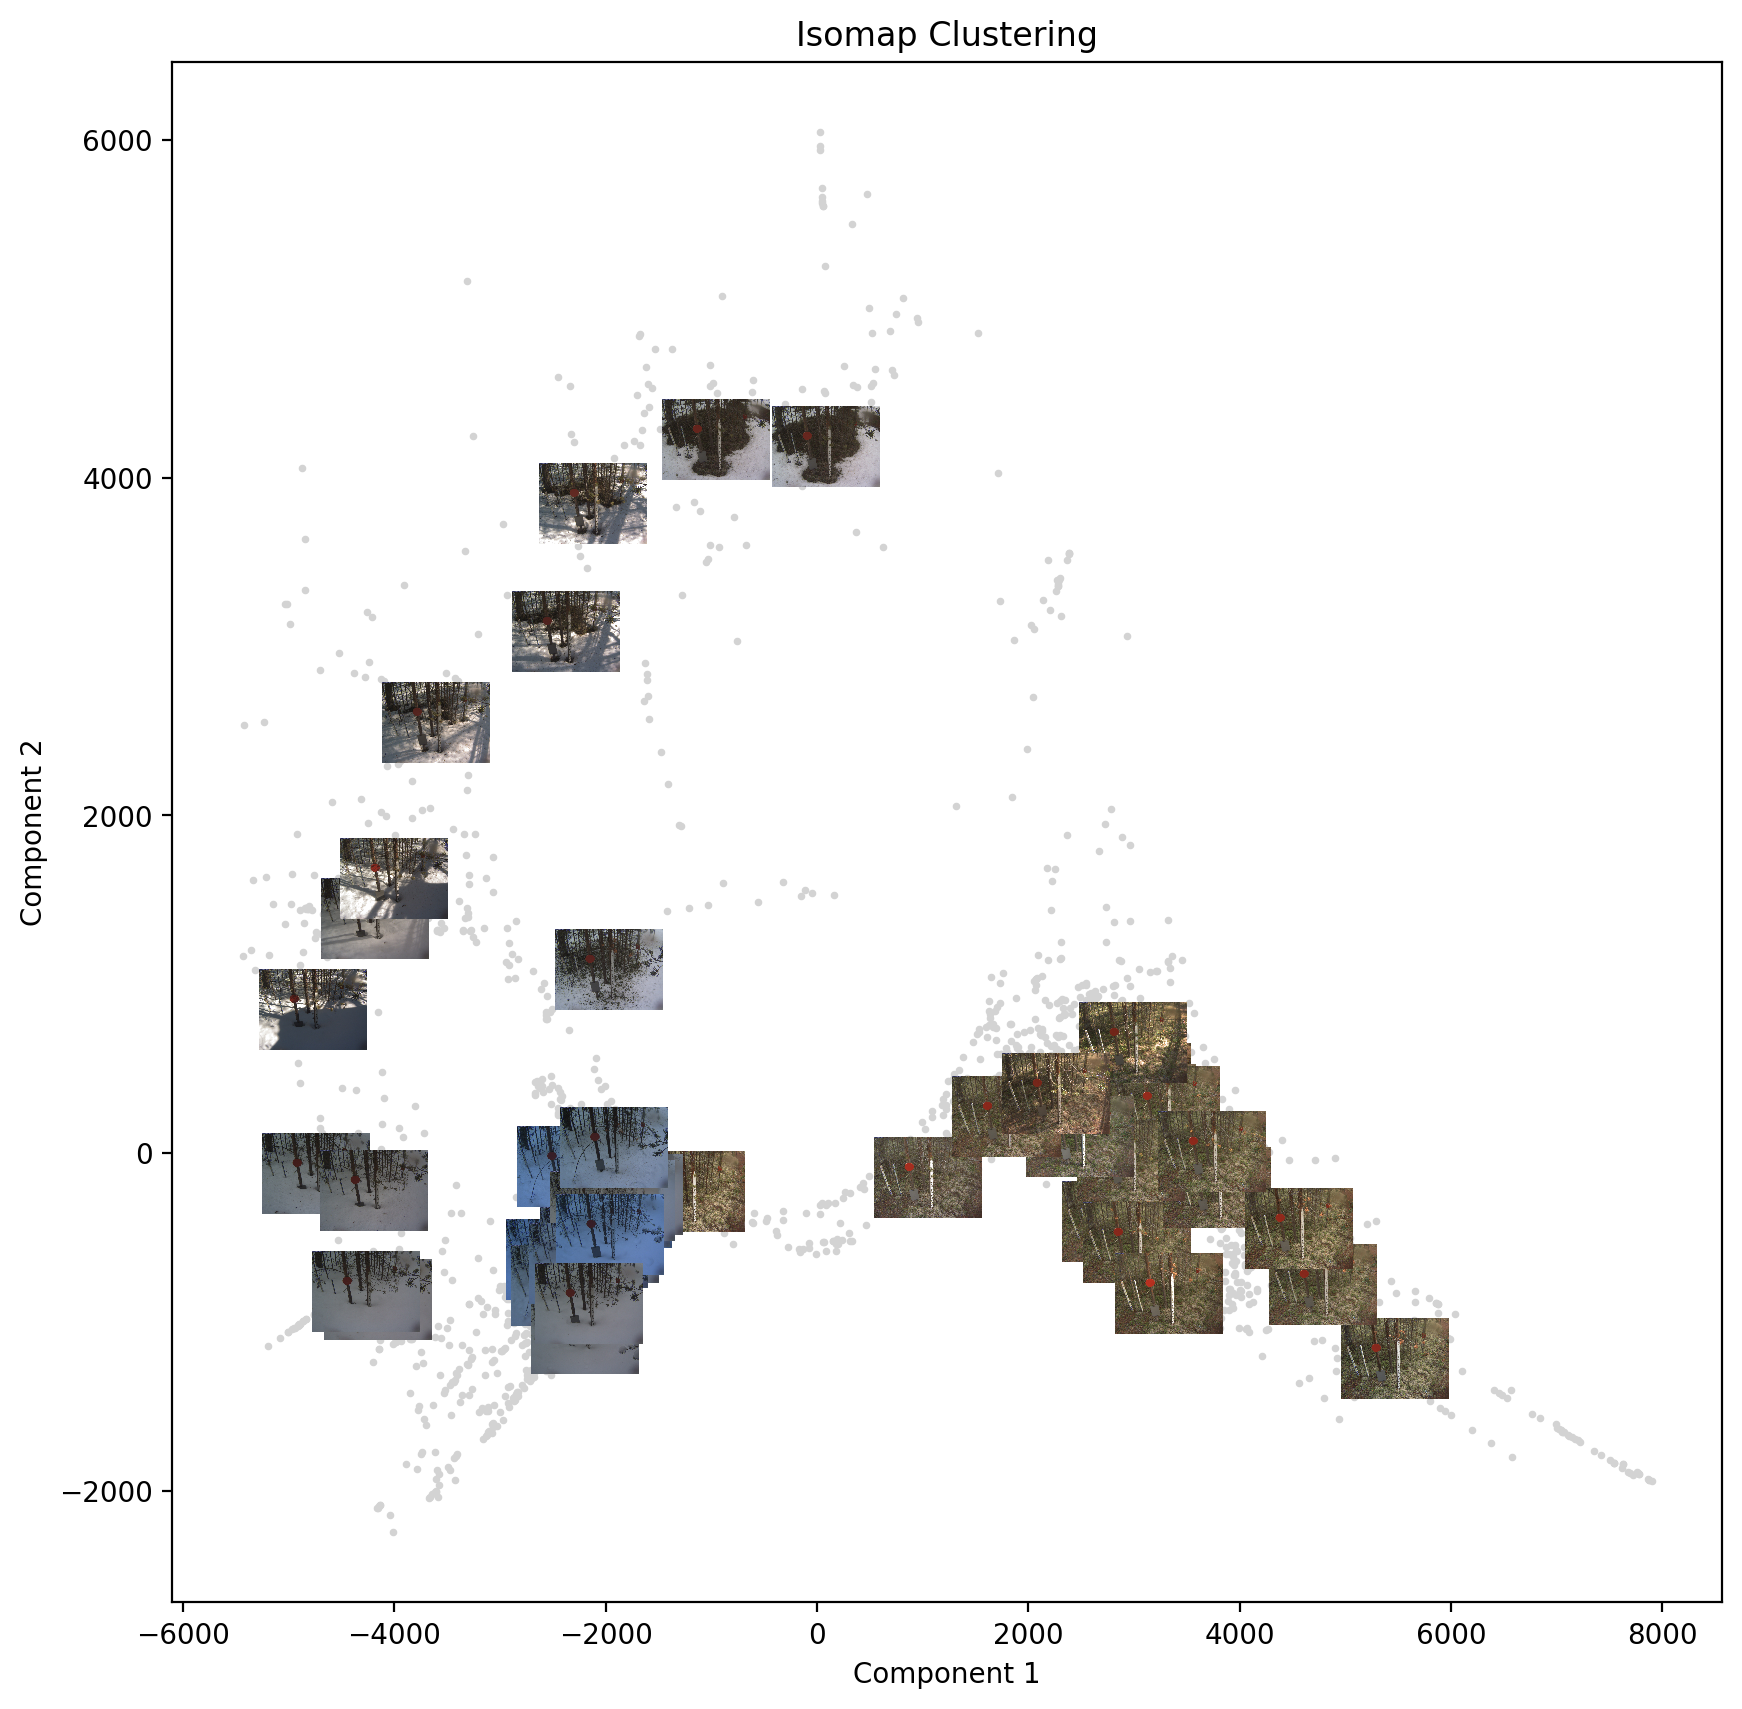

In [94]:
# Plot the embeddings
plot_embeddings(embeddings, image_paths_curated, num_samples=50)

In [32]:
# np.save('features.npy', features)

In [34]:
# a = np.load('features.npy')
# a

In [36]:
# np.save('embeddings.npy', embeddings)

# UNet Definition Approach

In [5]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define your U-Net architecture
def unet(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    up6 = tf.keras.layers.Conv2D(512, 2, activation='relu', padding='same')(tf.keras.layers.UpSampling2D(size=(2, 2))(conv5))
    merge6 = tf.keras.layers.concatenate([conv4, up6], axis=3)
    conv6 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(conv6)
    up7 = tf.keras.layers.Conv2D(256, 2, activation='relu', padding='same')(tf.keras.layers.UpSampling2D(size=(2, 2))(conv6))
    merge7 = tf.keras.layers.concatenate([conv3, up7], axis=3)
    conv7 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv7)
    up8 = tf.keras.layers.Conv2D(128, 2, activation='relu', padding='same')(tf.keras.layers.UpSampling2D(size=(2, 2))(conv7))
    merge8 = tf.keras.layers.concatenate([conv2, up8], axis=3)
    conv8 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)
    up9 = tf.keras.layers.Conv2D(64, 2, activation='relu', padding='same')(tf.keras.layers.UpSampling2D(size=(2, 2))(conv8))
    merge9 = tf.keras.layers.concatenate([conv1, up9], axis=3)
    conv9 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv9)
    conv10 = tf.keras.layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    model = tf.keras.Model(inputs=inputs, outputs=conv10)
    return model

# Function to load and preprocess images
def load_and_preprocess_images(image_paths):
    images = []
    for path in tqdm(image_paths, desc="Loading and preprocessing images"):
        img = Image.open(path)
        img = img.resize((512, 512))
        img = np.array(img)
        img = img / 255.0  # Normalize to [0, 1]
        images.append(img)
    return np.array(images)

# Function to perform Isomap dimensionality reduction
def perform_isomap(features):
    isomap = Isomap(n_components=2)
    embeddings = isomap.fit_transform(features)
    return embeddings

# Function to plot the embeddings
def plot_embeddings(embeddings, image_paths, title='Isomap Clustering'):
    plt.figure(figsize=(10, 10))
    for i, path in enumerate(image_paths):
        plt.scatter(embeddings[i, 0], embeddings[i, 1])
        plt.text(embeddings[i, 0], embeddings[i, 1], os.path.basename(path), fontsize=8)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

### All of the images

In [2]:
# Directory containing images
image_dir = '../data/sodankyla_cam/pine_ground_cam/'

# Get the list of image file paths
image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith('.jpg')]
# image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith('.jpg') and filename.split('_')[-1][:2] in ['10', '11', '12', '13', '14']]
image_paths.sort()

# Load and preprocess images
images = load_and_preprocess_images(image_paths)

Loading and preprocessing images: 100%|████████████████████████████████████████████| 7624/7624 [10:50<00:00, 11.72it/s]


### Curated to non-night, between 10:00 and 15:00

In [6]:
image_dir = '../data/sodankyla_cam/pine_ground_cam/'

image_paths_curated = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith('.jpg') and filename.split('_')[-1][:2] in ['10', '11', '12', '13', '14']]
image_paths_curated.sort()

# Load and preprocess images
images_curated = load_and_preprocess_images(image_paths_curated)

Loading and preprocessing images: 100%|████████████████████████████████████████████| 3640/3640 [04:16<00:00, 14.19it/s]


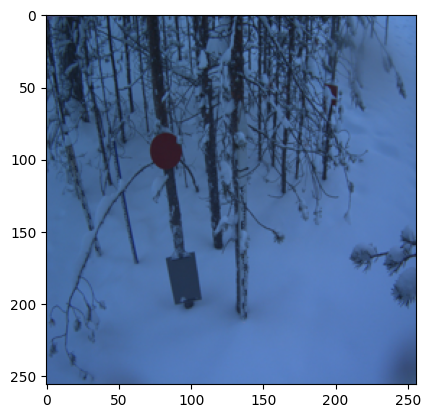

In [7]:
plt.imshow(images_curated[0])

In [10]:
# Define U-Net model
input_shape = (256, 256, 3)
model = unet(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

# Extract features using the trained U-Net model
features = model.predict(images)

NameError: name 'X_train' is not defined

In [ ]:
# Perform Isomap dimensionality reduction
embeddings = perform_isomap(features)

In [ ]:
# Plot the embeddings
plot_embeddings(embeddings, image_paths)